In [2]:
# General imports
import os
import sys
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import subprocess

from sklearn.cluster import KMeans

from tqdm import tqdm
# Other imports
tqdm.pandas()

import json

from pprint import pprint

# Custom utils
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from utils.utils import load_config_file

# Figures imports
import matplotlib

from matplotlib.lines import Line2D   
import matplotlib.patches as mpatches

import random 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
import matplotlib.font_manager as font_manager
import string

from pandarallel import pandarallel

pandarallel.initialize(nb_workers=60, progress_bar=True)

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

dicts = json.load(open("/home/weber/PycharmProjects/EXOTIC/src/EXOTIC_config.json"))


# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


INFO: Pandarallel will run on 60 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


Gene start End => Gene size

In [1905]:
print(matplotlib.__version__)

3.2.1


In [3]:
genes = pd.read_parquet(yaml["1_GENOMICS"]["TMP"]["tmp_refseq_pc_genes"])
genes['Gene'] = genes['Attributes'].apply(lambda r: [e.replace("Name=", "") for e in r.split(";") if "Name" in e][0])
genes['Length'] = genes['End'] - genes['Start']
genes

NC RefSeq_validation Region_type   Start     End Score  \
38       NC_000001.10        BestRefSeq        gene   69091   70008     .   
70       NC_000001.10        BestRefSeq        gene  367659  368597     .   
97       NC_000001.10        BestRefSeq        gene  621096  622034     .   
182      NC_000001.10        BestRefSeq        gene  861111  879954     .   
211      NC_000001.10        BestRefSeq        gene  879583  894636     .   
...               ...               ...         ...     ...     ...   ...   
1593507   NC_012920.1            RefSeq        gene   10470   10766     .   
1593509   NC_012920.1            RefSeq        gene   10760   12137     .   
1593520   NC_012920.1            RefSeq        gene   12337   14148     .   
1593522   NC_012920.1            RefSeq        gene   14149   14673     .   
1593527   NC_012920.1            RefSeq        gene   14747   15887     .   

        Strand Phase                                         Attributes  \
38           +     .  ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14...   
70           +     .  ID=gene-OR4F29;Dbxref=GeneID:729759,HGNC:HGNC:...   
97           -     .  ID=gene-OR4F16;Dbxref=GeneID:81399,HGNC:HGNC:1...   
182          +     .  ID=gene-SAMD11;Dbxref=GeneID:148398,HGNC:HGNC:...   
211          -     .  ID=gene-NOC2L;Dbxref=GeneID:26155,HGNC:HGNC:24...   
...        ...   ...                                                ...   
1593507      +     .  ID=gene-ND4L;Dbxref=GeneID:4539,HGNC:HGNC:7460...   
1593509      +     .  ID=gene-ND4;Dbxref=GeneID:4538,HGNC:HGNC:7459,...   
1593520      +     .  ID=gene-ND5;Dbxref=GeneID:4540,HGNC:HGNC:7461,...   
1593522      -     .  ID=gene-ND6;Dbxref=GeneID:4541,HGNC:HGNC:7462,...   
1593527      +     .  ID=gene-CYTB;Dbxref=GeneID:4519,HGNC:HGNC:7427...   

           Gene  Length  
38        OR4F5     917  
70       OR4F29     938  
97       OR4F16     938  
182      SAMD11   18843  
211       NOC2L   15053  
...         ...     ...  
1593507    ND4L     296  
1593509     ND4    1377  
1593520     ND5    1811  
1593522     ND6     524  
1593527    CYTB    1140  

[19337 rows x 11 columns]

In [ ]:
sns.boxplot(data=genes, x='Miso_siso', y='Length', showfliers=False)
plt.ylim(0,350)

In [4]:
mrnas = pd.read_parquet(yaml["1_GENOMICS"]["TMP"]["tmp_refseq_mrnas"])
mrnas['Gene'] = mrnas['Attributes'].apply(lambda r: [e.replace("Parent=gene-", "") for e in r.split(";") if "gene" in e][0])
mrnas

NC RefSeq_validation Region_type     Start       End Score  \
39       NC_000001.10        BestRefSeq        mRNA     69091     70008     .   
71       NC_000001.10        BestRefSeq        mRNA    367659    368597     .   
98       NC_000001.10        BestRefSeq        mRNA    621096    622034     .   
183      NC_000001.10        BestRefSeq        mRNA    861111    879954     .   
212      NC_000001.10        BestRefSeq        mRNA    879583    894636     .   
...               ...               ...         ...       ...       ...   ...   
1455342   NC_000024.9        BestRefSeq        mRNA  59214014  59276439     .   
1455358   NC_000024.9        BestRefSeq        mRNA  59214014  59276439     .   
1455372   NC_000024.9        BestRefSeq        mRNA  59214014  59276439     .   
1455390   NC_000024.9        BestRefSeq        mRNA  59330367  59343488     .   
1455409   NC_000024.9        BestRefSeq        mRNA  59330367  59343488     .   

        Strand Phase                                         Attributes  \
39           +     .  ID=rna-NM_001005484.1;Parent=gene-OR4F5;Dbxref...   
71           +     .  ID=rna-NM_001005221.2;Parent=gene-OR4F29;Dbxre...   
98           -     .  ID=rna-NM_001005277.1;Parent=gene-OR4F16;Dbxre...   
183          +     .  ID=rna-NM_152486.3;Parent=gene-SAMD11;Dbxref=G...   
212          -     .  ID=rna-NM_015658.4;Parent=gene-NOC2L;Dbxref=Ge...   
...        ...   ...                                                ...   
1455342      +     .  ID=rna-NM_005638.6-2;Parent=gene-VAMP7-2;Dbxre...   
1455358      +     .  ID=rna-NM_001185183.2-2;Parent=gene-VAMP7-2;Db...   
1455372      +     .  ID=rna-NM_001145149.3-2;Parent=gene-VAMP7-2;Db...   
1455390      +     .  ID=rna-NM_176786.2-2;Parent=gene-IL9R-2;Dbxref...   
1455409      +     .  ID=rna-NM_002186.3-2;Parent=gene-IL9R-2;Dbxref...   

            Gene  
39         OR4F5  
71        OR4F29  
98        OR4F16  
183       SAMD11  
212        NOC2L  
...          ...  
1455342  VAMP7-2  
1455358  VAMP7-2  
1455372  VAMP7-2  
1455390   IL9R-2  
1455409   IL9R-2  

[53914 rows x 10 columns]

In [126]:
mrnas.loc[183]['Attributes']

'ID=rna-NM_152486.3;Parent=gene-SAMD11;Dbxref=GeneID:148398,Genbank:NM_152486.3,HGNC:HGNC:28706,MIM:616765;Name=NM_152486.3;Note=The RefSeq transcript has 1 substitution compared to this genomic sequence;exception=annotated by transcript or proteomic data;gbkey=mRNA;gene=SAMD11;inference=similar to RNA sequence%2C mRNA (same species):RefSeq:NM_152486.3;product=sterile alpha motif domain containing 11;tag=RefSeq Select;transcript_id=NM_152486.3'

In [5]:
def exons_with_variable(df):
    previous_start, previous_end, previous_r = 0, 0, pd.Series()
    l = list()
    for j, r in df.iterrows():
        if r['Exon_start'] == previous_end:
            l = l[:-1]
            l.extend(2*["{}-{}".format(previous_start, r['Exon_stop'])])
        else:
            l.append("{}-{}".format(r['Exon_start'], r['Exon_stop']))
        previous_start = r['Exon_start']
        previous_end = r['Exon_stop']
        previous_r = r
    df['ranges_without_variable'] = l
    return df

def order_exon_by_strand_and_seq(df):
    if df.Strand.unique()[0] == 0:
        df = df.sort_values(by='Exon_start_raw', ascending=False)
    elif df.Strand.unique()[0] == 1:
        df = df.sort_values(by='Exon_start_raw', ascending=True)
    df['Exon_nb'] = list(range(1, df.shape[0]+1))
    return df

In [6]:
refseq = pd.read_parquet(yaml["1_GENOMICS"]["Final"]["refseq_cds_with_variable"]).sort_values(by=['Gene', 'Exon_start'])

In [7]:
refseq_wt_variable = refseq.groupby('Gene').parallel_apply(exons_with_variable)

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object'

In [8]:
refseq_wt_variable.loc[refseq_wt_variable['mRNA_gene_nb'] > 1, 'Miso_siso'] = 'Miso'
refseq_wt_variable.loc[refseq_wt_variable['mRNA_gene_nb'] == 1, 'Miso_siso'] = 'Siso'
refseq_wt_variable[['Exon_start_raw', 'Exon_stop_raw']] = refseq_wt_variable['ranges_without_variable'].str.split('-', expand=True)
refseq_wt_variable[['Exon_start_raw', 'Exon_stop_raw']] = refseq_wt_variable[['Exon_start_raw', 'Exon_stop_raw']].astype(int)
refseq_wt_variable['Length_raw'] = refseq_wt_variable['Exon_stop_raw'] - refseq_wt_variable['Exon_start_raw']

In [9]:
refseq_wt_variable_drop_duplicates = refseq_wt_variable.drop_duplicates(subset=['Gene', 'ranges_without_variable'])
refseq_wt_variable_drop_duplicates = refseq_wt_variable_drop_duplicates.groupby('Gene').progress_apply(order_exon_by_strand_and_seq)
refseq_wt_variable_drop_duplicates = refseq_wt_variable_drop_duplicates.reset_index(drop=True)

refseq_wt_variable_drop_duplicates

100%|██████████| 19306/19306 [01:06<00:00, 288.52it/s] 


Gene Exon_type             ranges                 mRNA_exons  \
0       A1BG       CDS  58864770-58864803                [NM_130786]   
1       A1BG       CDS  58864658-58864693                [NM_130786]   
2       A1BG       CDS  58864294-58864563                [NM_130786]   
3       A1BG       CDS  58863649-58863921                [NM_130786]   
4       A1BG       CDS  58862757-58863053                [NM_130786]   
...      ...       ...                ...                        ...   
205622  ZZZ3       CDS  78044459-78044554  [NM_001308237, NM_015534]   
205623  ZZZ3       CDS  78041753-78041905  [NM_001308237, NM_015534]   
205624  ZZZ3       CDS  78034017-78034151  [NM_001308237, NM_015534]   
205625  ZZZ3       CDS  78031766-78031866  [NM_001308237, NM_015534]   
205626  ZZZ3       CDS  78031325-78031469  [NM_001308237, NM_015534]   

       Exon_start Exon_stop  Length  Strand  mRNA_exons_nb  \
0        58864770  58864803      33       0              1   
1        58864658  58864693      35       0              1   
2        58864294  58864563     269       0              1   
3        58863649  58863921     272       0              1   
4        58862757  58863053     296       0              1   
...           ...       ...     ...     ...            ...   
205622   78044459  78044554      95       0              2   
205623   78041753  78041905     152       0              2   
205624   78034017  78034151     134       0              2   
205625   78031766  78031866     100       0              2   
205626   78031325  78031469     144       0              2   

                        mRNA_gene  ...  Ratio_num Const_Alt  Share CDS_count  \
0                     [NM_130786]  ...        1.0     Const  False         8   
1                     [NM_130786]  ...        1.0     Const  False         8   
2                     [NM_130786]  ...        1.0     Const  False         8   
3                     [NM_130786]  ...        1.0     Const  False         8   
4                     [NM_130786]  ...        1.0     Const  False         8   
...                           ...  ...        ...       ...    ...       ...   
205622  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205623  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205624  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205625  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205626  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   

        ranges_without_variable  Miso_siso Exon_start_raw Exon_stop_raw  \
0             58864770-58864803       Siso       58864770      58864803   
1             58864658-58864693       Siso       58864658      58864693   
2             58864294-58864563       Siso       58864294      58864563   
3             58863649-58863921       Siso       58863649      58863921   
4             58862757-58863053       Siso       58862757      58863053   
...                         ...        ...            ...           ...   
205622        78044459-78044554       Miso       78044459      78044554   
205623        78041753-78041905       Miso       78041753      78041905   
205624        78034017-78034151       Miso       78034017      78034151   
205625        78031766-78031866       Miso       78031766      78031866   
205626        78031325-78031469       Miso       78031325      78031469   

        Length_raw  Exon_nb  
0               33        1  
1               35        2  
2              269        3  
3              272        4  
4              296        5  
...            ...      ...  
205622          95        8  
205623         152        9  
205624         134       10  
205625         100       11  
205626         144       12  

[205627 rows x 22 columns]

In [ ]:
refseq_wt_variable_drop_duplicates = refseq_wt_variable_drop_duplicates.reset_index(drop=True)
# refseq_wt_variable_drop_duplicates.to_parquet('')

In [10]:
genes.loc[genes['Gene'].isin(refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Miso']['Gene'].unique().tolist()), 'Miso_siso'] = 'Miso'
genes.loc[genes['Gene'].isin(refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Siso']['Gene'].unique().tolist()), 'Miso_siso'] = 'Siso'
genes = genes.dropna(subset=['Miso_siso'])
genes['Length'] = genes['Length'] / 1000
genes

NC RefSeq_validation Region_type     Start       End Score  \
38       NC_000001.10        BestRefSeq        gene     69091     70008     .   
70       NC_000001.10        BestRefSeq        gene    367659    368597     .   
97       NC_000001.10        BestRefSeq        gene    621096    622034     .   
182      NC_000001.10        BestRefSeq        gene    861111    879954     .   
211      NC_000001.10        BestRefSeq        gene    879583    894636     .   
...               ...               ...         ...       ...       ...   ...   
1455146   NC_000024.9        BestRefSeq        gene  27177048  27198251     .   
1455226   NC_000024.9        BestRefSeq        gene  27768264  27771049     .   
1455316   NC_000024.9        BestRefSeq        gene  59100403  59115127     .   
1455324   NC_000024.9        BestRefSeq        gene  59214014  59276439     .   
1455389   NC_000024.9        BestRefSeq        gene  59330367  59343488     .   

        Strand Phase                                         Attributes  \
38           +     .  ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14...   
70           +     .  ID=gene-OR4F29;Dbxref=GeneID:729759,HGNC:HGNC:...   
97           -     .  ID=gene-OR4F16;Dbxref=GeneID:81399,HGNC:HGNC:1...   
182          +     .  ID=gene-SAMD11;Dbxref=GeneID:148398,HGNC:HGNC:...   
211          -     .  ID=gene-NOC2L;Dbxref=GeneID:26155,HGNC:HGNC:24...   
...        ...   ...                                                ...   
1455146      -     .  ID=gene-BPY2C;Dbxref=GeneID:442868,HGNC:HGNC:1...   
1455226      +     .  ID=gene-CDY1;Dbxref=GeneID:9085,HGNC:HGNC:1809...   
1455316      +     .  ID=gene-SPRY3-2;Dbxref=GeneID:10251,HGNC:HGNC:...   
1455324      +     .  ID=gene-VAMP7-2;Dbxref=GeneID:6845,HGNC:HGNC:1...   
1455389      +     .  ID=gene-IL9R-2;Dbxref=GeneID:3581,HGNC:HGNC:60...   

           Gene  Length Miso_siso  
38        OR4F5   0.917      Siso  
70       OR4F29   0.938      Siso  
97       OR4F16   0.938      Siso  
182      SAMD11  18.843      Siso  
211       NOC2L  15.053      Siso  
...         ...     ...       ...  
1455146   BPY2C  21.203      Siso  
1455226    CDY1   2.785      Miso  
1455316   SPRY3  14.724      Miso  
1455324   VAMP7  62.425      Miso  
1455389    IL9R  13.121      Miso  

[19324 rows x 12 columns]

In [86]:
refseq_wt_variable_drop_duplicates.to_parquet('/gstock/EXOTIC/data/GENOMICS/refseq_wt_variable.parquet')

             count          mean            std    min      25%      50%  \
Miso_siso                                                                  
Miso       10949.0  79958.724632  144477.283224  455.0  14172.0  33900.0   
Siso        8375.0  40383.458388   92567.688229  179.0   4021.5  12931.0   

               75%        max  
Miso_siso                      
Miso       84631.0  2298756.0  
Siso       39448.0  2304197.0  
Siso v.s. Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.895e+07


(<matplotlib.axes._subplots.AxesSubplot at 0x7efce249be10>,
 [<statannot.StatResult.StatResult at 0x7efce249b590>])

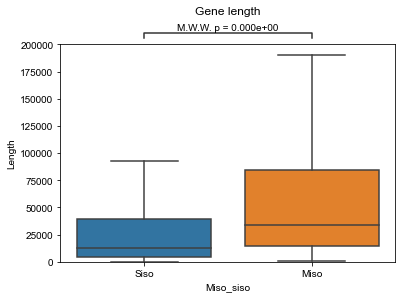

In [211]:
x='Miso_siso'
y='Length'

f, ax = plt.subplots()
sns.boxplot(data=genes, x=x, y=y, showfliers=False)
ax.set_title('Gene length', pad=30)
plt.ylim(0,2e5)
print(genes.groupby('Miso_siso')['Length'].describe())

add_stat_annotation(ax, data=genes, x=x, y=y, box_pairs=[("Siso", "Miso")],
                                   test='Mann-Whitney', text_format='full',
                                   loc='outside', verbose=2)
# import scipy
# print(scipy.stats.mannwhitneyu(genes.loc[genes['Miso_siso'] == 'Miso'][y].values, genes.loc[genes['Miso_siso'] == 'Siso'][y]))

              count        mean         std  min   25%    50%    75%      max
Miso_siso                                                                    
Miso       137033.0  159.783862  252.939677  0.0  81.0  119.0  166.0  17330.0
Siso        68594.0  193.395924  354.713948  0.0  89.0  127.0  177.0  21692.0
Siso v.s. Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.115e-216 U_stat=5.098e+09


(<matplotlib.axes._subplots.AxesSubplot at 0x7efcd8929ad0>,
 [<statannot.StatResult.StatResult at 0x7efcc6563d10>])

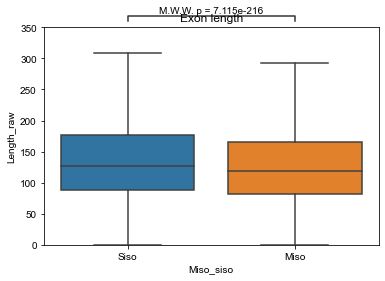

In [237]:
x='Miso_siso'
y='Length_raw'

f, ax = plt.subplots()
sns.boxplot(data=refseq_wt_variable_drop_duplicates, x=x, y=y, showfliers=False)
ax.set_title('Exon length')
plt.ylim(0,350)
print(refseq_wt_variable_drop_duplicates.groupby('Miso_siso')['Length_raw'].describe())
add_stat_annotation(ax, data=refseq_wt_variable_drop_duplicates, x=x, y=y, box_pairs=[("Siso", "Miso")],
                                   test='Mann-Whitney', text_format='full',
                                   loc='outside', verbose=2)

In [105]:
refseq_wt_variable_drop_duplicates.reset_index(drop=True)

Gene Exon_type             ranges                 mRNA_exons  \
0       A1BG       CDS  58864770-58864803                [NM_130786]   
1       A1BG       CDS  58864658-58864693                [NM_130786]   
2       A1BG       CDS  58864294-58864563                [NM_130786]   
3       A1BG       CDS  58863649-58863921                [NM_130786]   
4       A1BG       CDS  58862757-58863053                [NM_130786]   
...      ...       ...                ...                        ...   
205622  ZZZ3       CDS  78044459-78044554  [NM_001308237, NM_015534]   
205623  ZZZ3       CDS  78041753-78041905  [NM_001308237, NM_015534]   
205624  ZZZ3       CDS  78034017-78034151  [NM_001308237, NM_015534]   
205625  ZZZ3       CDS  78031766-78031866  [NM_001308237, NM_015534]   
205626  ZZZ3       CDS  78031325-78031469  [NM_001308237, NM_015534]   

       Exon_start Exon_stop  Length  Strand  mRNA_exons_nb  \
0        58864770  58864803      33       0              1   
1        58864658  58864693      35       0              1   
2        58864294  58864563     269       0              1   
3        58863649  58863921     272       0              1   
4        58862757  58863053     296       0              1   
...           ...       ...     ...     ...            ...   
205622   78044459  78044554      95       0              2   
205623   78041753  78041905     152       0              2   
205624   78034017  78034151     134       0              2   
205625   78031766  78031866     100       0              2   
205626   78031325  78031469     144       0              2   

                        mRNA_gene  ...  Ratio_num Const_Alt  Share CDS_count  \
0                     [NM_130786]  ...        1.0     Const  False         8   
1                     [NM_130786]  ...        1.0     Const  False         8   
2                     [NM_130786]  ...        1.0     Const  False         8   
3                     [NM_130786]  ...        1.0     Const  False         8   
4                     [NM_130786]  ...        1.0     Const  False         8   
...                           ...  ...        ...       ...    ...       ...   
205622  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205623  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205624  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205625  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205626  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   

        ranges_without_variable  Exon_start_raw Exon_stop_raw  Length_raw  \
0             58864770-58864803        58864770      58864803          33   
1             58864658-58864693        58864658      58864693          35   
2             58864294-58864563        58864294      58864563         269   
3             58863649-58863921        58863649      58863921         272   
4             58862757-58863053        58862757      58863053         296   
...                         ...             ...           ...         ...   
205622        78044459-78044554        78044459      78044554          95   
205623        78041753-78041905        78041753      78041905         152   
205624        78034017-78034151        78034017      78034151         134   
205625        78031766-78031866        78031766      78031866         100   
205626        78031325-78031469        78031325      78031469         144   

        Miso_siso  Exon_nb  
0            Siso        1  
1            Siso        2  
2            Siso        3  
3            Siso        4  
4            Siso        5  
...           ...      ...  
205622       Miso        8  
205623       Miso        9  
205624       Miso       10  
205625       Miso       11  
205626       Miso       12  

[205627 rows x 22 columns]

In [109]:
refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby(['Gene', 'Miso_siso'])['ranges_without_variable'].nunique().reset_index()

Gene Miso_siso  ranges_without_variable
0         A1BG      Siso                        8
1         A1CF      Miso                       12
2          A2M      Miso                       36
3        A2ML1      Miso                       36
4      A3GALT2      Siso                        5
...        ...       ...                      ...
19301   ZYG11A      Miso                       15
19302   ZYG11B      Siso                       14
19303      ZYX      Miso                        9
19304    ZZEF1      Siso                       55
19305     ZZZ3      Miso                       12

[19306 rows x 3 columns]

In [193]:

x='Miso_siso'
y='ranges_without_variable'

f, ax = plt.subplots()
data_to_plot = refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby(['Gene', 'Miso_siso'])['ranges_without_variable'].nunique().reset_index()
sns.boxplot(data=data_to_plot, x=x, y=y, showfliers=False)
ax.set_title('Exon count')
plt.ylim(0,35)
print(refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby(['Miso_siso', 'Gene'])['ranges_without_variable'].nunique().groupby('Miso_siso').describe())

add_stat_annotation(ax, data=data_to_plot, x=x, y=y, box_pairs=[("Siso", "Miso")],
                                   test='Mann-Whitney', text_format='full',
                                   loc='outside', verbose=2)

             count       mean        std  min  25%   50%   75%    max
Miso_siso                                                            
Miso       10937.0  12.529304  10.445196  1.0  6.0  10.0  16.0  363.0
Siso        8369.0   8.196200  10.297057  1.0  2.0   5.0  10.0  172.0
Siso v.s. Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.745e+07


(<matplotlib.axes._subplots.AxesSubplot at 0x7efcc3b148d0>,
 [<statannot.StatResult.StatResult at 0x7efcc42d6e90>])

In [128]:
refseq_wt_variable_drop_duplicates.explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().describe()

count    19306.000000
mean         2.790117
std          3.502495
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         78.000000
Name: mRNA_gene, dtype: float64

In [129]:
refseq_wt_variable_drop_duplicates.explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().sum()

53866

In [197]:
refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Miso'].explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().describe()

count    10937.000000
mean         4.159916
std          4.162519
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         78.000000
Name: mRNA_gene, dtype: float64

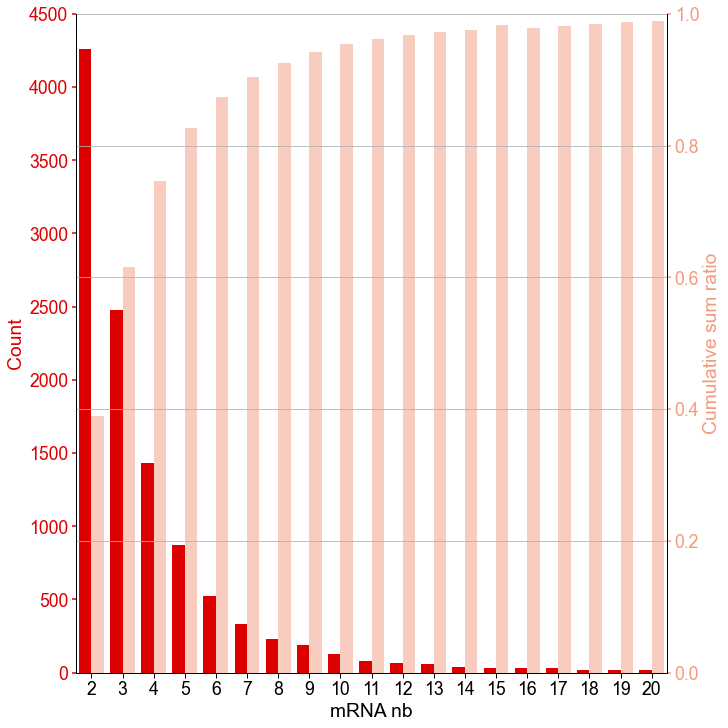

In [458]:

# CONFIG COLORS
color_aa = '#DC0000FF'
color_ab = '#F39B7FFF'
color_ba = '#00A087FF'
color_bb = '#91D1C2FF'

# SNS CONTEXT & FIG
sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(ncols=1, figsize=(10,10), constrained_layout=True)

tmp = refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Miso'].explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().value_counts()
tmp = pd.concat([tmp.rename('count'), tmp.cumsum().rename('mRNA_cumsum')], axis=1)
tmp['Ratio'] = tmp['count'] / tmp['count'].sum()
tmp['Ratio_cumsum'] = tmp['Ratio'].cumsum()

# Left barplot with y axis
ax1_ = ax.bar(tmp.index.tolist(), tmp['count'].values,
       align='edge',
       alpha=1,
       color=color_aa,
       width=-0.4
      )

# Right baprlot with y secondary axis
ax2 = ax.twinx()
ax2_ = ax2.bar(tmp.index.tolist(), tmp.Ratio_cumsum.values, alpha=0.5, color=color_ab, align='edge', width=0.4)

# AES
ax2.set_xlim(1.5,20.5)
ax.set_xticks(np.arange(2,21))
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: round(x, 0)))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
ax.yaxis.label.set_color(color_aa)
ax2.yaxis.label.set_color(color_ab)
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=color_aa, **tkw)
ax2.tick_params(axis='y', colors=color_ab, **tkw)
ax.set_ylabel('Count')
ax.set_xlabel('mRNA nb')
ax2.set_ylabel('Cumulative sum ratio')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.set_ylim(0,4500)
ax2.set_ylim(0,1)
# ax[0].text(-0.1, 1.05, 'a', transform=ax[0].transAxes, size=24, weight='bold')
ax2.grid(axis='y')



In [209]:
tmp = refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Miso'].explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().value_counts()
tmp = pd.concat([tmp.rename('count'), tmp.cumsum().rename('mRNA_cumsum')], axis=1)
tmp['Ratio'] = tmp['count'] / tmp['count'].sum()
tmp['Ratio_cumsum'] = tmp['Ratio'].cumsum()
tmp

count  mRNA_cumsum     Ratio  Ratio_cumsum
2    4257         4257  0.389229      0.389229
3    2478         6735  0.226570      0.615800
4    1430         8165  0.130749      0.746548
5     874         9039  0.079912      0.826461
6     521         9560  0.047636      0.874097
7     329         9889  0.030081      0.904178
8     231        10120  0.021121      0.925299
9     190        10310  0.017372      0.942672
10    123        10433  0.011246      0.953918
11     79        10512  0.007223      0.961141
12     65        10577  0.005943      0.967084
13     55        10632  0.005029      0.972113
14     35        10667  0.003200      0.975313
16     31        10698  0.002834      0.978148
17     30        10728  0.002743      0.980891
15     30        10758  0.002743      0.983634
18     17        10775  0.001554      0.985188
21     17        10792  0.001554      0.986742
19     16        10808  0.001463      0.988205
20     16        10824  0.001463      0.989668
22     13        10837  0.001189      0.990857
27     12        10849  0.001097      0.991954
23     11        10860  0.001006      0.992960
31      9        10869  0.000823      0.993783
26      8        10877  0.000731      0.994514
28      7        10884  0.000640      0.995154
33      6        10890  0.000549      0.995703
25      6        10896  0.000549      0.996251
36      5        10901  0.000457      0.996708
30      4        10905  0.000366      0.997074
34      3        10908  0.000274      0.997348
29      3        10911  0.000274      0.997623
39      3        10914  0.000274      0.997897
24      2        10916  0.000183      0.998080
32      2        10918  0.000183      0.998263
51      2        10920  0.000183      0.998446
41      2        10922  0.000183      0.998629
35      1        10923  0.000091      0.998720
46      1        10924  0.000091      0.998811
38      1        10925  0.000091      0.998903
72      1        10926  0.000091      0.998994
55      1        10927  0.000091      0.999086
37      1        10928  0.000091      0.999177
49      1        10929  0.000091      0.999269
68      1        10930  0.000091      0.999360
60      1        10931  0.000091      0.999451
52      1        10932  0.000091      0.999543
58      1        10933  0.000091      0.999634
63      1        10934  0.000091      0.999726
78      1        10935  0.000091      0.999817
67      1        10936  0.000091      0.999909
71      1        10937  0.000091      1.000000

In [130]:
refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Miso_siso'] == 'Miso'].explode('mRNA_gene')[['Gene', 'mRNA_gene']].reset_index(drop=True).groupby('Gene')['mRNA_gene'].nunique().sum()

45497

In [162]:
def compute_introns_ranges(r):
    l = list()
    exons = r["Exons_ranges"]
    exons_start = list(sorted([e.split("-")[0] for e in exons]))
    exons_end = list(sorted([e.split("-")[1] for e in exons]))
    exons = ["{}-{}".format(s, e) for s, e in zip(exons_start, exons_end)]

    for j, e in enumerate(exons):
        if j == 0:
            l.append(int(e.split("-")[1]) + 1)
        elif j > 0 and j < len(exons) - 1:
            l.append(int(e.split("-")[0]) - 1)
            l.append(int(e.split("-")[1]) + 1)
        elif j == len(exons) - 1:
            l.append(int(e.split("-")[0]) - 1)
    l = ["{}-{}".format(e, l[j + 1]) for j, e in enumerate(l) if j < len(l) - 1 if j % 2 == 0]
    r["Introns_ranges"] = l
    r["Introns_lengths"] = [int(e.split("-")[1]) - int(e.split("-")[0]) for e in l
                            #                 if int(e.split("-")[1]) - int(e.split("-")[0]) > 0 and int(e.split("-")[1]) - int(e.split("-")[0]) < 2e6
            ]
        
    return r

In [268]:
refseq_introns = pd.merge(refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby('Gene')['ranges_without_variable'].apply(list).reset_index(), refseq_wt_variable_drop_duplicates.reset_index(drop=True)[['Gene', 'Strand', 'Miso_siso']].drop_duplicates(), on='Gene').rename({'ranges_without_variable':'Exons_ranges'},axis=1)
refseq_introns = refseq_introns.progress_apply(compute_introns_ranges, axis=1)
refseq_introns

100%|██████████| 19306/19306 [00:20<00:00, 922.24it/s] 


Gene                                       Exons_ranges  Strand  \
0         A1BG  [58864770-58864803, 58864658-58864693, 5886429...       0   
1         A1CF  [52619602-52619700, 52610425-52610547, 5260374...       0   
2          A2M  [9268360-9268445, 9265956-9266139, 9264973-926...       0   
3        A2ML1  [8975248-8975309, 8975778-8975961, 8976316-897...       1   
4      A3GALT2  [33786677-33786699, 33778408-33778491, 3377810...       0   
...        ...                                                ...     ...   
19301   ZYG11A  [53308556-53308645, 53320137-53320302, 5332267...       1   
19302   ZYG11B  [53192326-53192355, 53222130-53222295, 5323669...       1   
19303      ZYX  [143078665-143078872, 143079341-143079540, 143...       1   
19304    ZZEF1  [4045836-4046189, 4027201-4027345, 4020266-402...       0   
19305     ZZZ3  [78105134-78105156, 78097535-78099039, 7805020...       0   

      Miso_siso                                     Introns_ranges  \
0          Siso  [58858396-58858718, 58859007-58861735, 5886201...   
1          Miso  [52566641-52569653, 52569803-52570799, 5257093...   
2          Miso  [9220436-9220778, 9220821-9221335, 9221439-922...   
3          Miso  [8975310-8975777, 8975962-8976315, 8976479-898...   
4          Siso  [33773055-33777652, 33777791-33778101, 3377819...   
...         ...                                                ...   
19301      Miso  [53308646-53320136, 53320303-53322669, 5332342...   
19302      Siso  [53192356-53222129, 53222296-53236691, 5323744...   
19303      Miso  [143078873-143079340, 143079541-143079685, 143...   
19304      Siso  [3910265-3912176, 3912249-3912897, 3913052-391...   
19305      Miso  [78031470-78031765, 78031867-78034016, 7803415...   

                                         Introns_lengths  
0                     [322, 2728, 738, 594, 371, 93, 75]  
1      [3012, 996, 2679, 1942, 4271, 7480, 7777, 5548...  
2      [342, 514, 901, 673, 1779, 165, 1687, 1971, 40...  
3      [467, 353, 5843, 4881, 823, 587, 1099, 768, 66...  
4                                 [4597, 310, 215, 8184]  
...                                                  ...  
19301  [11490, 2366, 2980, -124, 3108, 2344, 970, 87,...  
19302  [29773, 14395, 8077, 4882, 4948, 6223, 341, 50...  
19303          [467, 144, 114, 4895, 148, 107, 910, 599]  
19304  [1911, 648, 3690, 474, 157, 1806, 903, 104, 16...  
19305  [295, 2149, 7600, 2552, 656, 1368, 705, 86, 23...  

[19306 rows x 6 columns]

In [1850]:

x='Miso_siso'
y='Introns_lengths'


refseq_introns_plot = refseq_introns.explode('Introns_lengths').dropna(subset=['Introns_lengths'])
refseq_introns_plot = refseq_introns_plot.loc[refseq_introns_plot['Introns_lengths'] > 0]
refseq_introns_plot['Introns_lengths'] = refseq_introns_plot['Introns_lengths'].astype(int)
refseq_introns_plot['Introns_lengths']  = refseq_introns_plot['Introns_lengths'] / 1000
refseq_introns_plot

f, ax = plt.subplots()
sns.boxplot(data=refseq_introns_plot, x=x, y=y, showfliers=False)
ax.set_title('Intron length')
plt.ylim(0,1e4)
print(refseq_introns_plot.groupby('Miso_siso')['Introns_lengths'].describe())
add_stat_annotation(ax, data=refseq_introns_plot, x=x, y=y, box_pairs=[("Siso", "Miso")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

              count      mean        std    min      25%    50%    75%  \
Miso_siso                                                                
Miso       119832.0  5.923817  19.273697  0.001  0.52675  1.606  4.250   
Siso        60172.0  4.621038  16.236226  0.001  0.43300  1.332  3.434   

                max  
Miso_siso            
Miso       1103.182  
Siso        740.919  
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Siso v.s. Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.204e-135 U_stat=3.348e+09


(<matplotlib.axes._subplots.AxesSubplot at 0x7efb35900fd0>,
 [<statannot.StatResult.StatResult at 0x7efb35912050>])

In [1160]:
# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'
rcParams['font.size'] = 18

def custom_boxplot(data,x,y,ax,ylim,title,box_pairs,palette,id_string="A"):
    data = data.sort_values(by=x,ascending=True)
    sns.boxplot(data=data, x=x, y=y, showfliers=False, ax=ax,palette=palette)
    ax.set_title(title, pad=65)
    ax.set_ylim(ylim)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    medians = data.groupby([x])[y].median()
    vertical_offset = data[y].median() * 0.1 # offset from median for display

    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='small',color='w',weight='semibold')
    
#     ax.spines['right'].set_linewidth(0)
    add_stat_annotation(ax, data=data, x=x, y=y, box_pairs=box_pairs,
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2)
#     ax.text(,1.1,id_string, fontsize=20)
    return ax

def custom_barplot(data, x, y, ax, ylim, title, palette, padding):
    # plt.style.use('default')
    def show_values_on_bars(axs, padding=1, i=0, fontsize=13, rotation=0, ):
        def _show_on_single_plot(ax):
            for p in ax.patches:
                print(p)
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + (p.get_height()) + padding
                if i == 0:
                    
                    value = "{:,}".format(int(p.get_height()))
                if i == 2:
                    value = "{:.2f}".format(p.get_height())

                if i == 3:
                    value = "{:.3f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center", size="small", rotation=rotation, color='black', weight='semibold')

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

#     plt.rcParams.update({'font.size' : 18})
#     f, ax = plt.subplots(figsize=(20,6))
    sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title, pad=45)
    ax.set_ylim(ylim)
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    show_values_on_bars(ax, padding)


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [1274]:
# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'
rcParams['font.size'] = 18

def custom_boxplot(data, x, y, ax, ylim, title="Title", box_pairs=[()], palette=['grey'], id_string="A", padding_title=10):

    if x:
        data = data.sort_values(by=x,ascending=True)
        sns.boxplot(data=data, x=x, y=y, showfliers=False, ax=ax, palette=palette)
    else:
        sns.boxplot(data=data, y=y, showfliers=False, ax=ax, palette=palette)
        
    ax.set_title(title, pad=padding_title)
    ax.set_ylim(ylim)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    if not x: 
        ax.spines['bottom'].set_linewidth(0)

        ax.axes.xaxis.set_visible(False)
    ax.set_axisbelow(True)

    ax.grid(axis='y')

    if x: 
        medians = data.groupby(x)[y].median()
        vertical_offset = data[y].median() * 0.1 # offset from median for display

        for xtick in ax.get_xticks():
            ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                    horizontalalignment='center',size='small',color='w',weight='semibold')
    else:
        medians = data[y].median()
        vertical_offset = data[y].median() * 0.1 # offset from median for display
        for xtick in ax.get_xticks():
            ax.text(xtick,medians + vertical_offset,medians, 
                    horizontalalignment='center',size='small',color='w',weight='semibold')
    print(medians)


    
#     ax.spines['right'].set_linewidth(0)

    if x: 
        add_stat_annotation(ax, data=data, x=x, y=y, box_pairs=box_pairs,
                            test='Mann-Whitney', text_format='star',
                            loc='outside', verbose=2)
    return ax




def custom_barplot(data, x="", y="", ax=[], ylim=(), title="", palette=['grey'], padding=10, padding_title=25):
    
    def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

        
    def show_values_on_bars(axs, padding=1, i=0, fontsize=13, rotation=0, ):
        def _show_on_single_plot(ax):
            for p in ax.patches:
                print(p)
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + (p.get_height()) + padding
                if i == 0:
                    
                    value = "{:,}".format(int(p.get_height()))
                if i == 2:
                    value = "{:.2f}".format(p.get_height())

                if i == 3:
                    value = "{:.3f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center", size="small", rotation=rotation, color='black', weight='semibold')

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

#     plt.rcParams.update({'font.size' : 18})
#     f, ax = plt.subplots(figsize=(20,6))
    if x:
        sns.barplot(data=data, x=x, y=y,  ax=ax, palette=palette)
    else:
        sns.barplot(data=data, y=y,  ax=ax, palette=palette)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
#     ax.spines['bottom'].set_linewidth(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title, pad=padding_title)
    ax.set_ylim(ylim)
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    if not x:
        ax.axes.xaxis.set_visible(False)
        ax.spines['bottom'].set_linewidth(0)

    change_width(ax, .35)


    show_values_on_bars(ax, padding)


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [1013]:
pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene').groupby('Miso_siso')['Gene'].nunique()

Miso_siso
Miso    10937
Siso     8369
Name: Gene, dtype: int64

In [1027]:
pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene').groupby(['Miso_siso', 'Gene'])['mRNA_gene'].count().reset_index().groupby('Miso_siso')['mRNA_gene'].describe()

count      mean       std  min  25%  50%  75%   max
Miso_siso                                                       
Miso       10937.0  4.163756  4.165203  2.0  2.0  3.0  5.0  78.0
Siso        8369.0  1.000717  0.026768  1.0  1.0  1.0  1.0   2.0

In [1087]:
global_stats = pd.DataFrame(pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene').groupby(['Gene'])['mRNA_gene'].count().reset_index()['mRNA_gene'].describe()).T.rename({'mRNA_gene' : 'global'})
miso_siso_stats = pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene').groupby(['Miso_siso', 'Gene'])['mRNA_gene'].count().reset_index().groupby('Miso_siso')['mRNA_gene'].describe()
output_isoforms_stats = pd.concat([global_stats, miso_siso_stats])
output_isoforms_stats.to_excel('/gstock/EXOTIC/data/GENOMICS/isoforms_distribution.xlsx')
output_isoforms_stats

count      mean       std  min  25%  50%  75%   max
global  19306.0  2.792603  3.505038  1.0  1.0  2.0  3.0  78.0
Miso    10937.0  4.163756  4.165203  2.0  2.0  3.0  5.0  78.0
Siso     8369.0  1.000717  0.026768  1.0  1.0  1.0  1.0   2.0

In [1271]:
pd.DataFrame([{'Gene' : pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene')['Gene'].nunique()}])

Gene
0  19306

In [1277]:
f, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,12))
palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}
custom_barplot(
    data=pd.DataFrame([{'Gene' : pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene')['Gene'].nunique()}]), 
    x="", y="Gene", ax=ax[0][0], ylim=(0,25000), title="Gene count", padding=100, padding_title=25
)
custom_barplot(
    pd.DataFrame([{'mRNA_gene': refseq_wt_variable_drop_duplicates[['mRNA_gene', 'Miso_siso']].explode('mRNA_gene').drop_duplicates()['mRNA_gene'].nunique()}]), "", "mRNA_gene", ax[0][1], (0,6e4), "Isoform count", padding=500, padding_title=25
)
custom_boxplot(
    data_to_plot,"","ranges_without_variable",ax[0][2],(0,35),"Exons distribution / gene",[("Siso", "Miso")], padding_title=25
)
custom_boxplot(genes,"","Length",ax[1][0],(0,2e2),"Gene length (kbp)",[("Siso", "Miso")], padding_title=25)
custom_boxplot(refseq_wt_variable_drop_duplicates,"","Length_raw",ax[1][1],(0,350),"Exon length (bp)",[("Siso", "Miso")], padding_title=25)
custom_boxplot(refseq_introns_plot,"","Introns_lengths",ax[1][2],(0,1e1),"Intron length (kbp)",[("Siso", "Miso")], padding_title=25)

i = 0
for n, a in enumerate(ax):
    print(a)
    for sub_a in a:
        print(sub_a)
        sub_a.text(-0.32, 1.1, string.ascii_uppercase[i], transform=sub_a.transAxes, size=30, weight='bold')
        i += 1
        
plt.suptitle("Global", fontsize=25, y=1.05)        

plt.tight_layout()

Rectangle(xy=(-0.175, 0), width=0.35, height=19306, angle=0)
Rectangle(xy=(-0.175, 0), width=0.35, height=53866, angle=0)
8.0
23.894
122.0
1.509
AxesSubplot(0.125,0.53;0.227941x0.35)
AxesSubplot(0.398529,0.53;0.227941x0.35)
AxesSubplot(0.672059,0.53;0.227941x0.35)
AxesSubplot(0.125,0.11;0.227941x0.35)
AxesSubplot(0.398529,0.11;0.227941x0.35)
AxesSubplot(0.672059,0.11;0.227941x0.35)


Rectangle(xy=(-0.175, 0), width=0.35, height=10937, angle=0)
Rectangle(xy=(0.825, 0), width=0.35, height=8369, angle=0)
Rectangle(xy=(-0.175, 0), width=0.35, height=45497, angle=0)
Rectangle(xy=(0.825, 0), width=0.35, height=8369, angle=0)
Miso_siso
Miso    10
Siso     5
Name: ranges_without_variable, dtype: int64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.408e+07
Miso_siso
Miso    33.900
Siso    12.931
Name: Length, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.275e+07
Miso_siso
Miso    119
Siso    127
Name: Length_raw, dtype: 

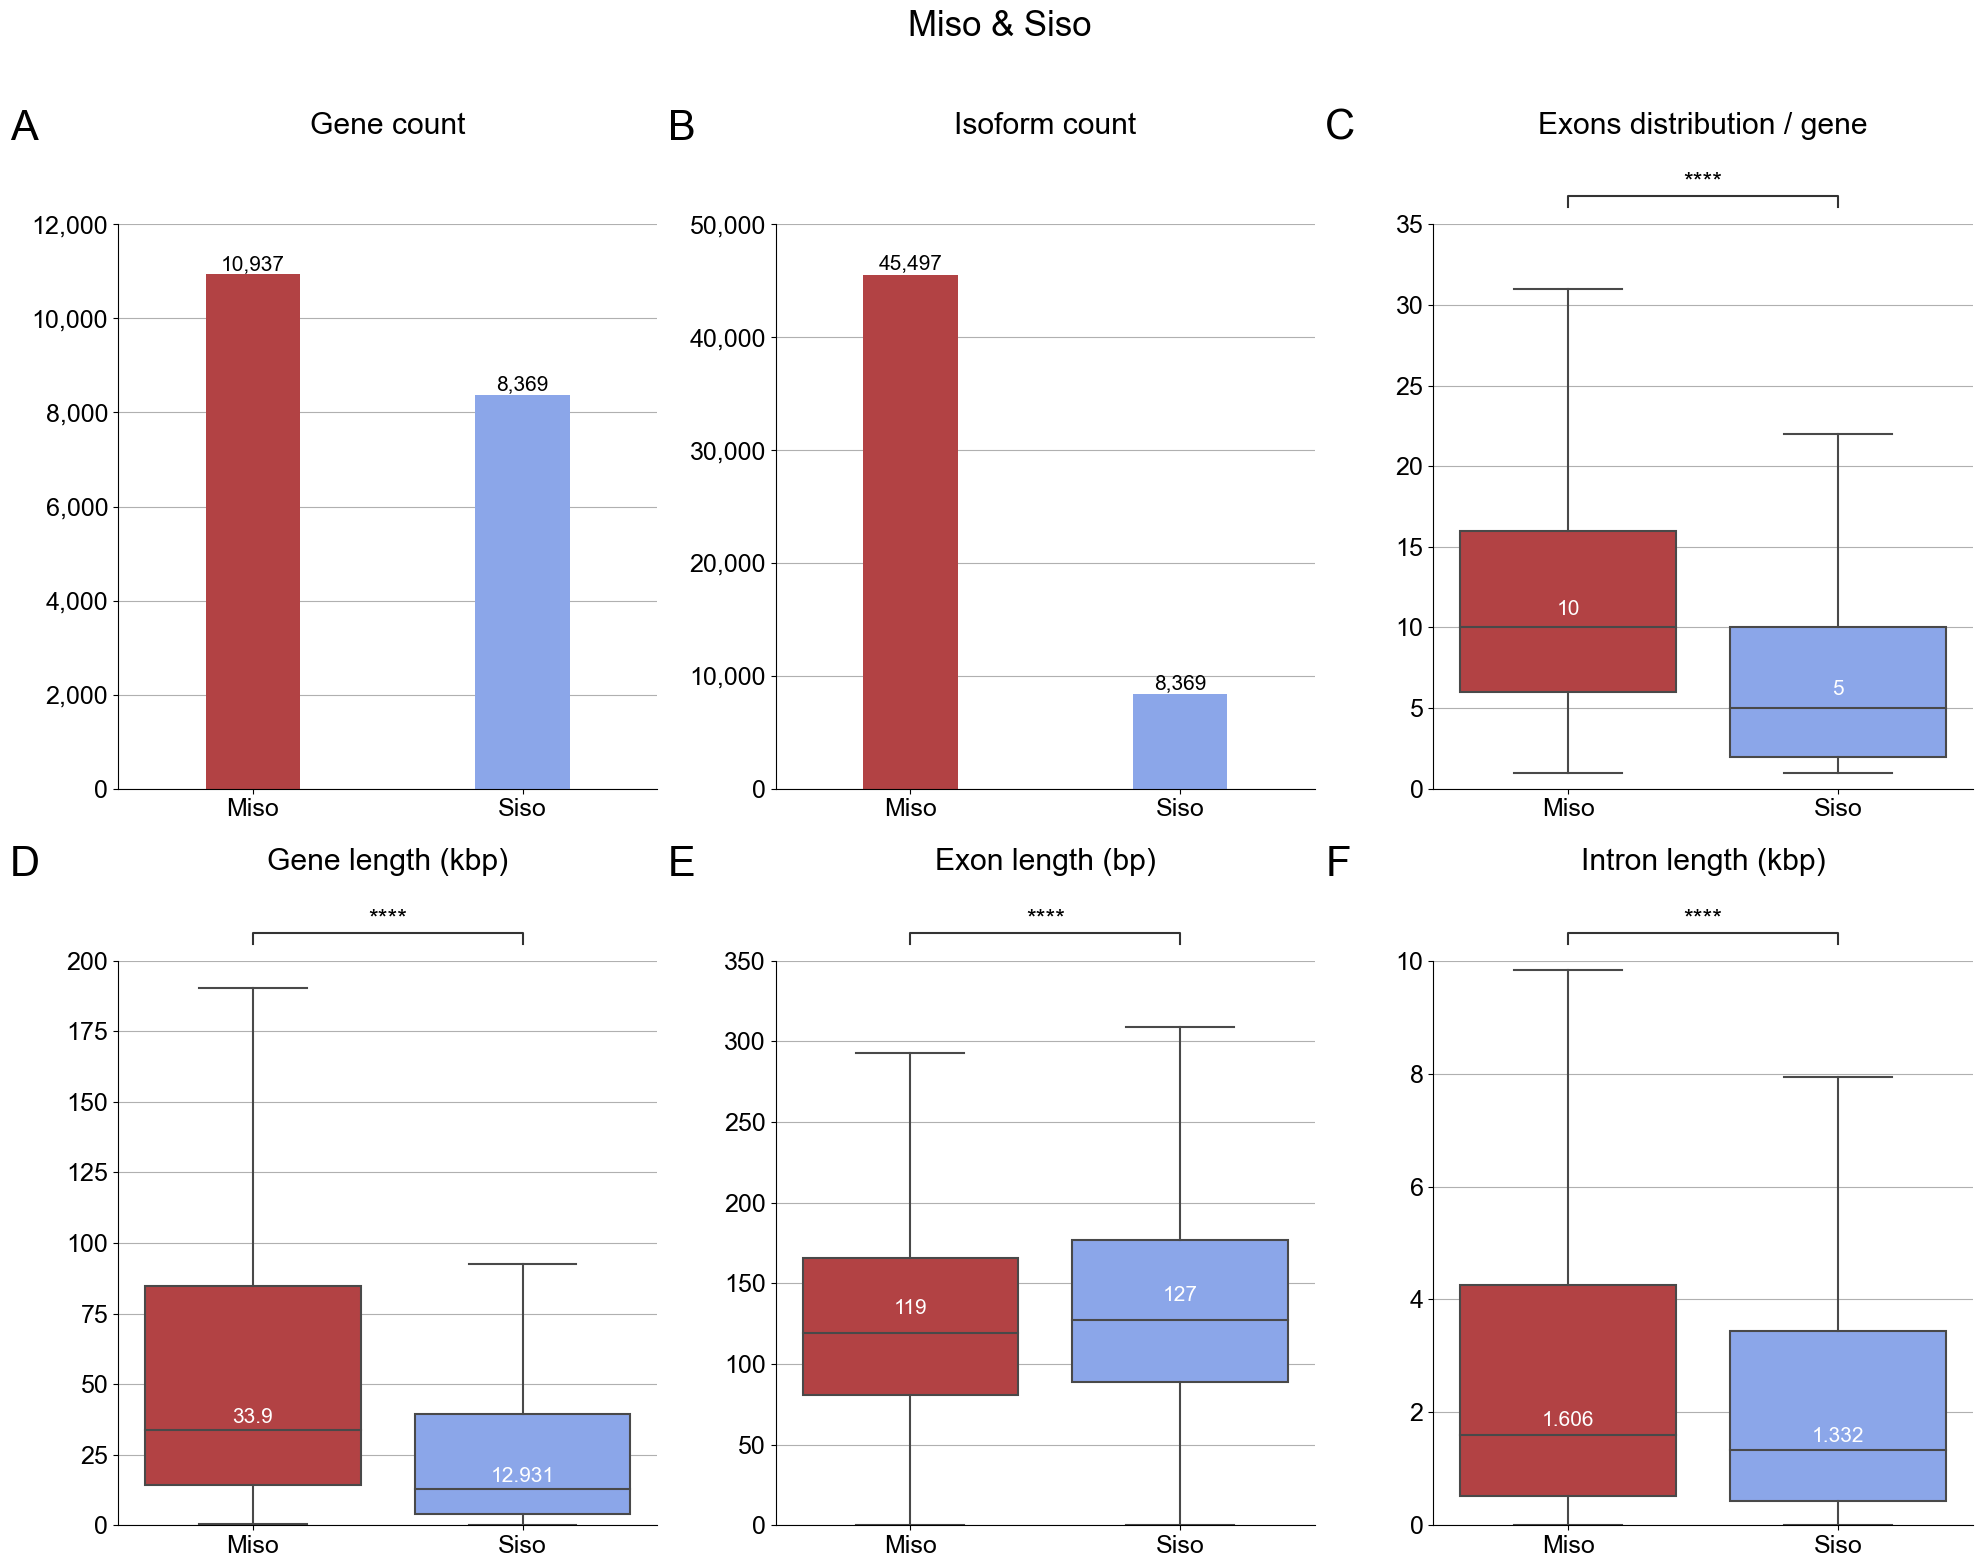

In [1265]:
f, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,15))
palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}
custom_barplot(pd.merge(refseq_wt_variable_drop_duplicates[["Gene", 'mRNA_gene']].explode('mRNA_gene').drop_duplicates(), genes, on='Gene').groupby('Miso_siso')['Gene'].nunique().reset_index(), "Miso_siso", "Gene", ax[0][0], (0,12000), "Gene count", palette=palette, padding_title=65, padding=100)
custom_barplot(refseq_wt_variable_drop_duplicates[['mRNA_gene', 'Miso_siso']].explode('mRNA_gene').drop_duplicates().groupby('Miso_siso').count().reset_index(), "Miso_siso", "mRNA_gene", ax[0][1], (0,5e4), "Isoform count", palette=palette, padding_title=65, padding=500)
custom_boxplot(data_to_plot,"Miso_siso","ranges_without_variable",ax[0][2],(0,35),"Exons distribution / gene",[("Siso", "Miso")], palette=palette, padding_title=65, )
custom_boxplot(genes,"Miso_siso","Length",ax[1][0],(0,2e2),"Gene length (kbp)",[("Siso", "Miso")], palette=palette, padding_title=65, )
custom_boxplot(refseq_wt_variable_drop_duplicates,"Miso_siso","Length_raw",ax[1][1],(0,350),"Exon length (bp)",[("Siso", "Miso")], palette=palette, padding_title=65, )
custom_boxplot(refseq_introns_plot,"Miso_siso","Introns_lengths",ax[1][2],(0,1e1),"Intron length (kbp)",[("Siso", "Miso")], palette=palette, padding_title=65, )

i = 0
for n, a in enumerate(ax):
    print(a)
    for sub_a in a:
        print(sub_a)
        sub_a.text(-0.2, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=30, weight='bold')
        i += 1
plt.suptitle("Miso & Siso", fontsize=25, y=1.05)        
plt.tight_layout()

In [326]:
# refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby(['Gene', 'Miso_siso'])['ranges_without_variable'].nunique().reset_index()
t = pd.merge(genes[['Gene', 'Length']], refseq_wt_variable_drop_duplicates.reset_index(drop=True).groupby(['Gene', 'Miso_siso'])['ranges_without_variable'].nunique().reset_index().rename({'ranges_without_variable' : 'Exon_count'}, axis=1), on='Gene')
t.to_excel('/gstock/EXOTIC/data/GENOMICS/genes_length_exoncount.xlsx', index=False)
# t_miso = t.loc[t['Miso_siso'] == 'Miso']
# # t_miso = t_miso.loc[ (t_miso['Length'] < t_miso['Length'].quantile(0.99))]
# g = sns.jointplot(data=t_miso, x="Exon_count", y="Length", kind='reg', xlim=(0,100), ylim=(0,500))


In [1851]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

t = t.groupby('Gene').progress_apply(test_intron_nb)
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')

# t[['Gene', 'Length', 'Miso_siso', 'Introns_lengths', "Intron_nb"]].to_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet', index=False)
t


100%|██████████| 17279/17279 [00:17<00:00, 980.89it/s] 


Gene  Length                                       Exons_ranges  \
0       SAMD11   18843  [861322-861393, 865535-865716, 866419-866469, ...   
1       SAMD11   18843  [861322-861393, 865535-865716, 866419-866469, ...   
2       SAMD11   18843  [861322-861393, 865535-865716, 866419-866469, ...   
3       SAMD11   18843  [861322-861393, 865535-865716, 866419-866469, ...   
4       SAMD11   18843  [861322-861393, 865535-865716, 866419-866469, ...   
...        ...     ...                                                ...   
180238    DAZ4   73220  [26980274-26980276, 26986878-26987024, 2698729...   
180239   BPY2C   21203  [27190093-27190170, 27187916-27188033, 2718495...   
180240   BPY2C   21203  [27190093-27190170, 27187916-27188033, 2718495...   
180241   BPY2C   21203  [27190093-27190170, 27187916-27188033, 2718495...   
180242    CDY1    2785             [27768590-27770212, 27770602-27770674]   

        Strand Miso_siso                                     Introns_ranges  \
0            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
1            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
2            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
3            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
4            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
...        ...       ...                                                ...   
180238       1      Miso  [26980277-26986877, 26987025-26987298, 2698739...   
180239       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180240       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180241       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180242       1      Miso                                [27770213-27770601]   

        Introns_lengths  Intron_nb  mRNA_gene_nb  CDS_count  
0                 4.140          1             1         13  
1                 0.701          2             1         13  
2                 4.681          3             1         13  
3                 3.142          4             1         13  
4                 0.144          5             1         13  
...                 ...        ...           ...        ...  
180238            4.571         21             2         22  
180239            0.691          1             1          4  
180240            2.853          2             1          4  
180241            2.058          3             1          4  
180242            0.388          1             2          3  

[180243 rows x 10 columns]

In [759]:
refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']]

Gene  mRNA_gene_nb  CDS_count
0       A1BG             1          8
1       A1BG             1          8
2       A1BG             1          8
3       A1BG             1          8
4       A1BG             1          8
...      ...           ...        ...
205622  ZZZ3             2         12
205623  ZZZ3             2         12
205624  ZZZ3             2         12
205625  ZZZ3             2         12
205626  ZZZ3             2         12

[205627 rows x 3 columns]

In [1829]:
output_path = '/gstock/EXOTIC/data/GENOMICS/genes_length_intronlengthmax.parquet'

if os.path.isfile(output_path) is False:

    def test_intron_nb(df):

    #     print(list(range(1, df.shape[0] + 1)))
        df['Intron_nb'] = list(range(1, df.shape[0] + 1))

        df['Intron_length_max'] = df.Introns_lengths.max()
        df['Intron_length_max_index'] = df.Introns_lengths.tolist().index(df.Introns_lengths.max()) + 1
        df['Exon_length_max'] = df.Exons_ranges.apply(lambda r: max([int(e.split('-')[1]) - int(e.split('-')[0]) for e in r]))
    #     print(df)
        return df

    t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

    t = t.groupby('Gene').parallel_apply(test_intron_nb)
    t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True), on='Gene')

    t = t[['Gene', 'Length', 'Miso_siso', "Intron_length_max", "Intron_length_max_index",  'mRNA_gene_nb', 'CDS_count', "Strand", "Exon_length_max"]].drop_duplicates()
    t['Intron_length_norm'] = t['Intron_length_max'] / t['Length']

    t.to_parquet(output_path, index=False)
else:
    t = pd.read_parquet(output_path)
t


Gene  Length Miso_siso  Intron_length_max  Intron_length_max_index  \
0       SAMD11  18.843      Siso              4.681                        3   
1        NOC2L  15.053      Siso              2.522                        7   
2       KLHL17   5.135      Siso              0.491                        1   
3      PLEKHN1   9.383      Miso              3.472                        2   
4        PERM1   6.895      Miso              2.255                        2   
...        ...     ...       ...                ...                      ...   
17274    BPY2B  21.203      Siso              2.853                        2   
17275     DAZ3  50.423      Siso              9.714                        3   
17276     DAZ4  73.220      Miso             14.472                       18   
17277    BPY2C  21.203      Siso              2.853                        2   
17278     CDY1   2.785      Miso              0.388                        1   

       mRNA_gene_nb  CDS_count  Strand  Exon_length_max  Intron_length_norm  
0                 1         13       1              499            0.248421  
1                 1         19       0              188            0.167541  
2                 1         12       1              259            0.095618  
3                 3         17       1              218            0.370031  
4                 4          6       0             2148            0.327049  
...             ...        ...     ...              ...                 ...  
17274             1          4       1              117            0.134556  
17275             1         18       0              146            0.192650  
17276             2         22       1              146            0.197651  
17277             1          4       0              117            0.134556  
17278             2          3       1             1622            0.139318  

[17279 rows x 10 columns]

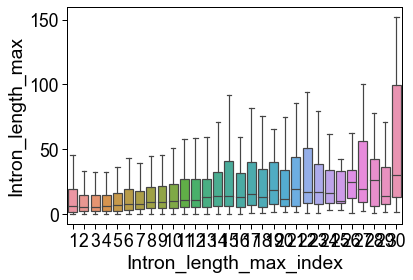

In [794]:
t_plot = t.loc[t['Intron_length_max_index'] <= 30]
# t_plot = t_plot.groupby('Intron_length_max_index')['Gene'].count()
sns.boxplot(data=t_plot, x='Intron_length_max_index', y='Intron_length_max', showfliers=False)

In [1717]:
genes.loc[genes['Gene'] == 'OR4F5']

NC RefSeq_validation Region_type  Start    End Score Strand  \
38  NC_000001.10        BestRefSeq        gene  69091  70008     .      +   

   Phase                                         Attributes   Gene  Length  \
38     .  ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14...  OR4F5   0.917   

   Miso_siso  
38      Siso

In [1716]:
refseq_wt_variable_drop_duplicates.loc[refseq_wt_variable_drop_duplicates['Gene'] == 'OR4F5'] 

Gene Exon_type       ranges      mRNA_exons Exon_start Exon_stop  \
124317  OR4F5       CDS  69091-70008  [NM_001005484]      69091     70008   

        Length  Strand  mRNA_exons_nb       mRNA_gene  ...  Ratio_num  \
124317     917       1              1  [NM_001005484]  ...        1.0   

       Const_Alt  Share CDS_count  ranges_without_variable  Exon_start_raw  \
124317     Const  False         1              69091-70008           69091   

       Exon_stop_raw  Length_raw  Miso_siso  Exon_nb  
124317         70008         917       Siso        1  

[1 rows x 22 columns]

In [1725]:
genes.sort_values(by=['Gene'])

NC RefSeq_validation Region_type      Start        End  \
1315746   NC_000019.9        BestRefSeq        gene   58856549   58864858   
761693   NC_000010.10        BestRefSeq        gene   52559169   52645435   
901738   NC_000012.11        BestRefSeq        gene    9220304    9268825   
901474   NC_000012.11        BestRefSeq        gene    8975217    9029383   
28126    NC_000001.10        BestRefSeq        gene   33772367   33786699   
...               ...               ...         ...        ...        ...   
43717    NC_000001.10        BestRefSeq        gene   53308432   53360670   
43683    NC_000001.10        BestRefSeq        gene   53192125   53293008   
604505   NC_000007.13        BestRefSeq        gene  143078438  143088204   
1154546  NC_000017.10        BestRefSeq        gene    3907739    4046324   
53272    NC_000001.10        BestRefSeq        gene   78028101   78149112   

        Score Strand Phase                                         Attributes  \
1315746     .      -     .  ID=gene-A1BG;Dbxref=GeneID:1,HGNC:HGNC:5,MIM:1...   
761693      .      -     .  ID=gene-A1CF;Dbxref=GeneID:29974,HGNC:HGNC:240...   
901738      .      -     .  ID=gene-A2M;Dbxref=GeneID:2,HGNC:HGNC:7,MIM:10...   
901474      .      +     .  ID=gene-A2ML1;Dbxref=GeneID:144568,HGNC:HGNC:2...   
28126       .      -     .  ID=gene-A3GALT2;Dbxref=GeneID:127550,HGNC:HGNC...   
...       ...    ...   ...                                                ...   
43717       .      +     .  ID=gene-ZYG11A;Dbxref=GeneID:440590,HGNC:HGNC:...   
43683       .      +     .  ID=gene-ZYG11B;Dbxref=GeneID:79699,HGNC:HGNC:2...   
604505      .      +     .  ID=gene-ZYX;Dbxref=GeneID:7791,HGNC:HGNC:13200...   
1154546     .      -     .  ID=gene-ZZEF1;Dbxref=GeneID:23140,HGNC:HGNC:29...   
53272       .      -     .  ID=gene-ZZZ3;Dbxref=GeneID:26009,HGNC:HGNC:245...   

            Gene   Length Miso_siso  
1315746     A1BG    8.309      Siso  
761693      A1CF   86.266      Miso  
901738       A2M   48.521      Miso  
901474     A2ML1   54.166      Miso  
28126    A3GALT2   14.332      Siso  
...          ...      ...       ...  
43717     ZYG11A   52.238      Miso  
43683     ZYG11B  100.883      Siso  
604505       ZYX    9.766      Miso  
1154546    ZZEF1  138.585      Siso  
53272       ZZZ3  121.011      Miso  

[19324 rows x 12 columns]

In [1727]:
test = pd.merge(genes[['Gene', 'Miso_siso', 'Length']], refseq_wt_variable_drop_duplicates[['Gene', 'CDS_count', 'Length_raw']], on='Gene')
test['Length'] = test['Length'] * 1000
test = pd.merge(test.groupby(["Gene"])['Length_raw'].sum().rename('Length_sum_exons').reset_index(), test, on='Gene')[['Gene', 'Length_sum_exons', 'Miso_siso', 'Length', 'CDS_count']].drop_duplicates()
test['R_exons'] = 100 * (test['Length_sum_exons'] / test['Length'])

test

Gene  Length_sum_exons Miso_siso    Length  CDS_count    R_exons
0          A1BG              1480      Siso    8309.0          8  17.812011
8          A1CF              1896      Miso   86266.0         13   2.197853
20          A2M              4389      Miso   48521.0         38   9.045568
56        A2ML1              4332      Miso   54166.0         36   7.997637
92      A3GALT2              1018      Siso   14332.0          5   7.102986
...         ...               ...       ...       ...        ...        ...
205786   ZYG11A              2388      Miso   52238.0         15   4.571385
205801   ZYG11B              2221      Siso  100883.0         14   2.201560
205815      ZYX              1710      Miso    9766.0          9  17.509728
205824    ZZEF1              8831      Siso  138585.0         55   6.372263
205879     ZZZ3              2723      Miso  121011.0         12   2.250209

[19307 rows x 6 columns]

Text(-2.5, 105, 'A')

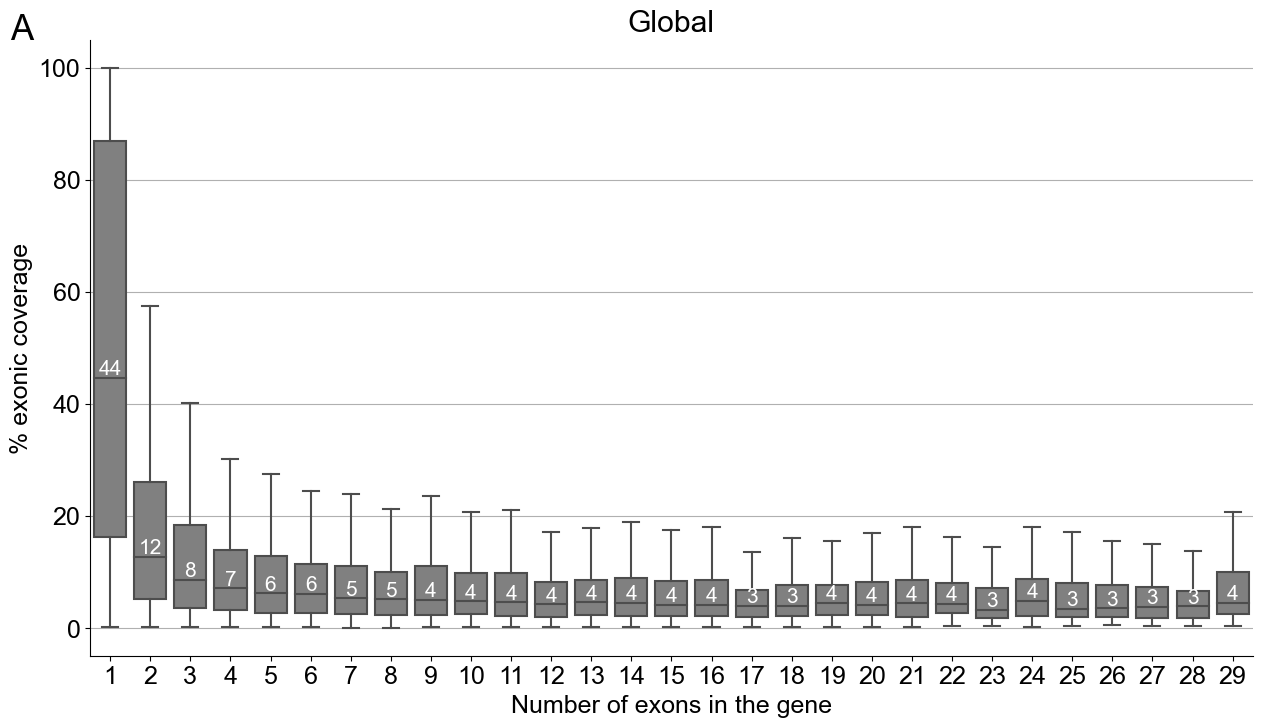

In [1827]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

test = pd.merge(genes[['Gene', 'Miso_siso', 'Length']], refseq_wt_variable_drop_duplicates[['Gene', 'CDS_count', 'Length_raw']], on='Gene')
test['Length'] = test['Length'] * 1000
test = pd.merge(test.groupby(["Gene"])['Length_raw'].sum().rename('Length_sum_exons').reset_index(), test, on='Gene')[['Gene', 'Length_sum_exons', 'Miso_siso', 'Length', 'CDS_count']].drop_duplicates()
test['R_exons'] = 100 * (test['Length_sum_exons'] / test['Length'])
test = test.loc[test['CDS_count'] < 30]

f, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=test, x='CDS_count', y='R_exons',  showfliers=False, palette=['grey'], ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('% exonic coverage')
ax.set_xlabel('Number of exons in the gene')
ax.set_title('Global')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

medians = test.groupby(['CDS_count'])['R_exons'].median().tolist()
vertical_offset = test['R_exons'].median() * 0.1 # offset from median for display
# x_cat = t.Gene_size_type.unique().tolist()

# print(medians)

for j, xtick in enumerate(ax.get_xticks()):
#     for cat, x_shift in zip(t.Miso_siso.unique(), [-0.2,+0.2]):

    ax.text(xtick, medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',size='small',color='w',weight='semibold')
ax.text(-2.5, 105, "A", fontsize=25, weight='bold')

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  



In [1826]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

test = pd.merge(genes[['Gene', 'Miso_siso', 'Length']], refseq_wt_variable_drop_duplicates[['Gene', 'CDS_count', 'Length_raw']], on='Gene')
test['Length'] = test['Length'] * 1000
test = pd.merge(test.groupby(["Gene"])['Length_raw'].sum().rename('Length_sum_exons').reset_index(), test, on='Gene')[['Gene', 'Length_sum_exons', 'Miso_siso', 'Length', 'CDS_count']].drop_duplicates()
test['R_exons'] = 100 * (test['Length_sum_exons'] / test['Length'])
test = test.loc[test['CDS_count'] < 30].sort_values(by=['Miso_siso'])

f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=test, x='CDS_count', y='R_exons', hue='Miso_siso', showfliers=False, palette=palette, ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('% exonic coverage')
ax.set_xlabel('Number of exons in the gene')
ax.set_title('Miso & Siso')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

ax.legend(title='')
medians = test.groupby(['Miso_siso', 'CDS_count'])['R_exons'].median()
vertical_offset = test['R_exons'].median() * 0.1 # offset from median for display
# x_cat = t.Gene_size_type.unique().tolist()

# print(medians)

for j, xtick in enumerate(ax.get_xticks()):
    for cat, x_shift in zip(sorted(t.Miso_siso.unique()), [-0.2,+0.2]):

        ax.text(xtick + x_shift, medians[cat][xtick+1] + vertical_offset, int(medians[cat][xtick+1]), 
                horizontalalignment='center',size='small',color='w',weight='semibold')
ax.text(-2.5, 105, "B", fontsize=25, weight='bold')

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  



Text(-2.5, 105, 'B')

In [1708]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

# t = t.groupby('Gene').progress_apply(test_intron_nb)
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')

# t[['Gene', 'Length', 'Miso_siso', 'Introns_lengths', "Intron_nb"]].to_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet', index=False)
t


f, ax = plt.subplots(figsize=(15,8))
t_plot = pd.merge(t[['Gene', 'Length', 'CDS_count']].drop_duplicates(), t.groupby('Gene')['Introns_lengths'].sum().reset_index(), on='Gene')
t_plot['Ratio'] =  100 * (t_plot['Introns_lengths'] / t_plot['Length'])
t_plot = t_plot.loc[(t_plot['CDS_count'] <= 30) & (t_plot['Ratio'] > 0) & (t_plot['Ratio'] <= 100)]
sns.boxplot(data=t_plot, x='CDS_count', y='Ratio',  showfliers=False, palette=['grey'], ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('% intronic coverage')
ax.set_xlabel('Genes with x exons')

medians = t_plot.groupby(['CDS_count'])['Ratio'].median().tolist()
vertical_offset = t_plot['Ratio'].median() * 0.01 # offset from median for display
# x_cat = t.Gene_size_type.unique().tolist()

# print(medians)

for j, xtick in enumerate(ax.get_xticks()):
#     for cat, x_shift in zip(t.Miso_siso.unique(), [-0.2,+0.2]):

    ax.text(xtick, medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',size='small',color='w',weight='semibold')
ax.text(-2.5, 105, "A", fontsize=25, weight='bold')

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  



Text(-2.5, 105, 'A')

In [1383]:
t

Gene  Length                                       Exons_ranges  \
0       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
1       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
2       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
3       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
4       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
...        ...     ...                                                ...   
180238    DAZ4  73.220  [26980274-26980276, 26986878-26987024, 2698729...   
180239   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180240   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180241   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180242    CDY1   2.785             [27768590-27770212, 27770602-27770674]   

        Strand Miso_siso                                     Introns_ranges  \
0            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
1            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
2            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
3            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
4            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
...        ...       ...                                                ...   
180238       1      Miso  [26980277-26986877, 26987025-26987298, 2698739...   
180239       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180240       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180241       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180242       1      Miso                                [27770213-27770601]   

        Introns_lengths  mRNA_gene_nb  CDS_count  
0                 4.140             1         13  
1                 0.701             1         13  
2                 4.681             1         13  
3                 3.142             1         13  
4                 0.144             1         13  
...                 ...           ...        ...  
180238            4.571             2         22  
180239            0.691             1          4  
180240            2.853             1          4  
180241            2.058             1          4  
180242            0.388             2          3  

[180243 rows x 9 columns]

Text(-2, 105, 'B')

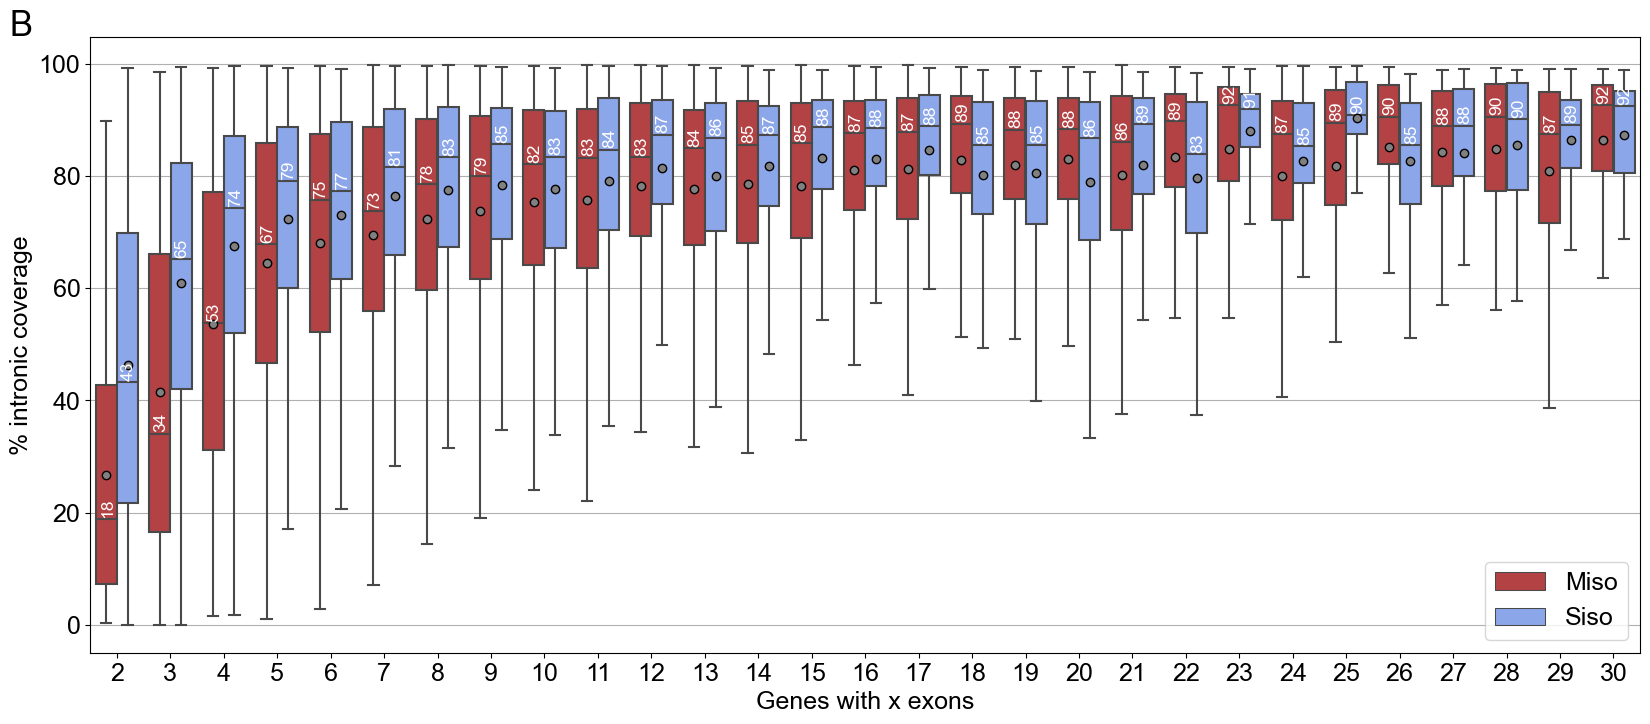

In [1707]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

# t = t.groupby('Gene').progress_apply(test_intron_nb)
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')

# t[['Gene', 'Length', 'Miso_siso', 'Introns_lengths', "Intron_nb"]].to_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet', index=False)
t = t.sort_values(by='Miso_siso')


f, ax = plt.subplots(figsize=(20,8))
t_plot = pd.merge(t[['Gene', 'Length', 'CDS_count']].drop_duplicates(), t.groupby(['Miso_siso', 'Gene'])['Introns_lengths'].sum().reset_index(), on='Gene')
t_plot['Ratio'] =  100 * (t_plot['Introns_lengths'] / t_plot['Length'])
t_plot = t_plot.loc[(t_plot['CDS_count'] <= 30) & (t_plot['Ratio'] > 0) & (t_plot['Ratio'] <= 100)]
sns.boxplot(data=t_plot, x='CDS_count', y='Ratio', hue='Miso_siso', showfliers=False, palette=palette, ax=ax)

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('% intronic coverage')
ax.set_xlabel('Genes with x exons')
ax.legend(title='')

medians = t_plot.groupby(['Miso_siso', 'CDS_count'])['Ratio'].median()
vertical_offset = t_plot['Ratio'].median() * 0.01 # offset from median for display
x_cat = t.Miso_siso.unique().tolist()


for j, xtick in enumerate(ax.get_xticks()):
    for cat, x_shift in zip(t.Miso_siso.unique(), [-0.18,+0.22]):
        ax.text(xtick + x_shift, medians[cat][xtick+2] + vertical_offset, int(medians[cat][xtick+2]), 
                horizontalalignment='center',size='x-small',color='w',weight='semibold', rotation=90)

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  
ax.text(-2, 105, "B", fontsize=25, weight='bold')



In [1409]:
t

Gene   Length                                       Exons_ranges  \
180242    CDY1    2.785             [27768590-27770212, 27770602-27770674]   
87209     PKN3   18.413  [131465195-131465218, 131467582-131467822, 131...   
87208     PKN3   18.413  [131465195-131465218, 131467582-131467822, 131...   
87207     PKN3   18.413  [131465195-131465218, 131467582-131467822, 131...   
87206     PKN3   18.413  [131465195-131465218, 131467582-131467822, 131...   
...        ...      ...                                                ...   
92714    ZMIZ1  247.553  [80961390-80961449, 80968093-80968206, 8097592...   
92713    ZMIZ1  247.553  [80961390-80961449, 80968093-80968206, 8097592...   
92712    ZMIZ1  247.553  [80961390-80961449, 80968093-80968206, 8097592...   
92720     PPIF    7.865  [81107305-81107499, 81108832-81108862, 8110942...   
90121   DNAJC1  247.182  [22292142-22292363, 22217969-22218070, 2221743...   

        Strand Miso_siso                                     Introns_ranges  \
180242       1      Miso                                [27770213-27770601]   
87209        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87208        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87207        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87206        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
...        ...       ...                                                ...   
92714        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92713        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92712        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92720        1      Siso  [81107500-81108831, 81108863-81109420, 8110951...   
90121        0      Siso  [22045685-22048098, 22048548-22055189, 2205523...   

        Introns_lengths  mRNA_gene_nb  CDS_count  
180242            0.388             2          3  
87209             0.080             2         24  
87208             1.059             2         24  
87207             0.160             2         24  
87206             1.400             2         24  
...                 ...           ...        ...  
92714             0.300             1         21  
92713             0.987             1         21  
92712             1.801             1         21  
92720             0.557             1          6  
90121             6.641             1         12  

[180243 rows x 9 columns]

In [1408]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

# t = t.groupby('Gene').progress_apply(test_intron_nb)
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')

# t[['Gene', 'Length', 'Miso_siso', 'Introns_lengths', "Intron_nb"]].to_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet', index=False)
t = t.sort_values(by='Miso_siso')


f, ax = plt.subplots(figsize=(20,8))
t_plot = pd.merge(t[['Gene', 'Length', 'CDS_count']].drop_duplicates(), t.groupby(['Miso_siso', 'Gene'])['Introns_lengths'].sum().reset_index(), on='Gene')
t_plot['Ratio'] =  100 * (t_plot['Introns_lengths'] / t_plot['Length'])
t_plot = t_plot.loc[(t_plot['CDS_count'] <= 30) & (t_plot['Ratio'] > 0) & (t_plot['Ratio'] <= 100)]

sns.boxplot(data=t_plot, x='CDS_count', y='Ratio', hue='Miso_siso', showfliers=False, palette=palette, ax=ax)

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_ylabel('% intronic coverage')
ax.set_xlabel('Genes with x exons')
ax.legend(title='')

medians = t_plot.groupby(['Miso_siso', 'CDS_count'])['Ratio'].median()
vertical_offset = t_plot['Ratio'].median() * 0.01 # offset from median for display
x_cat = t.Miso_siso.unique().tolist()


for j, xtick in enumerate(ax.get_xticks()):
    for cat, x_shift in zip(t.Miso_siso.unique(), [-0.18,+0.22]):
        ax.text(xtick + x_shift, medians[cat][xtick+2] + vertical_offset, int(medians[cat][xtick+2]), 
                horizontalalignment='center',size='x-small',color='w',weight='semibold', rotation=90)

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  
ax.text(-2, 105, "B", fontsize=25, weight='bold')



Text(-2, 105, 'B')

In [1098]:
sns.barplot(data=t.loc[t['Intron_nb'] <= 20], x='Intron_nb', y='Introns_lengths')

In [795]:
t_plot = t.loc[t['Intron_length_max_index'] <= 30]
t_plot['Intron_length_norm'] = t_plot['Intron_length_max'] / t_plot['Length']
# t_plot = t_plot.groupby('Intron_length_max_index')['Gene'].count()
sns.boxplot(data=t_plot, x='Intron_length_max_index', y='Intron_length_norm', showfliers=False)

In [1136]:
t

Gene  Length                                       Exons_ranges  \
0       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
1       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
2       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
3       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
4       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
...        ...     ...                                                ...   
180238    DAZ4  73.220  [26980274-26980276, 26986878-26987024, 2698729...   
180239   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180240   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180241   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180242    CDY1   2.785             [27768590-27770212, 27770602-27770674]   

        Strand Miso_siso                                     Introns_ranges  \
0            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
1            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
2            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
3            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
4            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
...        ...       ...                                                ...   
180238       1      Miso  [26980277-26986877, 26987025-26987298, 2698739...   
180239       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180240       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180241       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180242       1      Miso                                [27770213-27770601]   

        Introns_lengths  Intron_nb  mRNA_gene_nb  CDS_count  
0                 4.140          1             1         13  
1                 0.701          2             1         13  
2                 4.681          3             1         13  
3                 3.142          4             1         13  
4                 0.144          5             1         13  
...                 ...        ...           ...        ...  
180238            4.571         21             2         22  
180239            0.691          1             1          4  
180240            2.853          2             1          4  
180241            2.058          3             1          4  
180242            0.388          1             2          3  

[180243 rows x 10 columns]

In [1341]:
t

Gene  Length Miso_siso  Intron_length_max  Intron_length_max_index  \
0       SAMD11  18.843      Siso              4.681                        3   
1        NOC2L  15.053      Siso              2.522                        7   
2       KLHL17   5.135      Siso              0.491                        1   
3      PLEKHN1   9.383      Miso              3.472                        2   
4        PERM1   6.895      Miso              2.255                        2   
...        ...     ...       ...                ...                      ...   
17274    BPY2B  21.203      Siso              2.853                        2   
17275     DAZ3  50.423      Siso              9.714                        3   
17276     DAZ4  73.220      Miso             14.472                       18   
17277    BPY2C  21.203      Siso              2.853                        2   
17278     CDY1   2.785      Miso              0.388                        1   

       mRNA_gene_nb  CDS_count  Strand  Exon_length_max  Intron_length_norm  
0                 1         13       1              499            0.248421  
1                 1         19       0              188            0.167541  
2                 1         12       1              259            0.095618  
3                 3         17       1              218            0.370031  
4                 4          6       0             2148            0.327049  
...             ...        ...     ...              ...                 ...  
17274             1          4       1              117            0.134556  
17275             1         18       0              146            0.192650  
17276             2         22       1              146            0.197651  
17277             1          4       0              117            0.134556  
17278             2          3       1             1622            0.139318  

[17279 rows x 10 columns]

In [1483]:
refseq_wt_variable_drop_duplicates

Gene Exon_type             ranges                 mRNA_exons  \
0       A1BG       CDS  58864770-58864803                [NM_130786]   
1       A1BG       CDS  58864658-58864693                [NM_130786]   
2       A1BG       CDS  58864294-58864563                [NM_130786]   
3       A1BG       CDS  58863649-58863921                [NM_130786]   
4       A1BG       CDS  58862757-58863053                [NM_130786]   
...      ...       ...                ...                        ...   
205622  ZZZ3       CDS  78044459-78044554  [NM_001308237, NM_015534]   
205623  ZZZ3       CDS  78041753-78041905  [NM_001308237, NM_015534]   
205624  ZZZ3       CDS  78034017-78034151  [NM_001308237, NM_015534]   
205625  ZZZ3       CDS  78031766-78031866  [NM_001308237, NM_015534]   
205626  ZZZ3       CDS  78031325-78031469  [NM_001308237, NM_015534]   

       Exon_start Exon_stop  Length  Strand  mRNA_exons_nb  \
0        58864770  58864803      33       0              1   
1        58864658  58864693      35       0              1   
2        58864294  58864563     269       0              1   
3        58863649  58863921     272       0              1   
4        58862757  58863053     296       0              1   
...           ...       ...     ...     ...            ...   
205622   78044459  78044554      95       0              2   
205623   78041753  78041905     152       0              2   
205624   78034017  78034151     134       0              2   
205625   78031766  78031866     100       0              2   
205626   78031325  78031469     144       0              2   

                        mRNA_gene  ...  Ratio_num Const_Alt  Share CDS_count  \
0                     [NM_130786]  ...        1.0     Const  False         8   
1                     [NM_130786]  ...        1.0     Const  False         8   
2                     [NM_130786]  ...        1.0     Const  False         8   
3                     [NM_130786]  ...        1.0     Const  False         8   
4                     [NM_130786]  ...        1.0     Const  False         8   
...                           ...  ...        ...       ...    ...       ...   
205622  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205623  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205624  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205625  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205626  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   

        ranges_without_variable  Exon_start_raw Exon_stop_raw  Length_raw  \
0             58864770-58864803        58864770      58864803          33   
1             58864658-58864693        58864658      58864693          35   
2             58864294-58864563        58864294      58864563         269   
3             58863649-58863921        58863649      58863921         272   
4             58862757-58863053        58862757      58863053         296   
...                         ...             ...           ...         ...   
205622        78044459-78044554        78044459      78044554          95   
205623        78041753-78041905        78041753      78041905         152   
205624        78034017-78034151        78034017      78034151         134   
205625        78031766-78031866        78031766      78031866         100   
205626        78031325-78031469        78031325      78031469         144   

        Miso_siso  Exon_nb  
0            Siso        1  
1            Siso        2  
2            Siso        3  
3            Siso        4  
4            Siso        5  
...           ...      ...  
205622       Miso        8  
205623       Miso        9  
205624       Miso       10  
205625       Miso       11  
205626       Miso       12  

[205627 rows x 22 columns]

In [1340]:
# t['CDS_count'] = t['CDS_count'].astype(int)
t = pd.read_parquet(output_path)

f = plt.figure(figsize=(15,10))
sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby('CDS_count')['Intron_length_max'].mean().reset_index(), x='CDS_count', y='Intron_length_max', palette=['grey'])

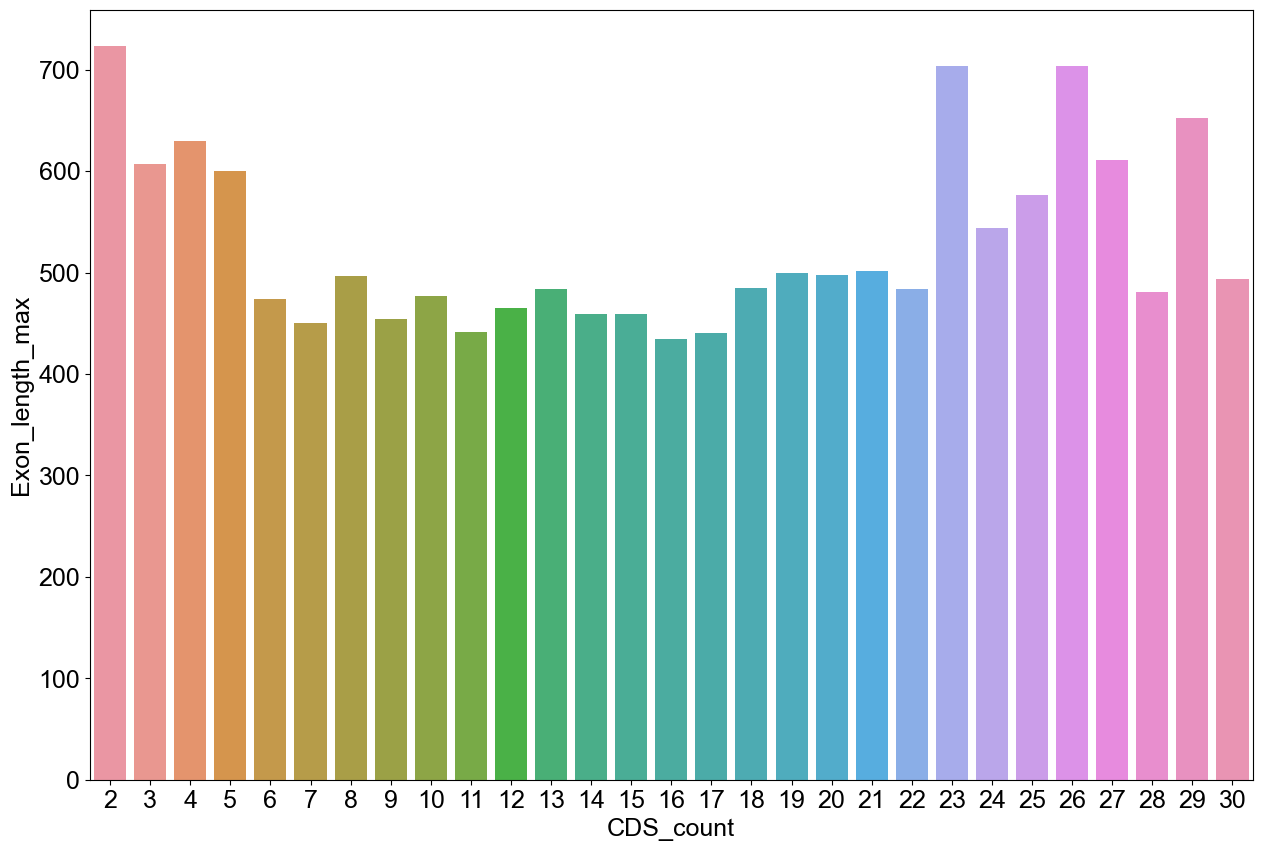

In [1342]:
# t['CDS_count'] = t['CDS_count'].astype(int)
f = plt.figure(figsize=(15,10))
sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby('CDS_count')['Exon_length_max'].mean().reset_index(), x='CDS_count', y='Exon_length_max')

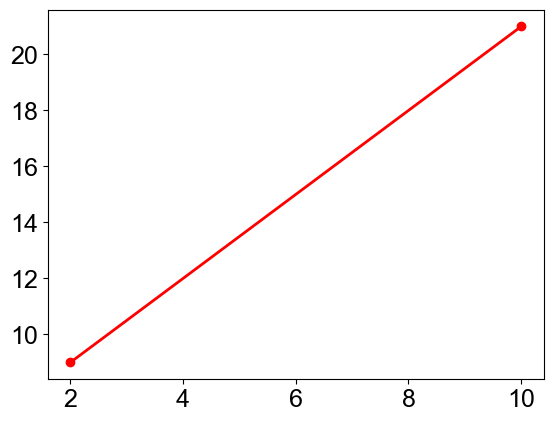

In [1454]:
f = plt.figure()
plt.plot(
    [2, 10], [9,21], color='red', lw=2, marker='o'
)

Rectangle(xy=(-0.4, 0), width=0.8, height=722.894, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=606.712, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=629.985, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=599.581, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=473.867, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=450.111, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=496.458, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=454.484, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=476.519, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=441.069, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=465.309, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=484.205, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=459.476, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=459.156, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=434.192, angle=0)
Rectangle(xy=(14.6, 0), width=0.8, height=440.008, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=484.455,

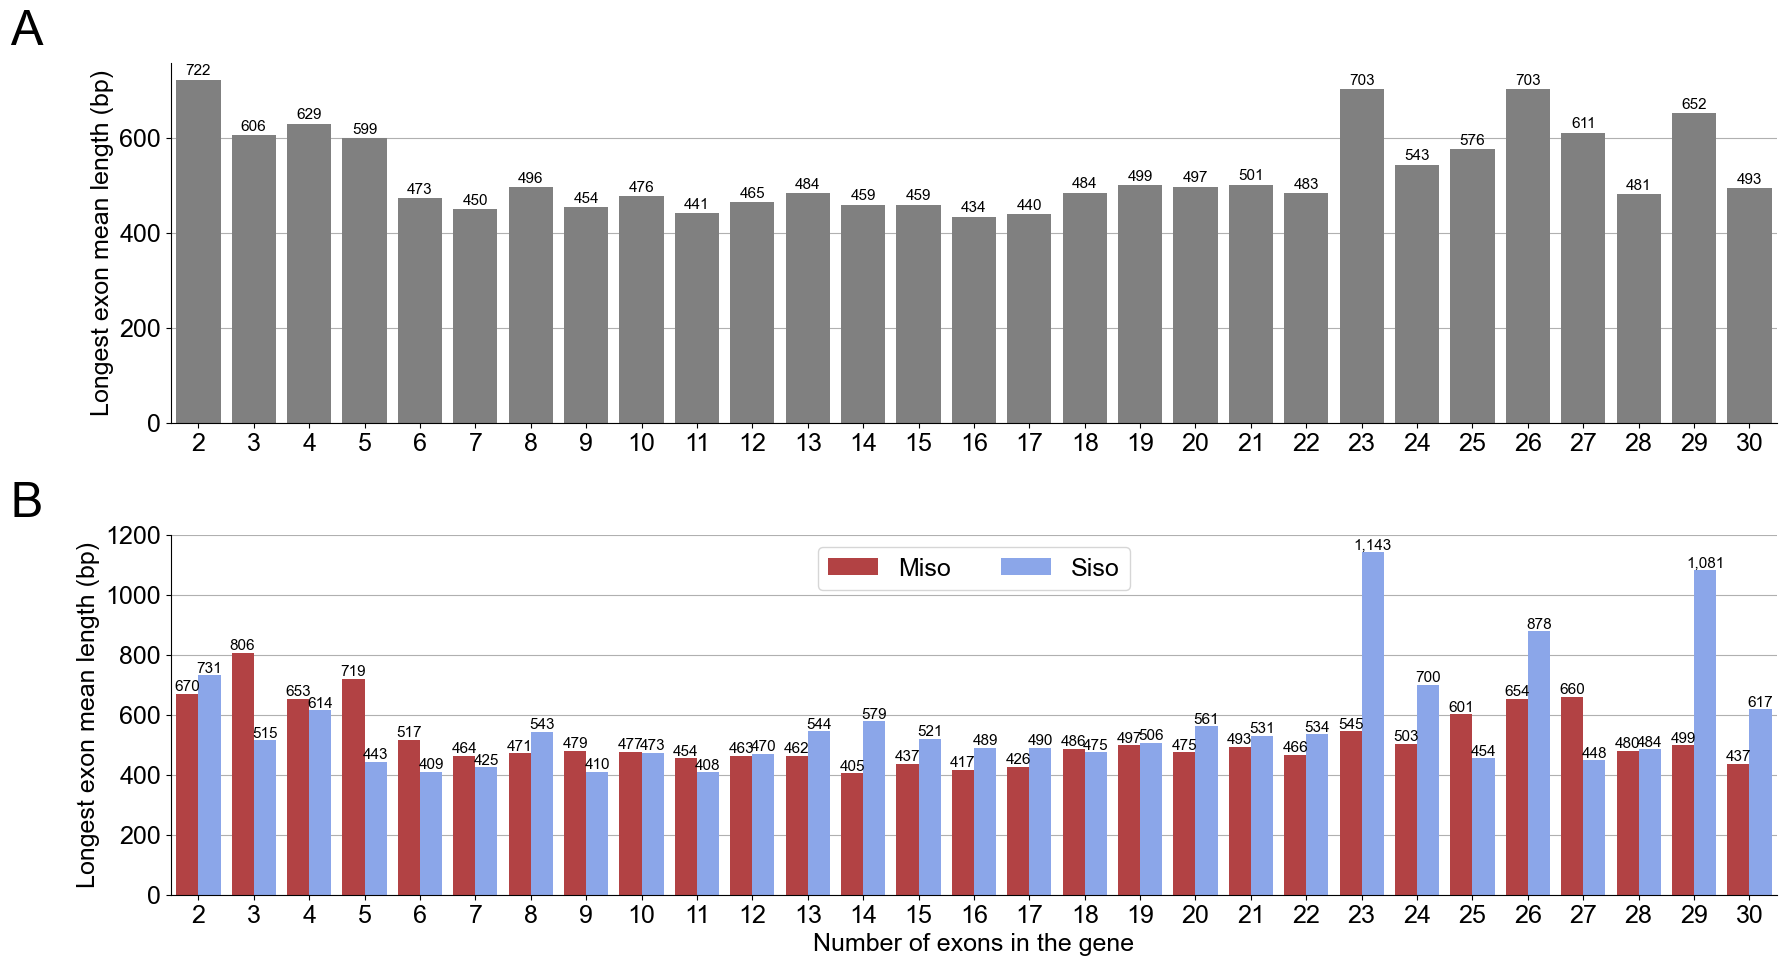

In [1799]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0, padding=1):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + padding
            if i == 0:
                value = "{:,}".format(int(p.get_height()))
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

f, ax = plt.subplots(nrows=2, figsize=(18,10))



sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby('CDS_count')['Exon_length_max'].mean().reset_index(), x='CDS_count', y='Exon_length_max', palette=['grey'], ax=ax[0])
ax[0].spines['right'].set_linewidth(0)
ax[0].spines['top'].set_linewidth(0)
ax[0].set_xlabel('')
ax[0].set_ylabel('Longest exon mean length (bp)')
ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
show_values_on_bars(ax[0], fontsize=11, padding=10)




sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby(['Miso_siso', 'CDS_count'])['Exon_length_max'].mean().reset_index(), x='CDS_count', y='Exon_length_max', hue='Miso_siso', palette=palette, ax=ax[1])
ax[1].spines['right'].set_linewidth(0)
ax[1].spines['top'].set_linewidth(0)
ax[1].set_xlabel('Number of exons in the gene')
ax[1].set_ylabel('Longest exon mean length (bp)')
ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].legend(title='', ncol=2, loc='upper center')
show_values_on_bars(ax[1], fontsize=11, padding=10)

i = 0
for n, sub_a in enumerate(ax):
    sub_a.text(-0.1, 1.05, string.ascii_uppercase[i], transform=sub_a.transAxes, size=35, weight='bold')
    i += 1 
plt.tight_layout()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Rectangle(xy=(-0.4, 0), width=0.8, height=9.10493, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=10.5425, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=11.5974, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=15.9212, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=14.4929, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=17.1319, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=18.6015, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=20.1196, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=21.5339, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=24.5518, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=24.8234, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=23.4169, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=24.5132, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=22.2096, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=29.1622, angle=0)
Rectangle(xy=(14.6, 

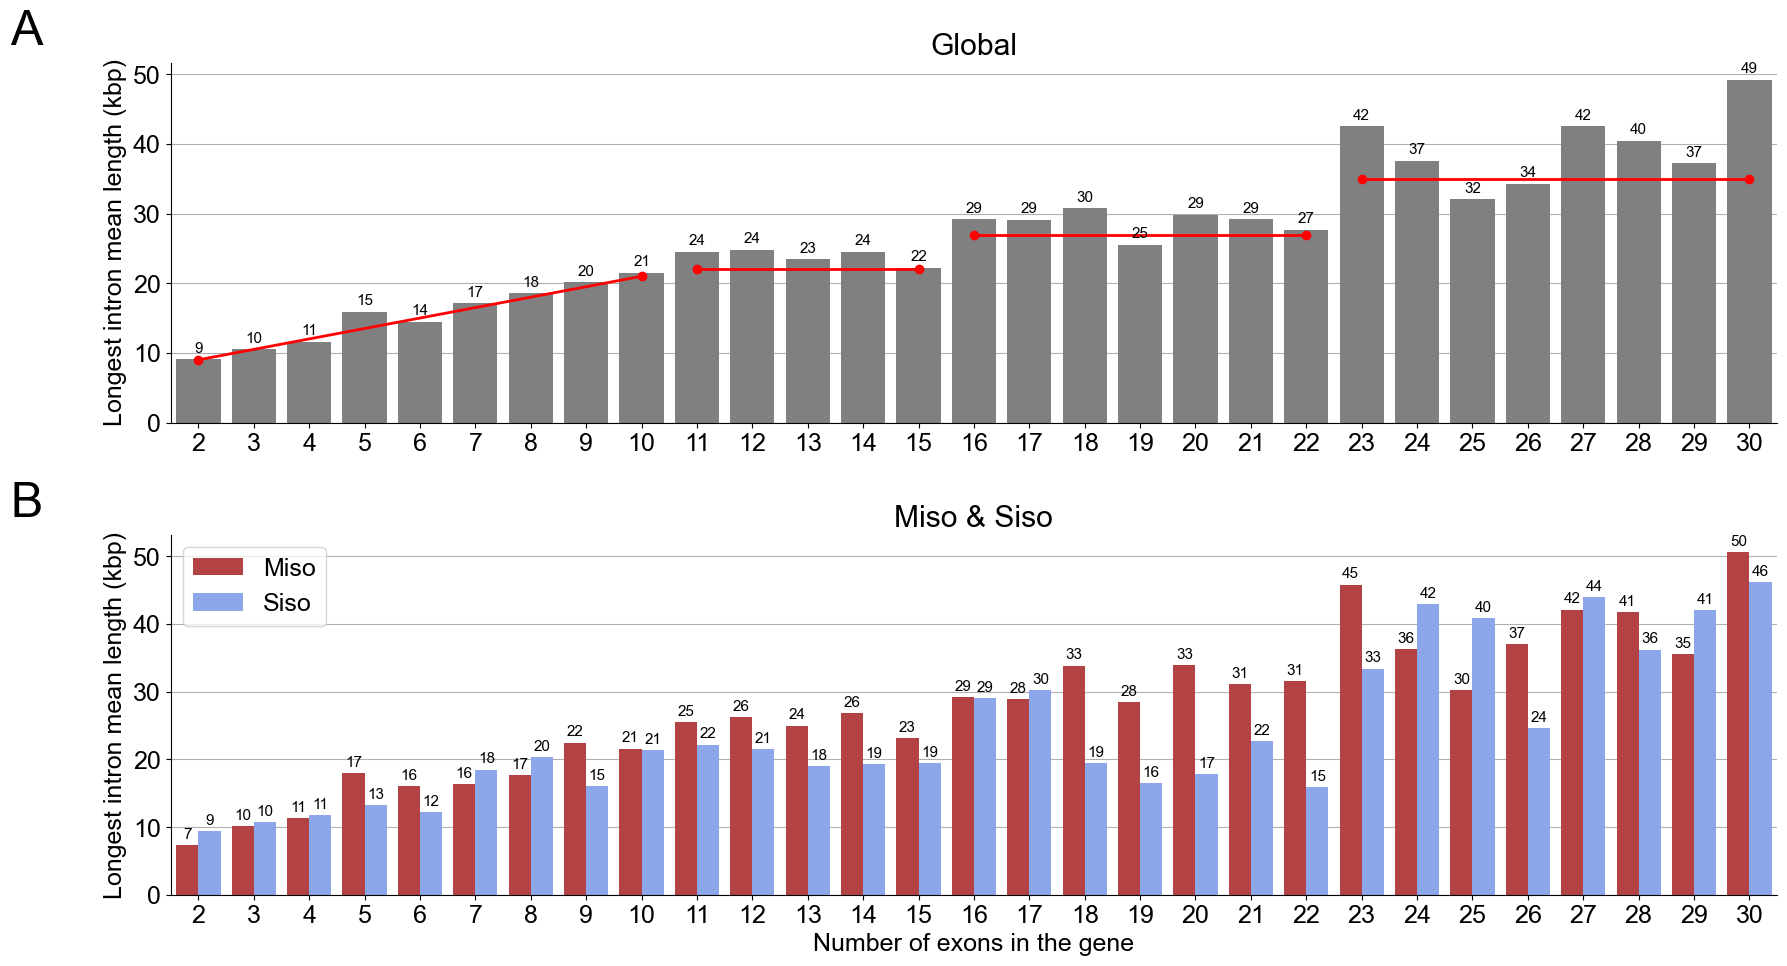

In [1800]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0, padding=1):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + padding
            if i == 0:
                value = "{:,}".format(int(p.get_height()))
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

f, ax = plt.subplots(nrows=2, figsize=(18,10))

sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby('CDS_count')['Intron_length_max'].mean().reset_index(), x='CDS_count', y='Intron_length_max', palette=['grey'], ax=ax[0])
ax[0].plot([0, 8], [9,21], color='red', lw=2, marker='o')
ax[0].plot([9,13], [22,22], color='red', lw=2, marker='o')
ax[0].plot([14, 20], [27,27], color='red', lw=2, marker='o')
ax[0].plot([21, 28], [35,35], color='red', lw=2, marker='o')

ax[0].spines['right'].set_linewidth(0)
ax[0].spines['top'].set_linewidth(0)
ax[0].set_ylabel('Longest intron mean length (kbp)')
ax[0].set_xlabel('')
ax[0].set_xlim(-0.5,28.5)
ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title('Global')

print(ax[0].get_xticks())
show_values_on_bars(ax[0], fontsize=11)


sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby(['Miso_siso', 'CDS_count'])['Intron_length_max'].mean().reset_index(), x='CDS_count', y='Intron_length_max', hue='Miso_siso', palette=palette, ax=ax[1])
ax[1].spines['right'].set_linewidth(0)
ax[1].spines['top'].set_linewidth(0)
ax[1].set_ylabel('Longest intron mean length (kbp)')
ax[1].set_xlabel('Number of exons in the gene')
ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].legend(title='')
ax[1].set_title('Miso & Siso')

show_values_on_bars(ax[1], fontsize=11)



i = 0
for n, sub_a in enumerate(ax):
    sub_a.text(-0.1, 1.05, string.ascii_uppercase[i], transform=sub_a.transAxes, size=35, weight='bold')
    i += 1 
plt.tight_layout()

In [1112]:
# t['CDS_count'] = t['CDS_count'].astype(int)
f = plt.figure(figsize=(15,10))
sns.barplot(data=t.loc[t['CDS_count'] <= 30].groupby('CDS_count')['Intron_length_max'].mean().reset_index(), x='CDS_count', y='Exon_length_max')

ValueError: Could not interpret input 'Exon_length_max'

<Figure size 1500x1000 with 0 Axes>

In [1039]:
t_plot = t.loc[t['Intron_length_max_index'] <= 20]
t_plot = t_plot.groupby(['Intron_length_max_index'])['Gene'].count().reset_index()
t_plot['Cumsum'] = t_plot['Gene'].cumsum() / t_plot['Gene'].sum()
t_plot['Ratio'] = t_plot['Gene'] / t_plot['Gene'].sum()
t_plot

Intron_length_max_index  Gene    Cumsum     Ratio
0                         1  5180  0.313086  0.313086
1                         2  2540  0.466606  0.153521
2                         3  1844  0.578060  0.111454
3                         4  1277  0.655243  0.077183
4                         5  1032  0.717619  0.062375
5                         6   811  0.766636  0.049018
6                         7   689  0.808280  0.041644
7                         8   551  0.841584  0.033303
8                         9   452  0.868903  0.027319
9                        10   375  0.891568  0.022665
10                       11   333  0.911695  0.020127
11                       12   273  0.928196  0.016500
12                       13   234  0.942339  0.014143
13                       14   200  0.954427  0.012088
14                       15   173  0.964884  0.010456
15                       16   136  0.973104  0.008220
16                       17   138  0.981445  0.008341
17                       18   115  0.988395  0.006951
18                       19   103  0.994621  0.006225
19                       20    89  1.000000  0.005379

In [1051]:
t_plot.groupby('Miso_siso')['Gene'].sum()

Miso_siso
Miso    10116
Siso     6429
Name: Gene, dtype: int64

In [1476]:
def process_groupby(r):
    s = r['Gene'].sum()
#     print(pd.Series([r['Gene'] / s]))
    r['R'] = 100 * (r['Gene'] / s)
    r['CS'] = r['R'].cumsum()
    return r

t_plot = t.loc[t['Intron_length_max_index'] <= 20]
t_plot = t_plot.groupby(["Miso_siso", 'Intron_length_max_index'])['Gene'].count().reset_index()
t_plot['Cumsum'] = t_plot.groupby('Miso_siso')['Gene'].cumsum()
t_plot = t_plot.groupby('Miso_siso').apply(process_groupby)
# t_plot['Ratio'] = t_plot['Gene'] / t_plot.groupby('Miso_siso')['Gene'].sum()
t_plot

Miso_siso  Intron_length_max_index  Gene  Cumsum          R          CS
0       Miso                        1  2736    2736  27.046263   27.046263
1       Miso                        2  1509    4245  14.916963   41.963227
2       Miso                        3  1175    5420  11.615263   53.578490
3       Miso                        4   835    6255   8.254251   61.832740
4       Miso                        5   666    6921   6.583630   68.416370
5       Miso                        6   534    7455   5.278766   73.695136
6       Miso                        7   463    7918   4.576908   78.272044
7       Miso                        8   345    8263   3.410439   81.682483
8       Miso                        9   321    8584   3.173191   84.855674
9       Miso                       10   271    8855   2.678924   87.534599
10      Miso                       11   237    9092   2.342823   89.877422
11      Miso                       12   184    9276   1.818901   91.696323
12      Miso                       13   163    9439   1.611309   93.307631
13      Miso                       14   145    9584   1.433373   94.741004
14      Miso                       15   130    9714   1.285093   96.026097
15      Miso                       16    92    9806   0.909450   96.935548
16      Miso                       17   101    9907   0.998418   97.933966
17      Miso                       18    76    9983   0.751285   98.685251
18      Miso                       19    67   10050   0.662317   99.347568
19      Miso                       20    66   10116   0.652432  100.000000
20      Siso                        1  2444    2444  38.015243   38.015243
21      Siso                        2  1031    3475  16.036709   54.051952
22      Siso                        3   669    4144  10.405973   64.457925
23      Siso                        4   442    4586   6.875097   71.333022
24      Siso                        5   366    4952   5.692954   77.025976
25      Siso                        6   277    5229   4.308602   81.334578
26      Siso                        7   226    5455   3.515321   84.849899
27      Siso                        8   206    5661   3.204231   88.054130
28      Siso                        9   131    5792   2.037642   90.091772
29      Siso                       10   104    5896   1.617670   91.709442
30      Siso                       11    96    5992   1.493234   93.202675
31      Siso                       12    89    6081   1.384352   94.587028
32      Siso                       13    71    6152   1.104371   95.691398
33      Siso                       14    55    6207   0.855499   96.546897
34      Siso                       15    43    6250   0.668844   97.215741
35      Siso                       16    44    6294   0.684399   97.900140
36      Siso                       17    37    6331   0.575517   98.475657
37      Siso                       18    39    6370   0.606626   99.082283
38      Siso                       19    36    6406   0.559963   99.642246
39      Siso                       20    23    6429   0.357754  100.000000

In [1313]:
refseq_wt_variable_drop_duplicates

Gene Exon_type             ranges                 mRNA_exons  \
0       A1BG       CDS  58864770-58864803                [NM_130786]   
1       A1BG       CDS  58864658-58864693                [NM_130786]   
2       A1BG       CDS  58864294-58864563                [NM_130786]   
3       A1BG       CDS  58863649-58863921                [NM_130786]   
4       A1BG       CDS  58862757-58863053                [NM_130786]   
...      ...       ...                ...                        ...   
205622  ZZZ3       CDS  78044459-78044554  [NM_001308237, NM_015534]   
205623  ZZZ3       CDS  78041753-78041905  [NM_001308237, NM_015534]   
205624  ZZZ3       CDS  78034017-78034151  [NM_001308237, NM_015534]   
205625  ZZZ3       CDS  78031766-78031866  [NM_001308237, NM_015534]   
205626  ZZZ3       CDS  78031325-78031469  [NM_001308237, NM_015534]   

       Exon_start Exon_stop  Length  Strand  mRNA_exons_nb  \
0        58864770  58864803      33       0              1   
1        58864658  58864693      35       0              1   
2        58864294  58864563     269       0              1   
3        58863649  58863921     272       0              1   
4        58862757  58863053     296       0              1   
...           ...       ...     ...     ...            ...   
205622   78044459  78044554      95       0              2   
205623   78041753  78041905     152       0              2   
205624   78034017  78034151     134       0              2   
205625   78031766  78031866     100       0              2   
205626   78031325  78031469     144       0              2   

                        mRNA_gene  ...  Ratio_num Const_Alt  Share CDS_count  \
0                     [NM_130786]  ...        1.0     Const  False         8   
1                     [NM_130786]  ...        1.0     Const  False         8   
2                     [NM_130786]  ...        1.0     Const  False         8   
3                     [NM_130786]  ...        1.0     Const  False         8   
4                     [NM_130786]  ...        1.0     Const  False         8   
...                           ...  ...        ...       ...    ...       ...   
205622  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205623  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205624  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205625  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   
205626  [NM_015534, NM_001308237]  ...        1.0     Const  False        12   

        ranges_without_variable  Exon_start_raw Exon_stop_raw  Length_raw  \
0             58864770-58864803        58864770      58864803          33   
1             58864658-58864693        58864658      58864693          35   
2             58864294-58864563        58864294      58864563         269   
3             58863649-58863921        58863649      58863921         272   
4             58862757-58863053        58862757      58863053         296   
...                         ...             ...           ...         ...   
205622        78044459-78044554        78044459      78044554          95   
205623        78041753-78041905        78041753      78041905         152   
205624        78034017-78034151        78034017      78034151         134   
205625        78031766-78031866        78031766      78031866         100   
205626        78031325-78031469        78031325      78031469         144   

        Miso_siso  Exon_nb  
0            Siso        1  
1            Siso        2  
2            Siso        3  
3            Siso        4  
4            Siso        5  
...           ...      ...  
205622       Miso        8  
205623       Miso        9  
205624       Miso       10  
205625       Miso       11  
205626       Miso       12  

[205627 rows x 22 columns]

In [1316]:
t_plot = t.loc[t['Intron_length_max_index'] <= 20]
# t_plot = t_plot.groupby(['Intron_length_max_index'])['Gene'].count().reset_index()
# t_plot = pd.merge(t_plot, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].drop_duplicates(), on='Gene')

t_plot
# t_plot = t_plot.groupby(['Gene_size_type', 'Intron_length_max_index'])['Gene'].count().reset_index()

Gene  Length Miso_siso  Intron_length_max  Intron_length_max_index  \
0       SAMD11  18.843      Siso              4.681                        3   
1        NOC2L  15.053      Siso              2.522                        7   
2       KLHL17   5.135      Siso              0.491                        1   
3      PLEKHN1   9.383      Miso              3.472                        2   
4        PERM1   6.895      Miso              2.255                        2   
...        ...     ...       ...                ...                      ...   
17274    BPY2B  21.203      Siso              2.853                        2   
17275     DAZ3  50.423      Siso              9.714                        3   
17276     DAZ4  73.220      Miso             14.472                       18   
17277    BPY2C  21.203      Siso              2.853                        2   
17278     CDY1   2.785      Miso              0.388                        1   

       mRNA_gene_nb  CDS_count  Strand  Exon_length_max  Intron_length_norm  
0                 1         13       1              499            0.248421  
1                 1         19       0              188            0.167541  
2                 1         12       1              259            0.095618  
3                 3         17       1              218            0.370031  
4                 4          6       0             2148            0.327049  
...             ...        ...     ...              ...                 ...  
17274             1          4       1              117            0.134556  
17275             1         18       0              146            0.192650  
17276             2         22       1              146            0.197651  
17277             1          4       0              117            0.134556  
17278             2          3       1             1622            0.139318  

[16545 rows x 10 columns]

Rectangle(xy=(-0.4, 0), width=0.8, height=5180, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=2540, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=1844, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=1277, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=1032, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=811, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=689, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=551, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=452, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=375, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=333, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=273, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=234, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=200, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=173, angle=0)
Rectangle(xy=(14.6, 0), width=0.8, height=136, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=138, angle=0)
Rectangle(xy=(16.6, 0), width=0.8, height=115, angle=

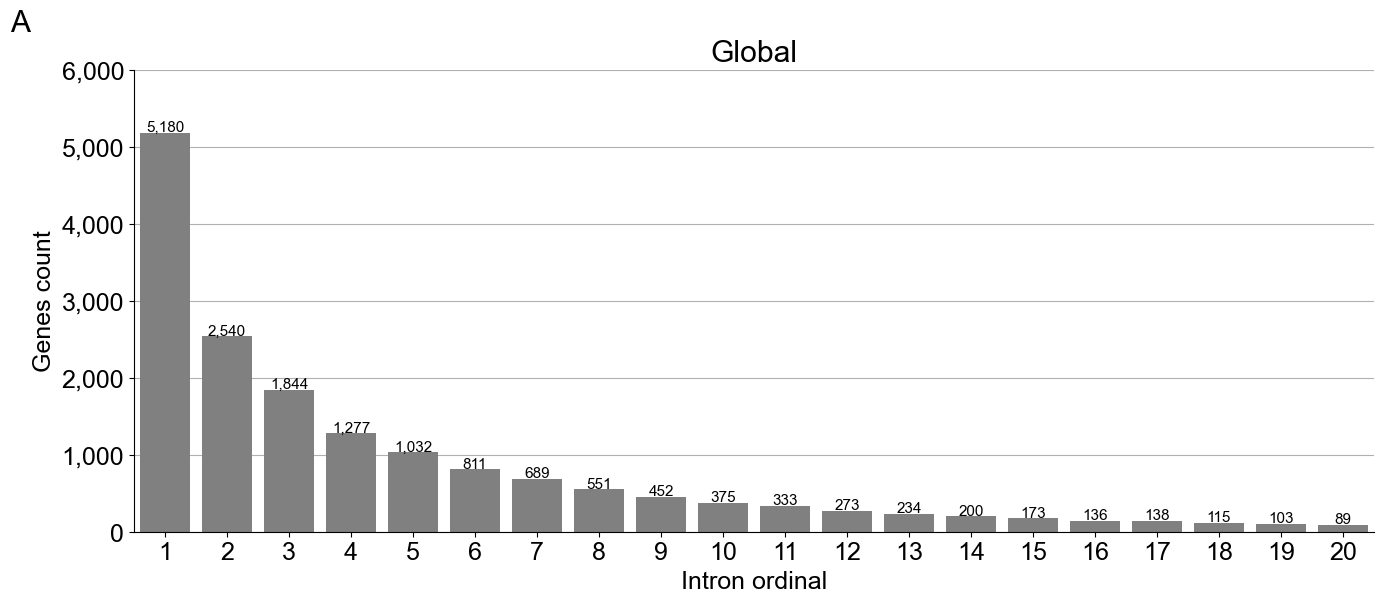

In [1818]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 20
            if i == 0:
                value = "{:,}".format(int(p.get_height()))
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.rcParams.update({'font.size' : 18})
f, ax = plt.subplots(figsize=(16,6))
t_plot = t.loc[t['Intron_length_max_index'] <= 20]
t_plot['Gene_size_type'] = pd.cut(t_plot['CDS_count'], [0,14,21,max(t_plot['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t_plot = t_plot.groupby(['Intron_length_max_index'])['Gene'].count().reset_index()

sns.barplot(data=t_plot, x='Intron_length_max_index', y='Gene',  palette=['grey'])
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Intron ordinal')
ax.set_ylabel('Genes count')
ax.set_ylim(0,6e3)
ax.set_title('Global')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.text(-2.5, 6500, 'A', size='large', weight='bold')
show_values_on_bars(ax, fontsize=11)
# ax.legend(title='')

In [1288]:
t_plot

Intron_length_max_index  Gene
0                         1  5180
1                         2  2540
2                         3  1844
3                         4  1277
4                         5  1032
5                         6   811
6                         7   689
7                         8   551
8                         9   452
9                        10   375
10                       11   333
11                       12   273
12                       13   234
13                       14   200
14                       15   173
15                       16   136
16                       17   138
17                       18   115
18                       19   103
19                       20    89

In [1817]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 20
            if i == 0:
                value = "{:,}".format(int(p.get_height()))
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.rcParams.update({'font.size' : 18})
f, ax = plt.subplots(figsize=(16,6))
t_plot = t.loc[t['Intron_length_max_index'] <= 20]
t_plot = t_plot.groupby(["Miso_siso", 'Intron_length_max_index'])['Gene'].count().reset_index()
sns.barplot(data=t_plot, x='Intron_length_max_index', y='Gene', hue='Miso_siso', palette=palette)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Intron ordinal')
ax.set_ylabel('Genes count')
ax.set_ylim(0,3e3)
ax.set_title('Miso & Siso')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(title='')
ax.text(-2.5, 3200, 'B', size='large', weight='bold')

show_values_on_bars(ax, fontsize=9)
# ax.legend(title='')

Rectangle(xy=(-0.4, 0), width=0.4, height=2736, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=1509, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=1175, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=835, angle=0)
Rectangle(xy=(3.6, 0), width=0.4, height=666, angle=0)
Rectangle(xy=(4.6, 0), width=0.4, height=534, angle=0)
Rectangle(xy=(5.6, 0), width=0.4, height=463, angle=0)
Rectangle(xy=(6.6, 0), width=0.4, height=345, angle=0)
Rectangle(xy=(7.6, 0), width=0.4, height=321, angle=0)
Rectangle(xy=(8.6, 0), width=0.4, height=271, angle=0)
Rectangle(xy=(9.6, 0), width=0.4, height=237, angle=0)
Rectangle(xy=(10.6, 0), width=0.4, height=184, angle=0)
Rectangle(xy=(11.6, 0), width=0.4, height=163, angle=0)
Rectangle(xy=(12.6, 0), width=0.4, height=145, angle=0)
Rectangle(xy=(13.6, 0), width=0.4, height=130, angle=0)
Rectangle(xy=(14.6, 0), width=0.4, height=92, angle=0)
Rectangle(xy=(15.6, 0), width=0.4, height=101, angle=0)
Rectangle(xy=(16.6, 0), width=0.4, height=76, angle=0)
R

In [1099]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 20
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.rcParams.update({'font.size' : 18})
f, ax = plt.subplots(figsize=(20,6))
t_plot = t.loc[t['Intron_length_max_index'] <= 20]
t_plot = t_plot.groupby(['Miso_siso', 'Intron_length_max_index'])['Gene'].count().reset_index()
sns.barplot(data=t_plot, x='Intron_length_max_index', y='Gene', hue='Miso_siso', palette=palette)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Intron ordinal')
ax.set_ylabel('Genes count')
ax.set_ylim(0,3000)
ax.set_title('Genes count where intron ordinal x is the largest')
ax.set_axisbelow(True)
ax.grid(axis='y')
show_values_on_bars(ax, fontsize=11)
ax.legend(title='')

KeyError: 'Intron_length_max_index'

Rectangle(xy=(-0.4, 0), width=0.4, height=2736, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=1509, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=1175, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=835, angle=0)
Rectangle(xy=(3.6, 0), width=0.4, height=666, angle=0)
Rectangle(xy=(4.6, 0), width=0.4, height=534, angle=0)
Rectangle(xy=(5.6, 0), width=0.4, height=463, angle=0)
Rectangle(xy=(6.6, 0), width=0.4, height=345, angle=0)
Rectangle(xy=(7.6, 0), width=0.4, height=321, angle=0)
Rectangle(xy=(8.6, 0), width=0.4, height=271, angle=0)
Rectangle(xy=(9.6, 0), width=0.4, height=237, angle=0)
Rectangle(xy=(10.6, 0), width=0.4, height=184, angle=0)
Rectangle(xy=(11.6, 0), width=0.4, height=163, angle=0)
Rectangle(xy=(12.6, 0), width=0.4, height=145, angle=0)
Rectangle(xy=(13.6, 0), width=0.4, height=130, angle=0)
Rectangle(xy=(14.6, 0), width=0.4, height=92, angle=0)
Rectangle(xy=(15.6, 0), width=0.4, height=101, angle=0)
Rectangle(xy=(16.6, 0), width=0.4, height=76, angle=0)
R

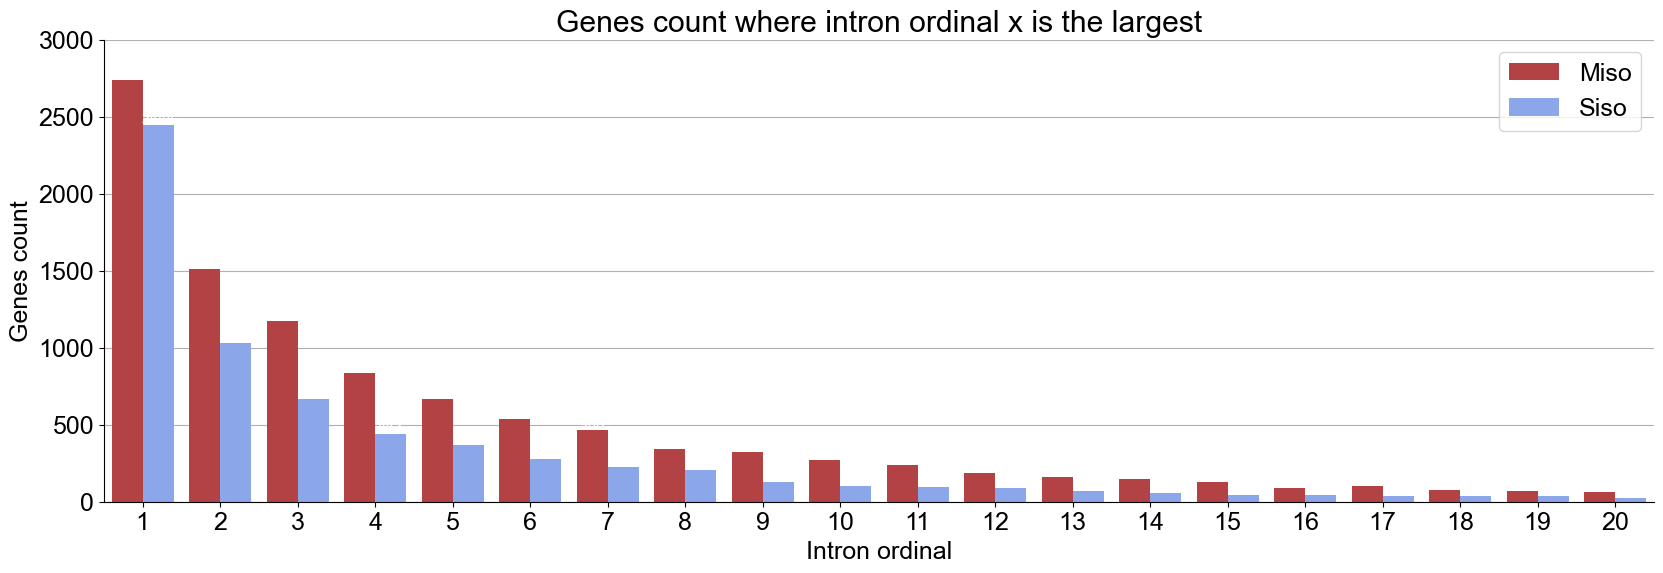

In [1091]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 20
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='white')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.rcParams.update({'font.size' : 18})
f, ax = plt.subplots(figsize=(20,6))
t_plot = t.loc[t['Intron_nb'] <= 20]
t_plot = t_plot.groupby(['Miso_siso', 'Intron_length_max_index'])['Gene'].count().reset_index()
sns.barplot(data=t_plot, x='Intron_length_max_index', y='Gene', hue='Miso_siso', palette=palette)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Intron ordinal')
ax.set_ylabel('Genes count')
ax.set_ylim(0,3000)
ax.set_title('Genes count where intron ordinal x is the largest')
ax.set_axisbelow(True)
ax.grid(axis='y')
show_values_on_bars(ax, fontsize=11)
ax.legend(title='')

In [1422]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])])
print(t.groupby('Gene_size_type')['Gene'].nunique())
print(t.loc[t['Miso_siso'] == 'Miso'].groupby('Gene_size_type')['Gene'].nunique())
print(t.loc[t['Miso_siso'] == 'Siso'].groupby('Gene_size_type')['Gene'].nunique())
t.groupby('Gene_size_type')['CDS_count'].unique().apply(lambda r: sorted(r))


Gene_size_type
(0, 10]      9610
(10, 15]     3300
(15, 22]     2322
(22, 363]    2047
Name: Gene, dtype: int64
Gene_size_type
(0, 10]      4972
(10, 15]     2363
(15, 22]     1786
(22, 363]    1478
Name: Gene, dtype: int64
Gene_size_type
(0, 10]      4638
(10, 15]      937
(15, 22]      536
(22, 363]     569
Name: Gene, dtype: int64


Gene_size_type
(0, 10]                           [2, 3, 4, 5, 6, 7, 8, 9, 10]
(10, 15]                                  [11, 12, 13, 14, 15]
(15, 22]                          [16, 17, 18, 19, 20, 21, 22]
(22, 363]    [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...
Name: CDS_count, dtype: object

In [1480]:
t

Gene  Length Miso_siso  Intron_length_max  Intron_length_max_index  \
0       SAMD11  18.843      Siso              4.681                        3   
1        NOC2L  15.053      Siso              2.522                        7   
2       KLHL17   5.135      Siso              0.491                        1   
3      PLEKHN1   9.383      Miso              3.472                        2   
4        PERM1   6.895      Miso              2.255                        2   
...        ...     ...       ...                ...                      ...   
17274    BPY2B  21.203      Siso              2.853                        2   
17275     DAZ3  50.423      Siso              9.714                        3   
17276     DAZ4  73.220      Miso             14.472                       18   
17277    BPY2C  21.203      Siso              2.853                        2   
17278     CDY1   2.785      Miso              0.388                        1   

       mRNA_gene_nb  CDS_count  Strand  Exon_length_max  Intron_length_norm  
0                 1         13       1              499            0.248421  
1                 1         19       0              188            0.167541  
2                 1         12       1              259            0.095618  
3                 3         17       1              218            0.370031  
4                 4          6       0             2148            0.327049  
...             ...        ...     ...              ...                 ...  
17274             1          4       1              117            0.134556  
17275             1         18       0              146            0.192650  
17276             2         22       1              146            0.197651  
17277             1          4       0              117            0.134556  
17278             2          3       1             1622            0.139318  

[17279 rows x 10 columns]

In [1543]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
f = plt.figure(figsize=(15,10))
sns.boxplot(data=tmp.loc[tmp['Exon_nb'] <= 30], x='Exon_nb', y='Length', showfliers=False, palette=['grey'])
plt.ylim(0,600)

(0.0, 600.0)

(0.0, 600.0)

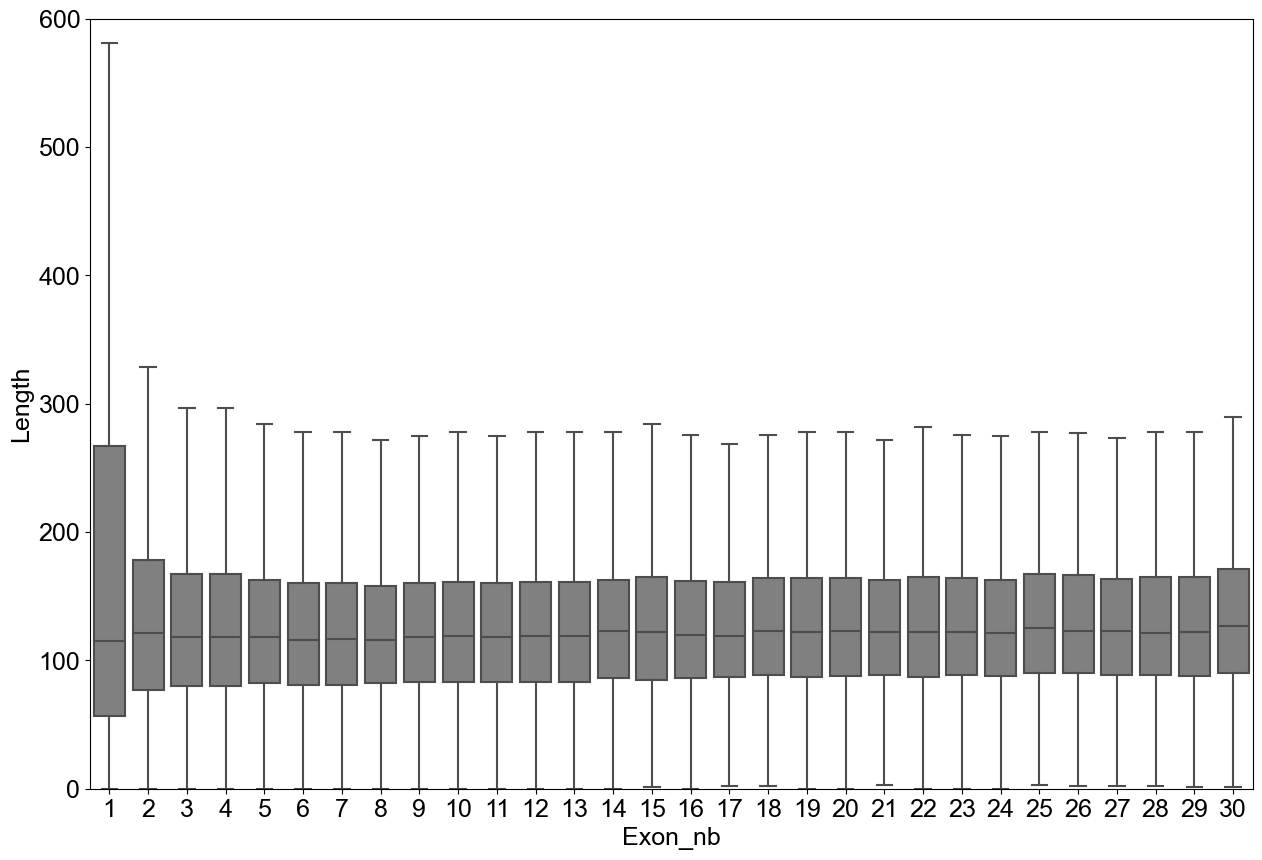

In [1543]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
f = plt.figure(figsize=(15,10))
sns.boxplot(data=tmp.loc[tmp['Exon_nb'] <= 30], x='Exon_nb', y='Length', showfliers=False, palette=['grey'])
plt.ylim(0,600)

In [1643]:
means[cat].values + 0.1

array([384.88480105, 218.010546  , 181.67035903, 195.9480695 ,
       157.88117965, 153.2733572 , 149.94473684, 153.78770764,
       151.91988743, 155.2701209 , 159.52311459, 153.46833333,
       153.29014529, 150.14378531, 154.40682731, 152.21764706,
       161.24029851, 149.89135135, 148.21806375, 163.20340314,
       144.9090379 , 145.47101911, 161.26168717, 150.14313725,
       152.29444444, 166.77346939, 145.82616137, 140.74285714,
       141.15413105, 158.24769231])

In [1673]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp = tmp.sort_values(by=['Miso_siso'])
tmp




f, ax = plt.subplots(nrows=2, figsize=(20,15))


sns.boxplot(data=tmp.loc[tmp['Exon_nb'] <= 30], x='Exon_nb', y='Length_raw', showfliers=False, palette=['grey'], showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"}, ax=ax[0])
plt.ylim(0,600)
handles, labels = ax[0].get_legend_handles_labels()

ax[0].spines['right'].set_linewidth(0)
ax[0].spines['top'].set_linewidth(0)
ax[0].set_xlabel('')
ax[0].set_ylabel('Exon length (bp)')
ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title('Global')

ax[0].legend().remove()

means = tmp.loc[tmp['Exon_nb'] <= 30].groupby(['Exon_nb'])['Length_raw'].mean()
vertical_offset = tmp['Length_raw'].median() * 0.22 # offset from median for display

ax[0].plot(np.array(range(0,30)), means.values, color='black', lw=3)

    
    

sns.boxplot(data=tmp.loc[tmp['Exon_nb'] <= 30], x='Exon_nb', y='Length_raw', hue='Miso_siso', showfliers=False, palette=palette, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"}, ax=ax[1])
plt.ylim(0,600)
handles, labels = ax[1].get_legend_handles_labels()
ax[1].spines['right'].set_linewidth(0)
ax[1].spines['top'].set_linewidth(0)
ax[1].set_xlabel('Exon ordinal position')
ax[1].set_ylabel('Exon length (bp)')
ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].set_title('Miso & Siso')

ax[1].legend(handles=handles + [
    matplotlib.lines.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='grey', markeredgecolor='black', markersize=15),
    matplotlib.lines.Line2D([0], [0], color='black', lw=1)
],  
          labels=labels + ['Mean', "Median"], title='', ncol=2)

medians = tmp.loc[tmp['Exon_nb'] <= 30].groupby(['Miso_siso', 'Exon_nb'])['Length_raw'].median()
means = tmp.loc[tmp['Exon_nb'] <= 30].groupby(['Miso_siso', 'Exon_nb'])['Length_raw'].mean()
vertical_offset = tmp['Length_raw'].median() * 0.22 # offset from median for display
x_cat = tmp.Miso_siso.unique().tolist()

for cat, x_shift in zip(sorted(t.Miso_siso.unique()), [-0.18,+0.22]):
    ax[1].plot(np.array(range(0,30)) + x_shift, means[cat].values, color=palette[cat], lw=3)

# for j, xtick in enumerate(ax[1].get_xticks()):
#     for cat, x_shift in zip(sorted(t.Miso_siso.unique()), [-0.18,+0.22]):
#         ax[1].text(xtick + x_shift, medians[cat][xtick+1] - vertical_offset, int(medians[cat][xtick+1]), 
#                 horizontalalignment='center',size='x-small',color='w',weight='semibold', rotation=90)

i = 0
for n, sub_a in enumerate(ax):
    sub_a.text(-0.05, 1.05, string.ascii_uppercase[i], transform=sub_a.transAxes, size=35, weight='bold')
    i += 1 

No handles with labels found to put in legend.


In [1511]:
t
# tmp = refseq_wt_variable_drop_duplicates.copy()
# tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
# tmp
# f = plt.figure(figsize=(15,10))
# sns.barplot(data=tmp.loc[tmp['Exon_nb'] < 30], x='Exon_nb', y='Length', hue='Gene_size_type')

Gene  Length                                       Exons_ranges  \
0       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
1       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
2       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
3       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
4       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
...        ...     ...                                                ...   
180238    DAZ4  73.220  [26980274-26980276, 26986878-26987024, 2698729...   
180239   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180240   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180241   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180242    CDY1   2.785             [27768590-27770212, 27770602-27770674]   

        Strand Miso_siso                                     Introns_ranges  \
0            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
1            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
2            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
3            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
4            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
...        ...       ...                                                ...   
180238       1      Miso  [26980277-26986877, 26987025-26987298, 2698739...   
180239       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180240       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180241       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180242       1      Miso                                [27770213-27770601]   

        Introns_lengths  Intron_nb  mRNA_gene_nb  CDS_count  
0                 4.140          1             1         13  
1                 0.701          2             1         13  
2                 4.681          3             1         13  
3                 3.142          4             1         13  
4                 0.144          5             1         13  
...                 ...        ...           ...        ...  
180238            4.571         21             2         22  
180239            0.691          1             1          4  
180240            2.853          2             1          4  
180241            2.058          3             1          4  
180242            0.388          1             2          3  

[180243 rows x 10 columns]

In [1564]:
len(t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])]['Intron_nb'].values)

168401

In [1563]:
len(t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])].groupby('Intron_nb')['Introns_lengths'].apply(np.array).values)

29

{'whiskers': [<matplotlib.lines.Line2D at 0x7efb6f735610>,
 'caps': [<matplotlib.lines.Line2D at 0x7efb6f73c0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efb6f7aafd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7efb6f73cb90>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7efb6f744110>,
  <matplotlib.lines.Line2D at 0x7efb6f565550>]}

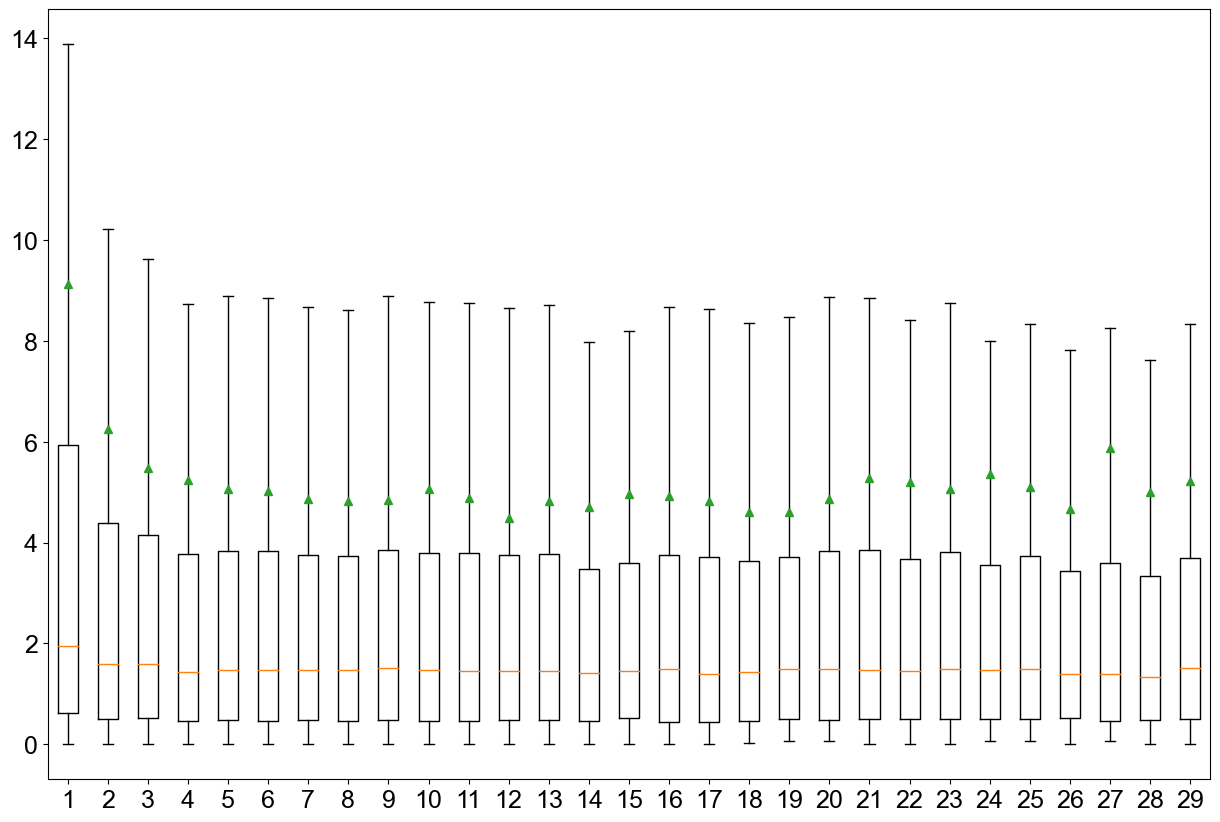

In [1567]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,5,10,15,20,25,max(t['CDS_count'])])
tmp
f = plt.figure(figsize=(15,10))
# sns.boxplot(data=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])], x='Intron_nb', y='Introns_lengths', palette=['grey'], showfliers=False)
plt.boxplot(t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])].groupby('Intron_nb')['Introns_lengths'].apply(np.array).values, positions=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])]['Intron_nb'].unique(), showfliers=False, showmeans=True)

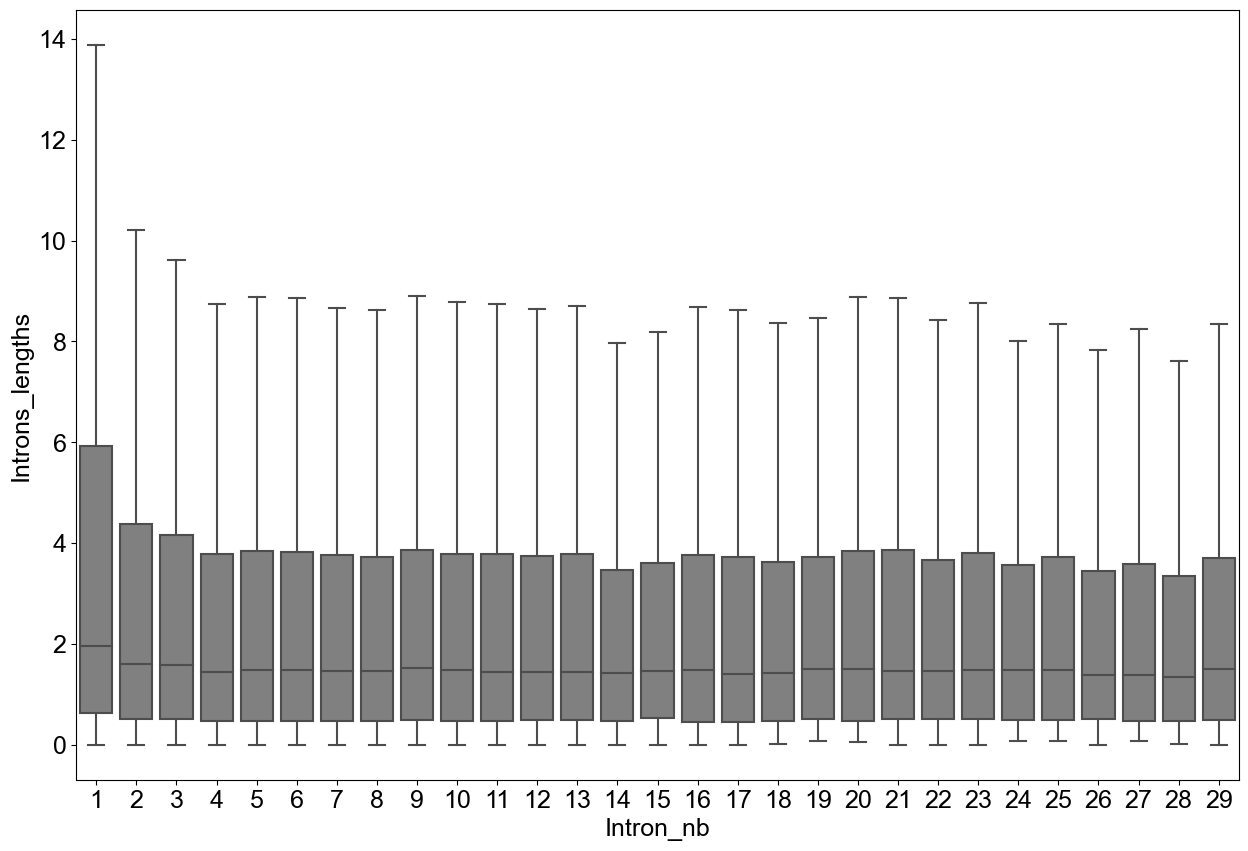

In [1554]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,5,10,15,20,25,max(t['CDS_count'])])
tmp
f = plt.figure(figsize=(15,10))
sns.boxplot(data=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])], x='Intron_nb', y='Introns_lengths', palette=['grey'], showfliers=False)

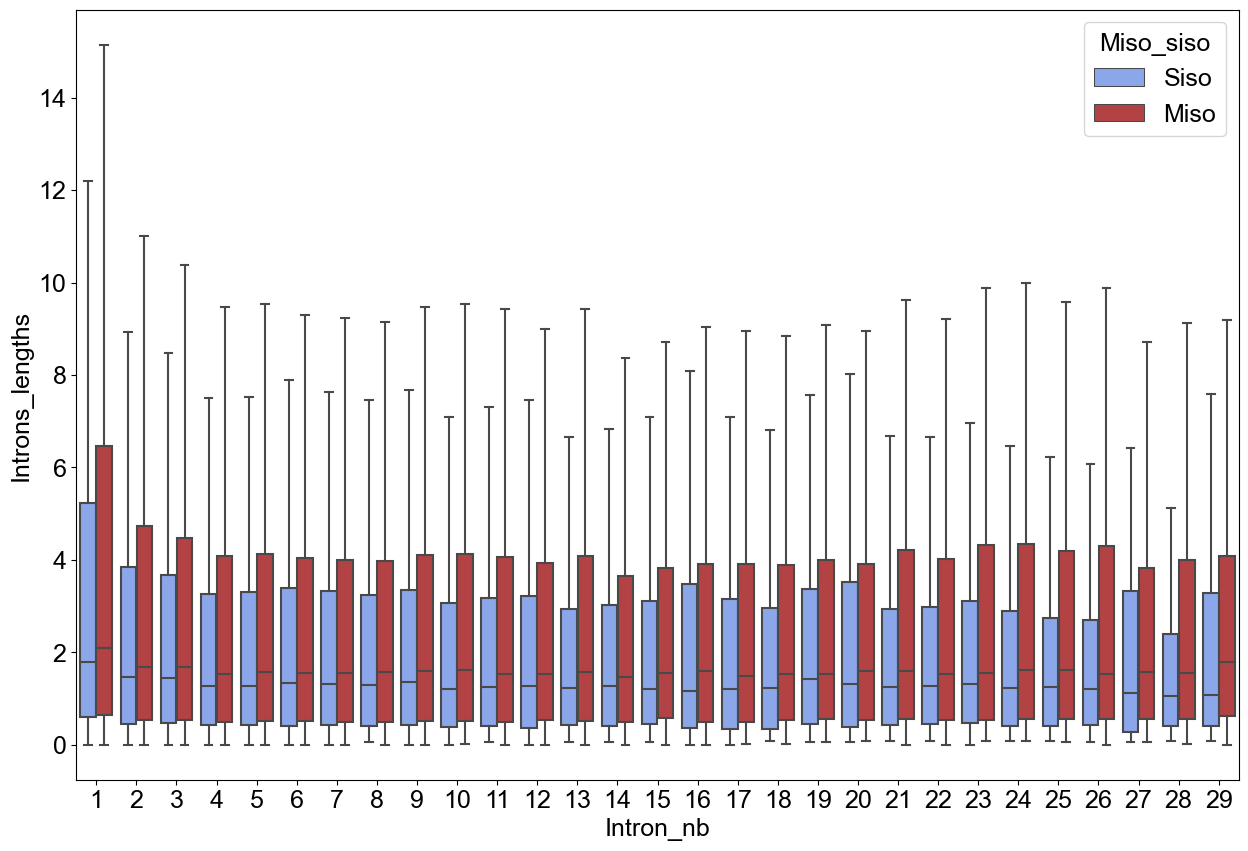

In [1555]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,5,10,15,20,25,max(t['CDS_count'])])
tmp
f = plt.figure(figsize=(15,10))
sns.boxplot(data=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])], x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, showfliers=False)

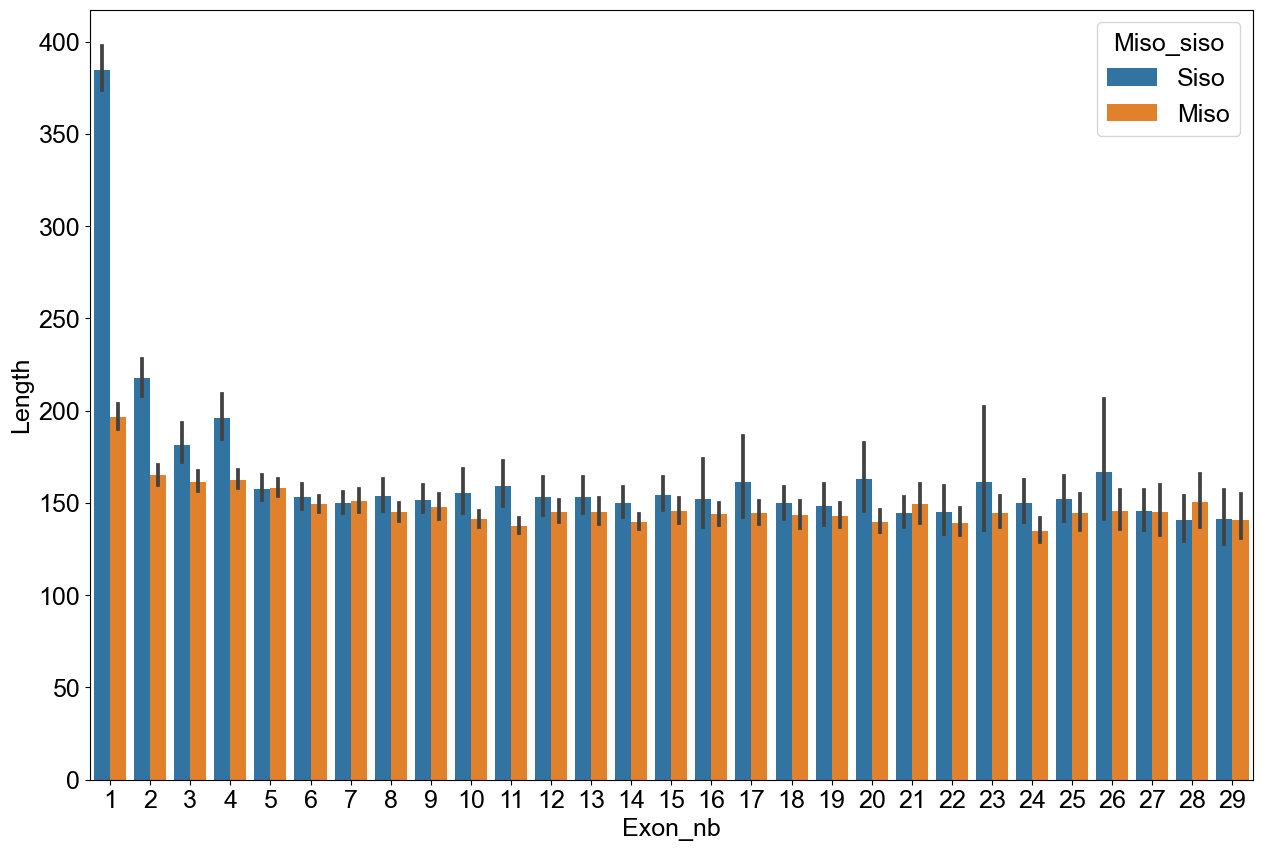

In [1489]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
f = plt.figure(figsize=(15,10))
sns.barplot(data=tmp.loc[tmp['Exon_nb'] < 30], x='Exon_nb', y='Length', hue='Miso_siso')

In [1837]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
t
# sns.barplot(data=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])], x='Intron_nb', y='Introns_lengths', hue='Gene_size_type')
# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] < 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'), row='Gene_size_type', aspect=4, height=5, sharey=True)
g.map_dataframe(sns.boxplot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"} )
for ax in g.axes.ravel():
#     ax.set_ylim(0,1000)
    ax.legend()
# plt.ylim(0,500)

KeyError: 'Intron_nb'

In [1694]:
tmp.loc[(tmp['Exon_nb'] <= 5) & (tmp['Gene_size_type'] == 'Small')].sort_values(by='Miso_siso').groupby(['Miso_siso', 'Exon_nb']).mean()

Length    Strand  mRNA_exons_nb  mRNA_gene_nb  \
Miso_siso Exon_nb                                                      
Miso      1        252.032957  0.501883       2.551977      3.367232   
          2        199.747501  0.499400       2.388844      3.363255   
          3        191.622834  0.499478       2.508453      3.374870   
          4        206.070650  0.501136       2.624716      3.399364   
          5        200.472771  0.498131       2.725841      3.473572   
Siso      1        450.199305  0.498815       1.000000      1.000000   
          2        241.860435  0.497308       1.000000      1.000000   
          3        194.126988  0.500913       1.000000      1.000000   
          4        230.111536  0.495857       1.000000      1.000000   
          5        177.706667  0.492917       1.000000      1.000000   

                   Ratio_num     Share  CDS_count  Exon_start_raw  \
Miso_siso Exon_nb                                                   
Miso      1         0.802912  0.050471   6.289454    7.424271e+07   
          2         0.757387  0.141543   6.613155    7.402245e+07   
          3         0.779101  0.119182   6.801294    7.390613e+07   
          4         0.808868  0.108360   7.099273    7.413358e+07   
          5         0.819190  0.091030   7.555793    7.397807e+07   
Siso      1         1.000000  0.000000   4.023234    7.215220e+07   
          2         1.000000  0.000000   5.119750    7.168666e+07   
          3         1.000000  0.000000   5.777053    7.165522e+07   
          4         1.000000  0.000000   6.393881    7.209034e+07   
          5         1.000000  0.000000   7.130000    7.200655e+07   

                   Exon_stop_raw  Length_raw  
Miso_siso Exon_nb                             
Miso      1         7.424297e+07  258.048023  
          2         7.402266e+07  209.684926  
          3         7.390633e+07  201.706324  
          4         7.413379e+07  214.239437  
          5         7.397828e+07  205.759477  
Siso      1         7.215265e+07  450.199305  
          2         7.168690e+07  241.860435  
          3         7.165541e+07  194.126988  
          4         7.209057e+07  230.111536  
          5         7.200673e+07  177.706667

Text(0.5, 1.0, 'Exon length distribution for small genes (<= 10 exons)')

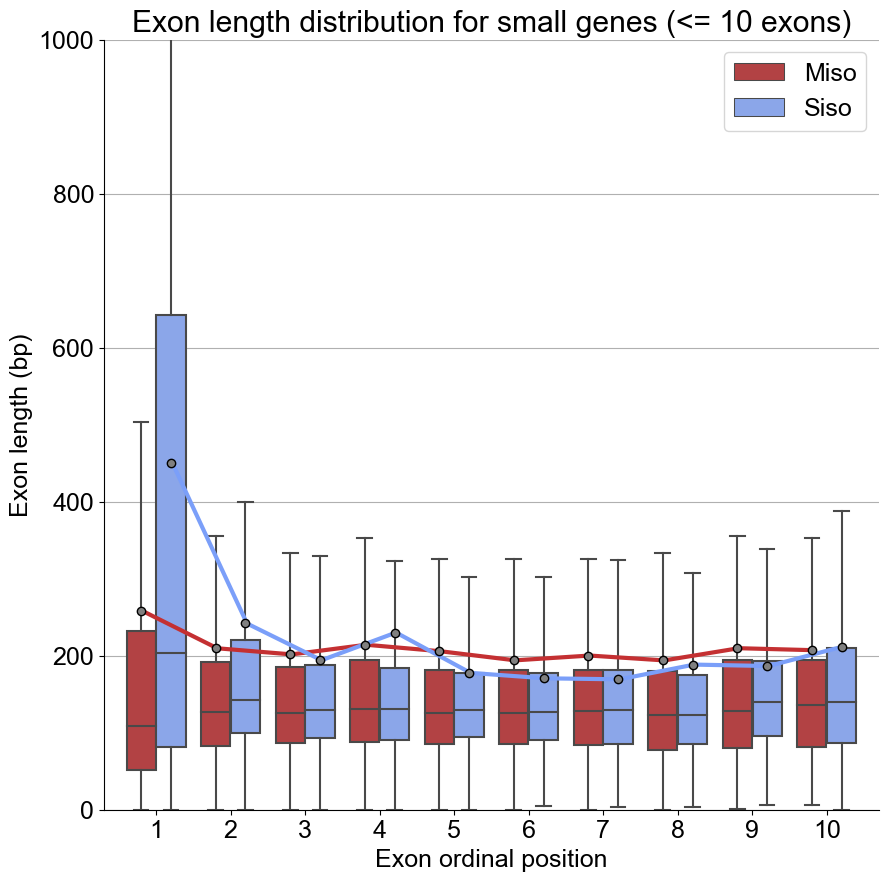

In [1768]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp

means = tmp.loc[(tmp['Exon_nb'] <= 10) & (tmp['Gene_size_type'] == 'Small')].sort_values(by='Miso_siso').groupby(['Miso_siso', 'Exon_nb'])['Length_raw'].mean()

f, ax= plt.subplots(figsize=(10,10))

sns.boxplot(data=tmp.loc[(tmp['Exon_nb'] <= 10) & (tmp['Gene_size_type'] == 'Small')].sort_values(by='Miso_siso'), x='Exon_nb', y='Length_raw', hue='Miso_siso', palette=palette, showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"}, ax=ax)
for cat, x_shift in zip(sorted(tmp.Miso_siso.unique()), [-0.18,+0.22]):
    plt.plot(np.array(range(0,10))  + x_shift, means[cat].values, color=palette[cat], lw=3)
ax.set_ylim(0,1000)
ax.legend(title='')
ax.grid(axis='y')
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_axisbelow(True)
ax.set_xlabel('Exon ordinal position')
ax.set_ylabel('Exon length (bp)')
ax.set_title('Exon length distribution for small genes (<= 10 exons)')


In [1853]:
def test_intron_nb(df):
#     print(df)
#     print(list(range(1, df.shape[0] + 1)))
    df['Intron_nb'] = list(range(1, df.shape[0] + 1))
#     print(df)
    return df

t = pd.merge(genes[['Gene', 'Length']], refseq_introns_plot, on='Gene')

t = t.groupby('Gene').progress_apply(test_intron_nb)
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')

# t[['Gene', 'Length', 'Miso_siso', 'Introns_lengths', "Intron_nb"]].to_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet', index=False)
t = t.sort_values(by='Miso_siso')
t

100%|██████████| 17279/17279 [00:17<00:00, 1001.99it/s]


Gene  Length                                       Exons_ranges  \
180242    CDY1    2785             [27768590-27770212, 27770602-27770674]   
87209     PKN3   18413  [131465195-131465218, 131467582-131467822, 131...   
87208     PKN3   18413  [131465195-131465218, 131467582-131467822, 131...   
87207     PKN3   18413  [131465195-131465218, 131467582-131467822, 131...   
87206     PKN3   18413  [131465195-131465218, 131467582-131467822, 131...   
...        ...     ...                                                ...   
92714    ZMIZ1  247553  [80961390-80961449, 80968093-80968206, 8097592...   
92713    ZMIZ1  247553  [80961390-80961449, 80968093-80968206, 8097592...   
92712    ZMIZ1  247553  [80961390-80961449, 80968093-80968206, 8097592...   
92720     PPIF    7865  [81107305-81107499, 81108832-81108862, 8110942...   
90121   DNAJC1  247182  [22292142-22292363, 22217969-22218070, 2221743...   

        Strand Miso_siso                                     Introns_ranges  \
180242       1      Miso                                [27770213-27770601]   
87209        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87208        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87207        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
87206        1      Miso  [131465219-131467581, 131467823-131468012, 131...   
...        ...       ...                                                ...   
92714        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92713        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92712        1      Siso  [80961450-80968092, 80968207-80975925, 8097603...   
92720        1      Siso  [81107500-81108831, 81108863-81109420, 8110951...   
90121        0      Siso  [22045685-22048098, 22048548-22055189, 2205523...   

        Introns_lengths  Intron_nb  mRNA_gene_nb  CDS_count  
180242            0.388          1             2          3  
87209             0.080         19             2         24  
87208             1.059         18             2         24  
87207             0.160         17             2         24  
87206             1.400         16             2         24  
...                 ...        ...           ...        ...  
92714             0.300         16             1         21  
92713             0.987         15             1         21  
92712             1.801         14             1         21  
92720             0.557          2             1          6  
90121             6.641          2             1         12  

[180243 rows x 10 columns]

Text(0.5, 1.025, 'Global')

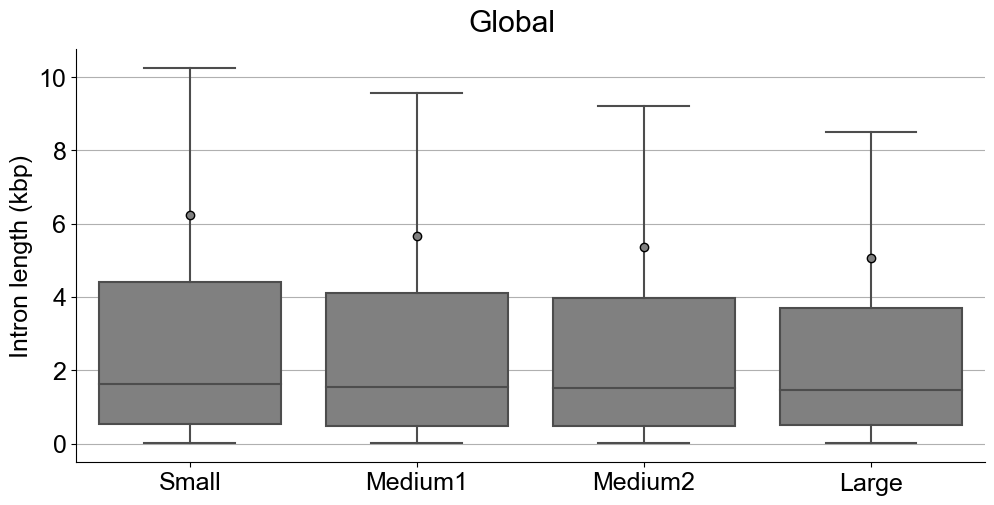

In [1821]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'), aspect=2, height=5, sharey=True)
g.map_dataframe(sns.boxplot, x='Gene_size_type', y='Introns_lengths', palette=['grey'], showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
#     ax.legend(loc='upper right')
    ax.grid(axis='y')
    ax.set_axisbelow(True)

    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
plt.suptitle('Global', y=1.025)

# plt.ylim(0,500)

Text(-0.8, 11, 'A')

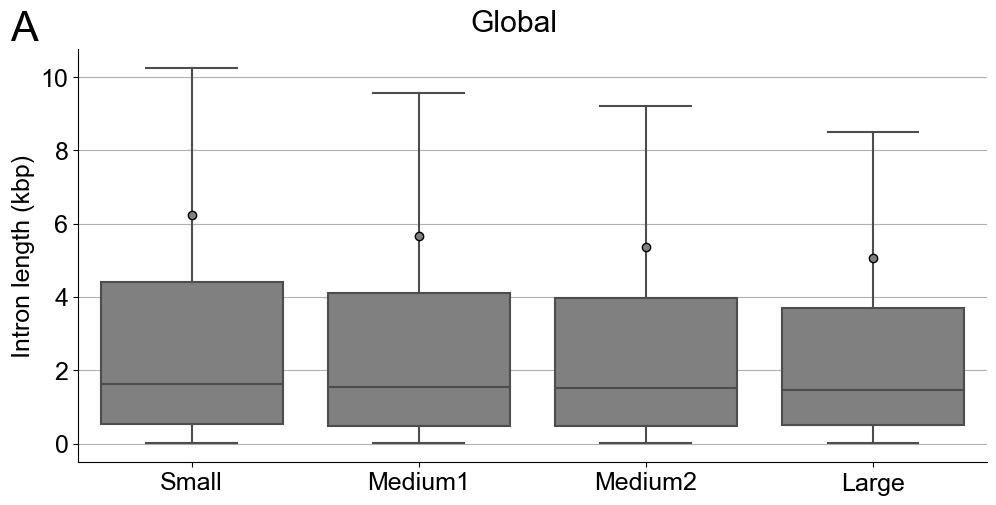

In [1823]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'), aspect=2, height=5, sharey=True)
g.map_dataframe(sns.boxplot, x='Gene_size_type', y='Introns_lengths', palette=['grey'], showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
#     ax.legend(loc='upper right')
    ax.grid(axis='y')
    ax.set_axisbelow(True)

    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
plt.suptitle('Global', y=1.025)
plt.text(-0.8, 11, "A", fontsize=30, weight='bold')
# plt.ylim(0,500)

Text(-1, 12, 'B')

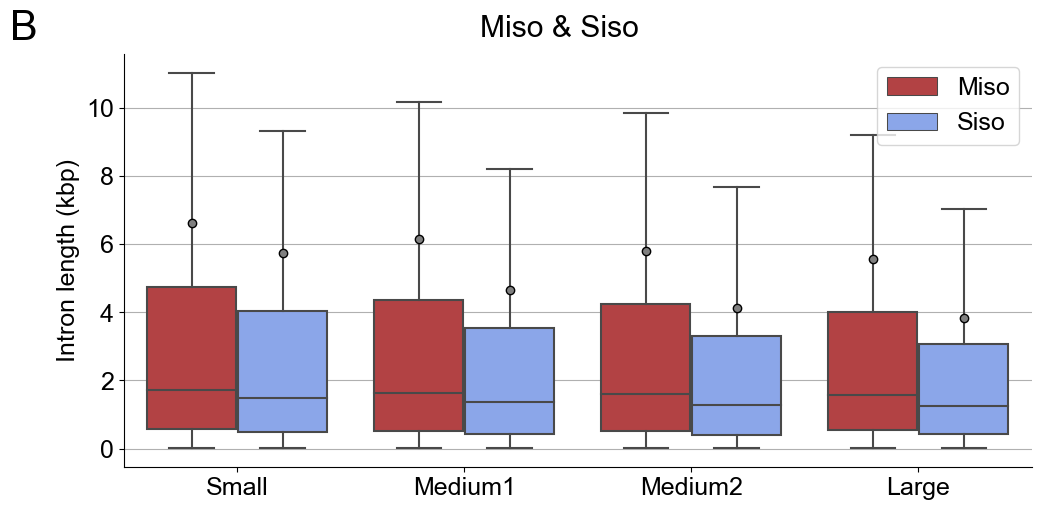

In [1822]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'), aspect=2, height=5, sharey=True)
g.map_dataframe(sns.boxplot, x='Gene_size_type', y='Introns_lengths', hue='Miso_siso', palette=palette, showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend(loc='upper right')
    ax.grid(axis='y')
    ax.set_axisbelow(True)

    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
plt.suptitle('Miso & Siso', y=1.025)
plt.text(-1, 12, "B", fontsize=30, weight='bold')

# plt.ylim(0,500)

In [1839]:
t

Gene   Length Miso_siso  Intron_length_max  \
4         PERM1    6.895      Miso              2.255   
5          HES4    1.133      Miso              0.092   
8      C1orf159   34.266      Miso              2.754   
10     TNFRSF18    3.084      Miso              0.891   
12         SDF4   15.159      Miso              4.498   
...         ...      ...       ...                ...   
17122    ADGRG4  115.927      Siso             20.998   
17199     HCFC1   24.261      Siso              5.920   
17214    PLXNA3   19.497      Siso              1.082   
17249     USP9Y  159.604      Siso             17.557   
17271      DAZ1   69.737      Siso              9.713   

       Intron_length_max_index  mRNA_gene_nb  CDS_count  Strand  \
4                            2             4          6       0   
5                            1             2          6       0   
8                            6             3         10       0   
10                           4             3          7       0   
12                           5             2          7       0   
...                        ...           ...        ...     ...   
17122                        2             1         23       1   
17199                       25             1         26       0   
17214                        3             1         32       1   
17249                       10             1         44       1   
17271                        4             1         27       0   

       Exon_length_max  Intron_length_norm Gene_size_type  
4                 2148            0.327049          Small  
5                  373            0.081200          Small  
8                  468            0.080371          Small  
10                 369            0.288911          Small  
12                 325            0.296721          Small  
...                ...                 ...            ...  
17122             6041            0.181131          Large  
17199             1476            0.244013          Large  
17214              593            0.055496          Large  
17249              750            0.110004          Large  
17271              146            0.139280          Large  

[17279 rows x 11 columns]

No handles with labels found to put in legend.


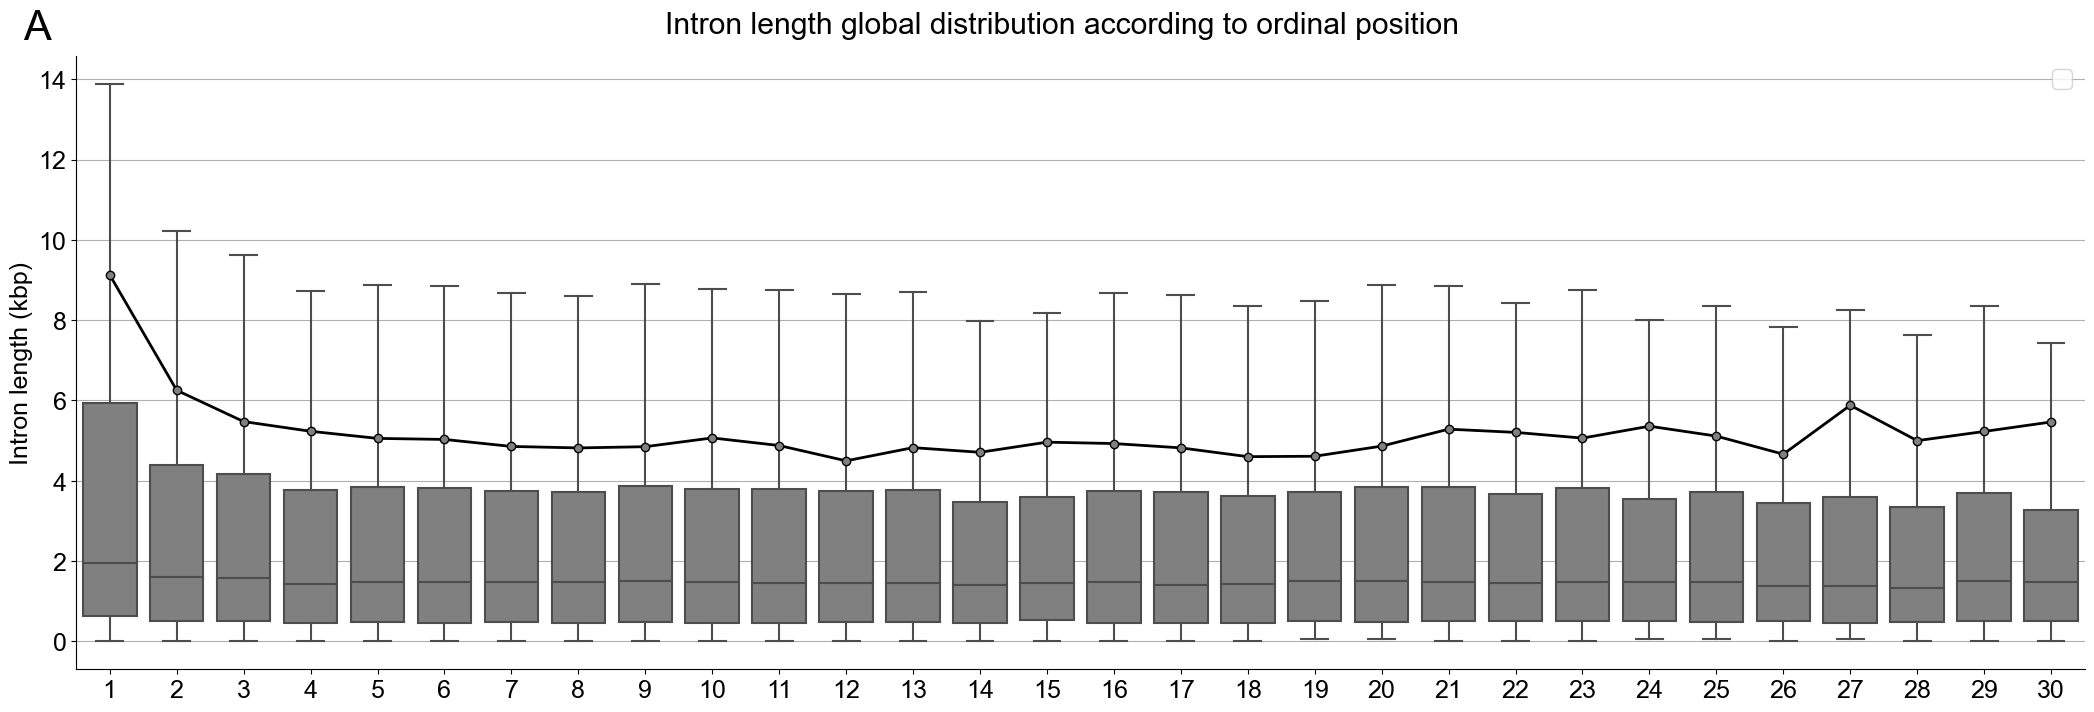

In [1878]:
# t = refseq_wt_variable_drop_duplicates.copy()
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'),  aspect=3, height=7, sharey=True, )
g.map_dataframe(sns.boxplot, x='Intron_nb', y='Introns_lengths',  palette=['grey'], showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend()
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
plt.suptitle('Intron length global distribution according to ordinal position', y=1.025)
plt.text(-1.3, 15, 'A', fontsize=30, weight='bold')

means = t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].groupby('Intron_nb')['Introns_lengths'].mean()
plt.plot(range(0,30), means.values, lw=2, color='black')
# plt.ylim(0,500)

Text(-1.3, 23, 'B')

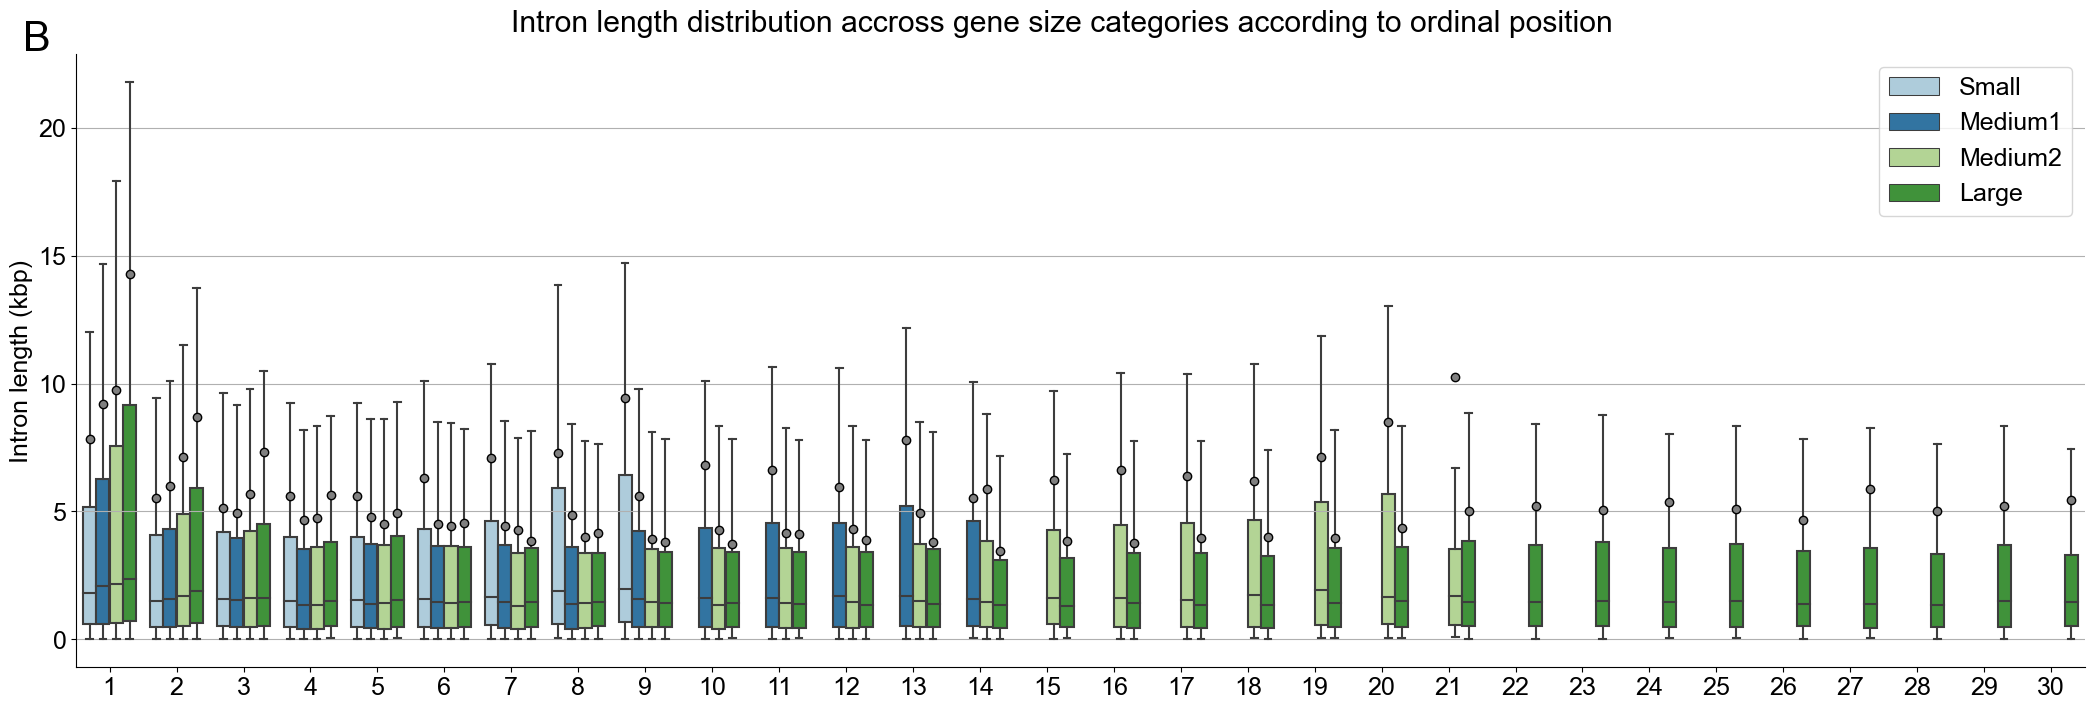

In [1879]:
# t = refseq_wt_variable_drop_duplicates.copy()
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'),  aspect=3, height=7, sharey=True, )
g.map_dataframe(sns.boxplot, x='Intron_nb', y='Introns_lengths', hue='Gene_size_type', palette='Paired', showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend()
    
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
plt.suptitle('Intron length distribution accross gene size categories according to ordinal position', y=1.025)
plt.text(-1.3, 23, 'B', fontsize=30, weight='bold')
# plt.ylim(0,500)

Text(0.5, 1.025, 'Intron length distribution accross Miso & Siso according to ordinal position')

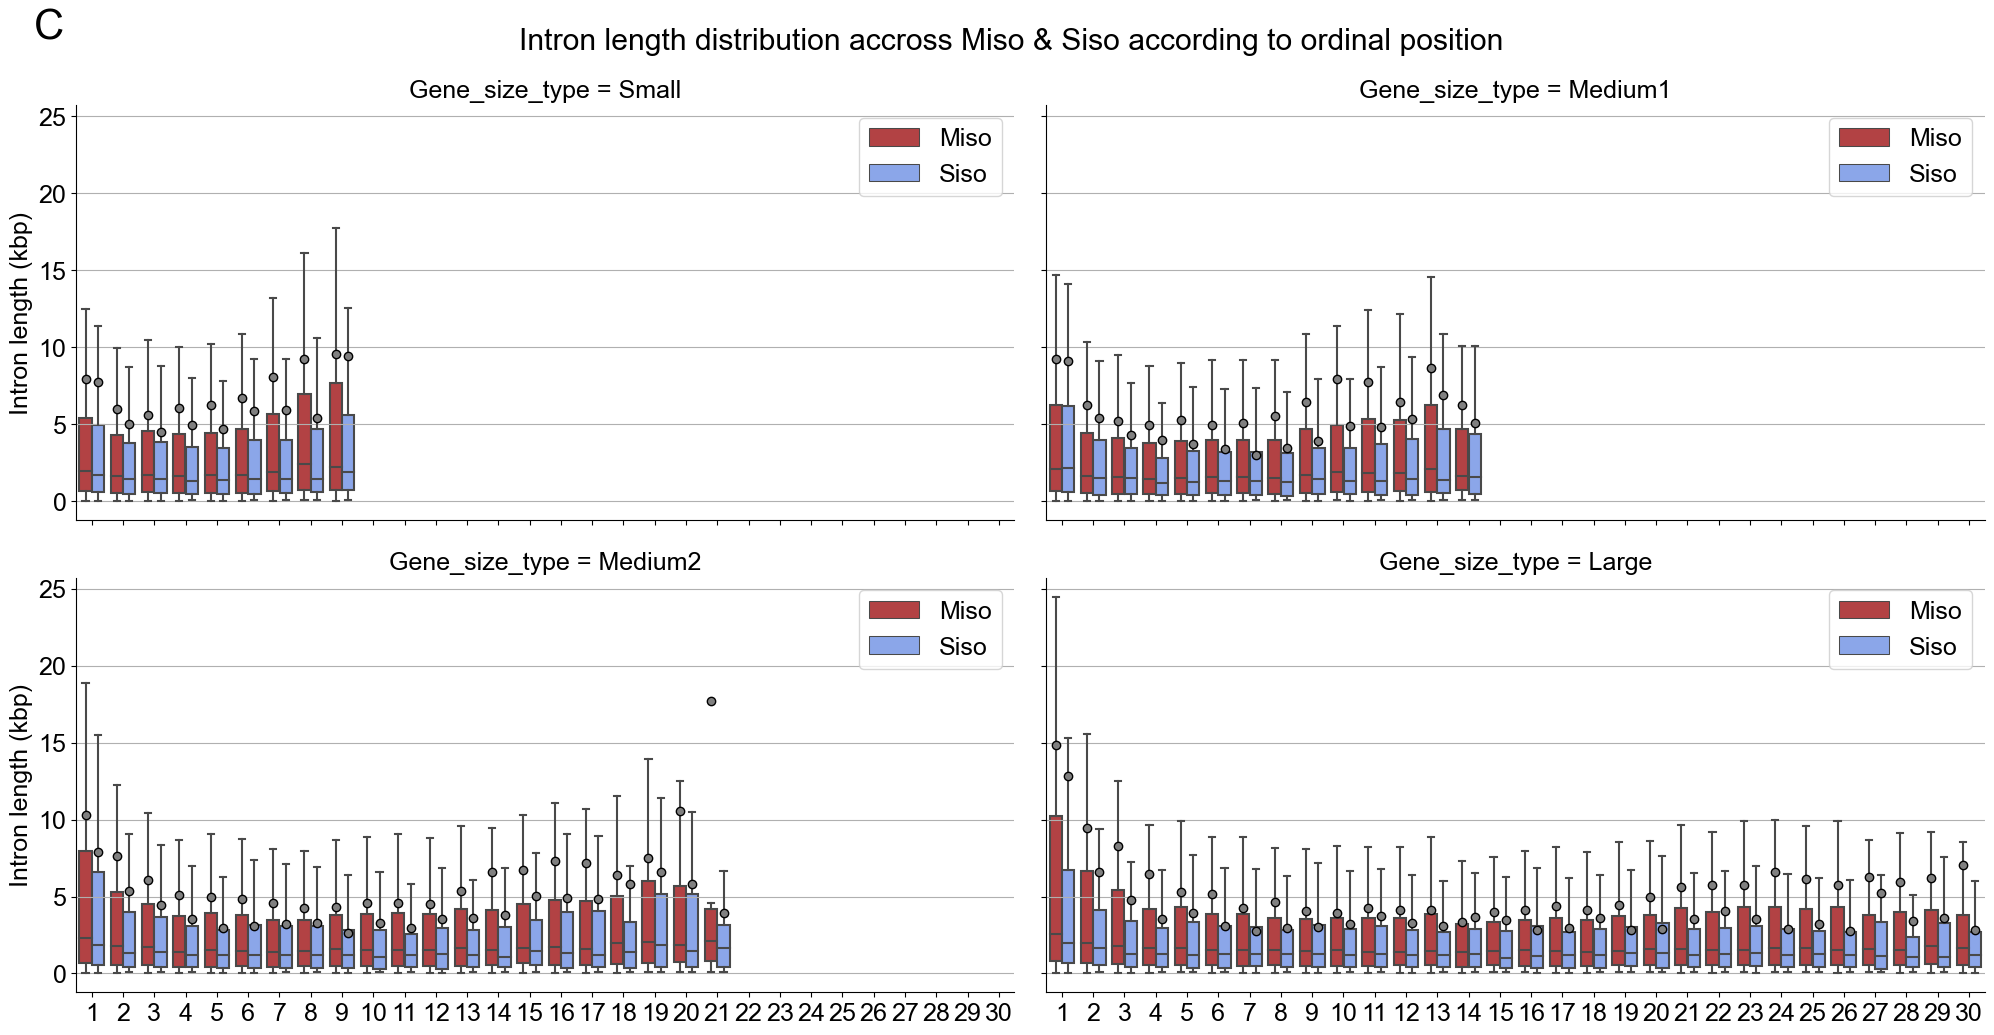

In [1880]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=t.loc[(t['Intron_nb'] <= 30) & (t['Intron_nb'] < t['CDS_count'])].sort_values(by='Miso_siso'), col='Gene_size_type', aspect=2, height=5, sharey=True, col_wrap=2)
g.map_dataframe(sns.boxplot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
print(g.axes.ravel())
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend()
    
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Intron length (kbp)')
    if j == 0:
        ax.text(-1.85, 30, 'C', fontsize=30, weight='bold')

plt.suptitle('Intron length distribution accross Miso & Siso according to ordinal position', y=1.025)

# plt.ylim(0,500)

Text(-1, 410, 'A')

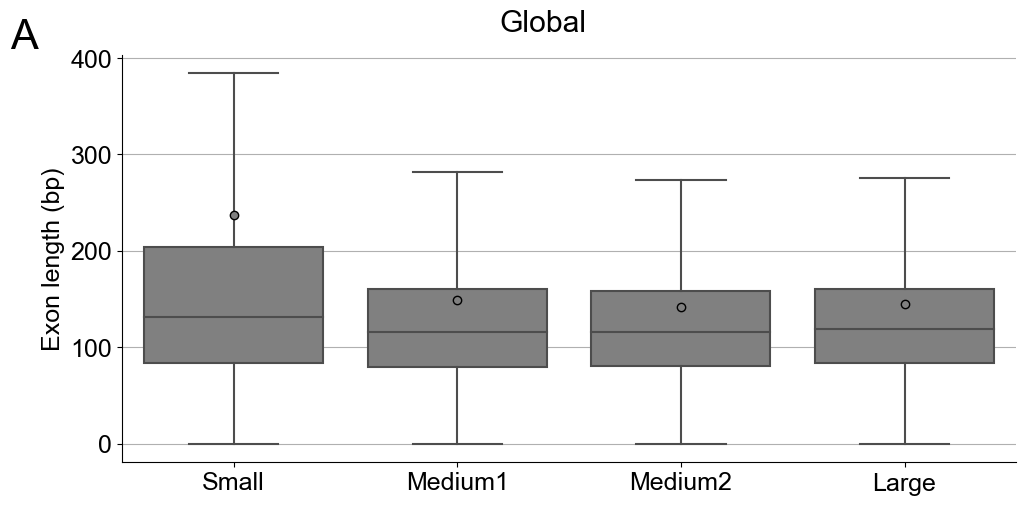

In [1824]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=tmp.loc[tmp['Exon_nb'] <= 30].sort_values(by='Miso_siso'),  aspect=2, height=5, sharey=True,)
g.map_dataframe(sns.boxplot, x='Gene_size_type', y='Length_raw', palette=['grey'], showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.set_axisbelow(True)
#     ax.legend()
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Exon length (bp)')
plt.suptitle('Global', y=1.025)
plt.text(-1, 410, "A", fontsize=30, weight='bold')

# plt.ylim(0,500)

Text(-1.1, 450, 'B')

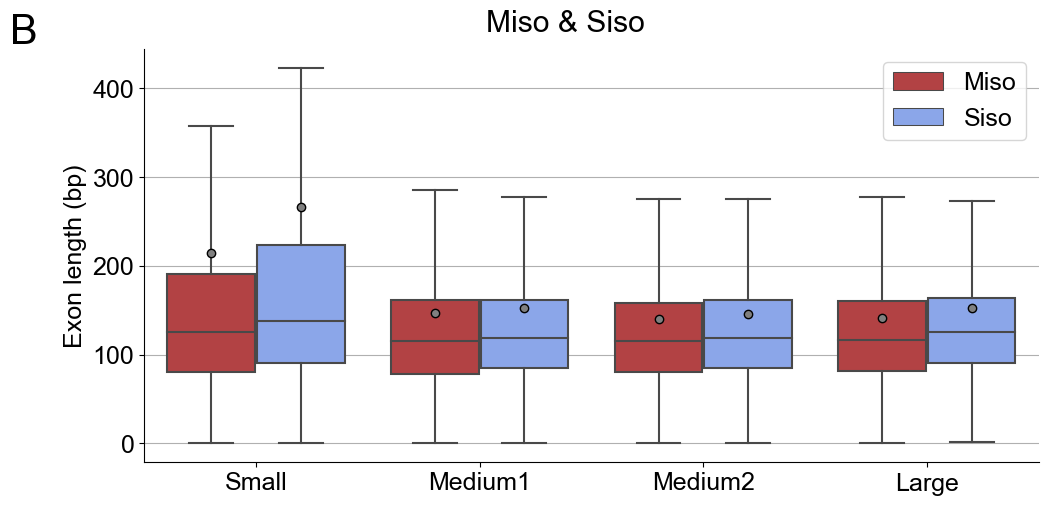

In [1825]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=tmp.loc[tmp['Exon_nb'] <= 30].sort_values(by='Miso_siso'),  aspect=2, height=5, sharey=True,)
g.map_dataframe(sns.boxplot, x='Gene_size_type', y='Length_raw', hue='Miso_siso', palette=palette, showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.set_axisbelow(True)
    ax.legend()
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Exon length (bp)')
plt.suptitle('Miso & Siso', y=1.025)
plt.text(-1.1, 450, "B", fontsize=30, weight='bold')

# plt.ylim(0,500)

Text(-1.85, 1100, 'A')

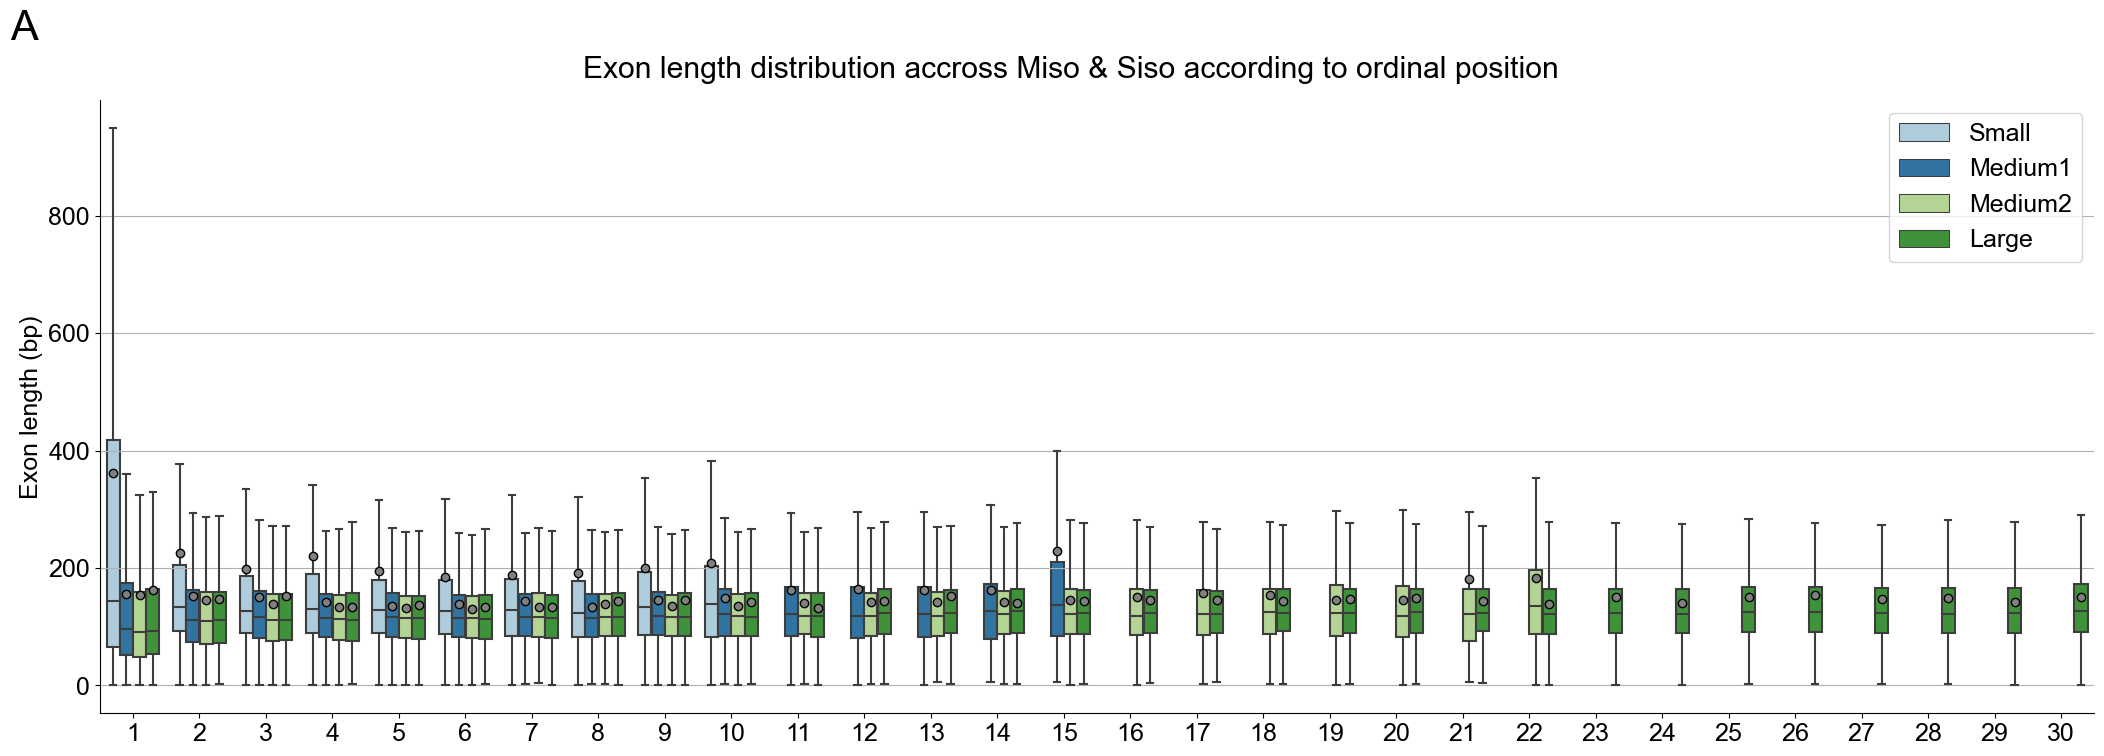

In [1872]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=tmp.loc[tmp['Exon_nb'] <= 30].sort_values(by='Miso_siso'),aspect=3, height=7, sharey=True, )
g.map_dataframe(sns.boxplot, x='Exon_nb', y='Length_raw', hue='Gene_size_type', palette='Paired', showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend()
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Exon length (bp)')
plt.suptitle('Exon length distribution accross Miso & Siso according to ordinal position', y=1.025)
plt.text(-1.85, 1100, 'A', fontsize=30, weight='bold')

# plt.ylim(0,500)

Text(0.5, 1.025, 'Exon length distribution accross gene size categories according to ordinal position')

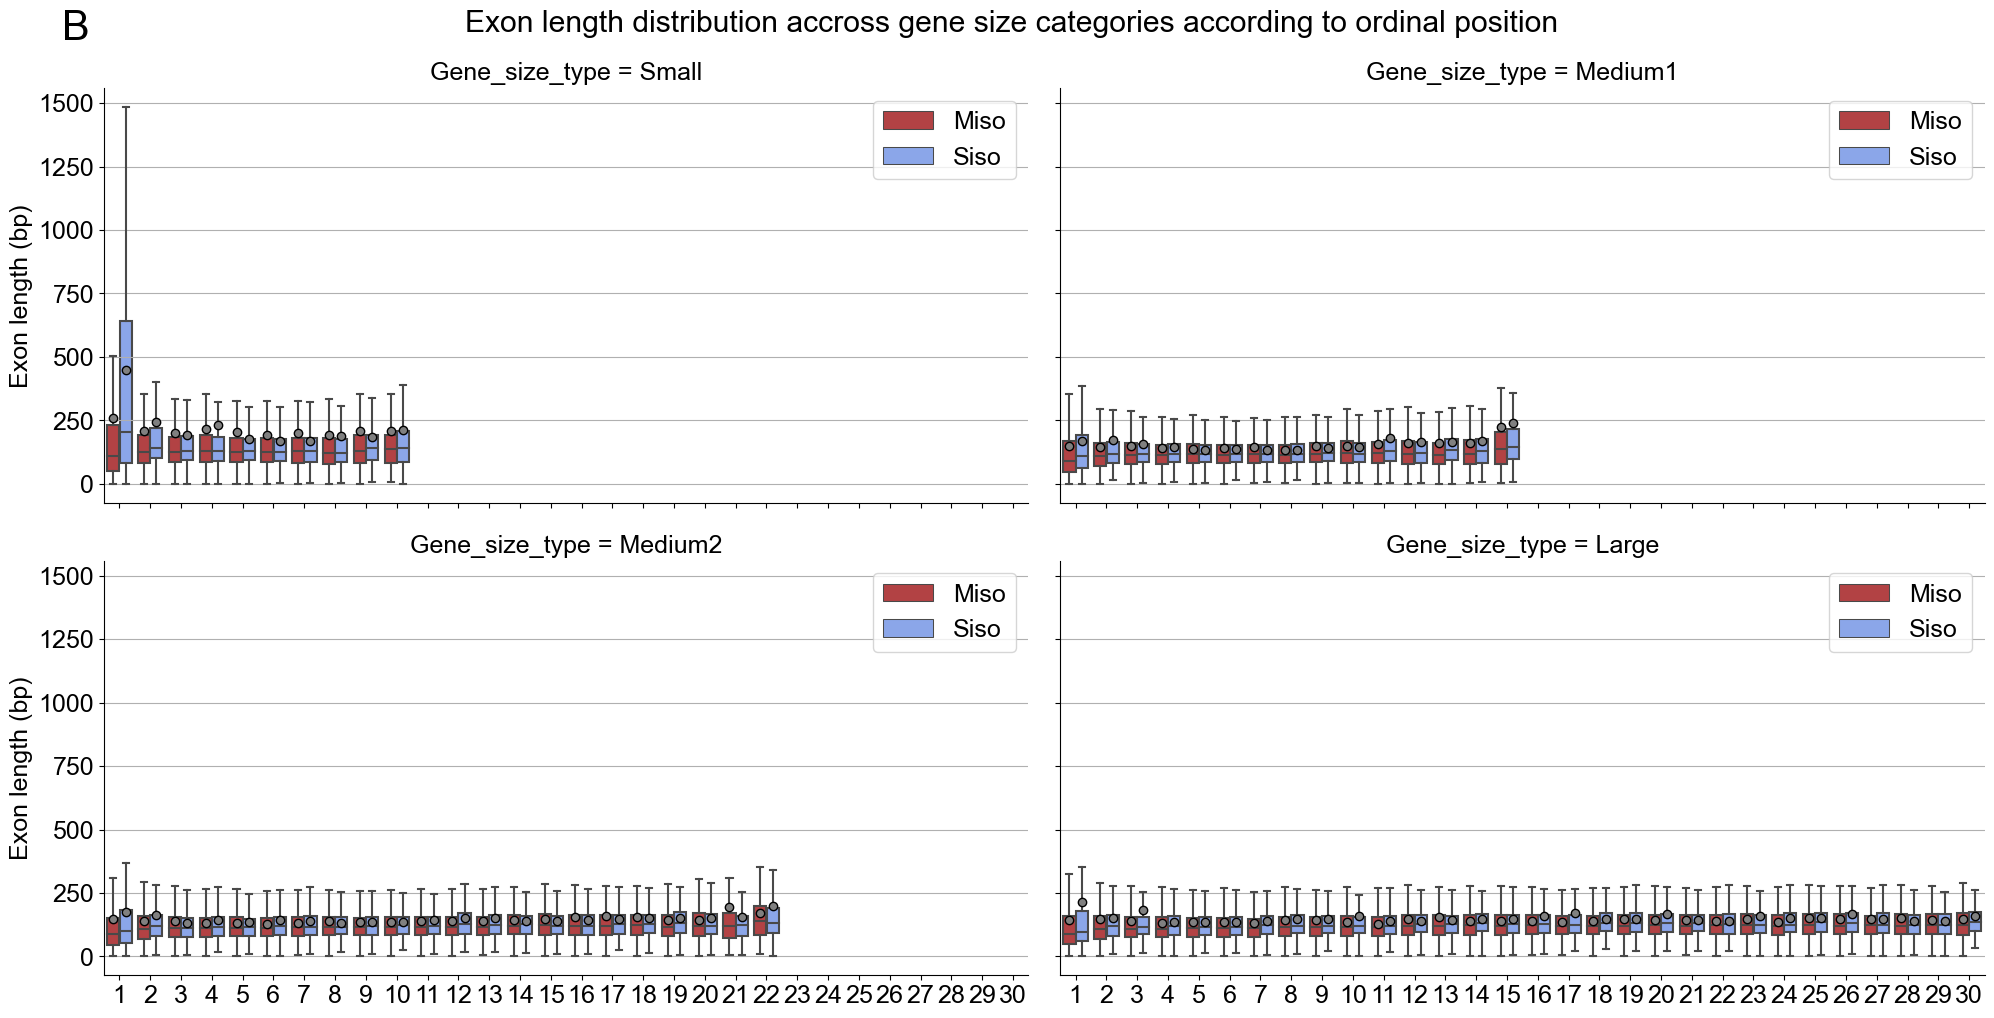

In [1871]:
tmp = refseq_wt_variable_drop_duplicates.copy()
tmp['Gene_size_type'] = pd.cut(tmp['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])
tmp
# f = plt.figure(figsize=(15,10))
g = sns.FacetGrid(data=tmp.loc[tmp['Exon_nb'] <= 30].sort_values(by='Miso_siso'), col='Gene_size_type', aspect=2, height=5, sharey=True, col_wrap=2)
g.map_dataframe(sns.boxplot, x='Exon_nb', y='Length_raw', hue='Miso_siso', palette=palette, showfliers=False, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black"})
for j, ax in enumerate(g.axes.ravel()):
    
#     ax.set_ylim(0,1000)
    ax.legend()
    ax.grid(axis='y')
    if j % 2 == 0 :
        ax.set_ylabel('Exon length (bp)')
    if j == 0:
        ax.text(-1.85, 1750, 'B', fontsize=30, weight='bold')
        
plt.suptitle('Exon length distribution accross gene size categories according to ordinal position', y=1.025)

# plt.ylim(0,500)

Rectangle(xy=(-0.4, 0), width=0.8, height=9610, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=3300, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=2322, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=2047, angle=0)
Rectangle(xy=(-0.4, 0), width=0.4, height=4972, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=2363, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=1786, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=1478, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=4638, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=937, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=536, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=569, angle=0)
Gene_size_type      Miso_siso
Small\n(1 - 10)     Miso          5.8130
                    Siso          4.2880
Medium1\n(11 - 15)  Miso          9.9420
                    Siso          8.6250
Medium2\n(16 - 22)  Miso         13.5215
                    Siso         10.1790
Large\n(23 - 30)    Miso         19.9910
         

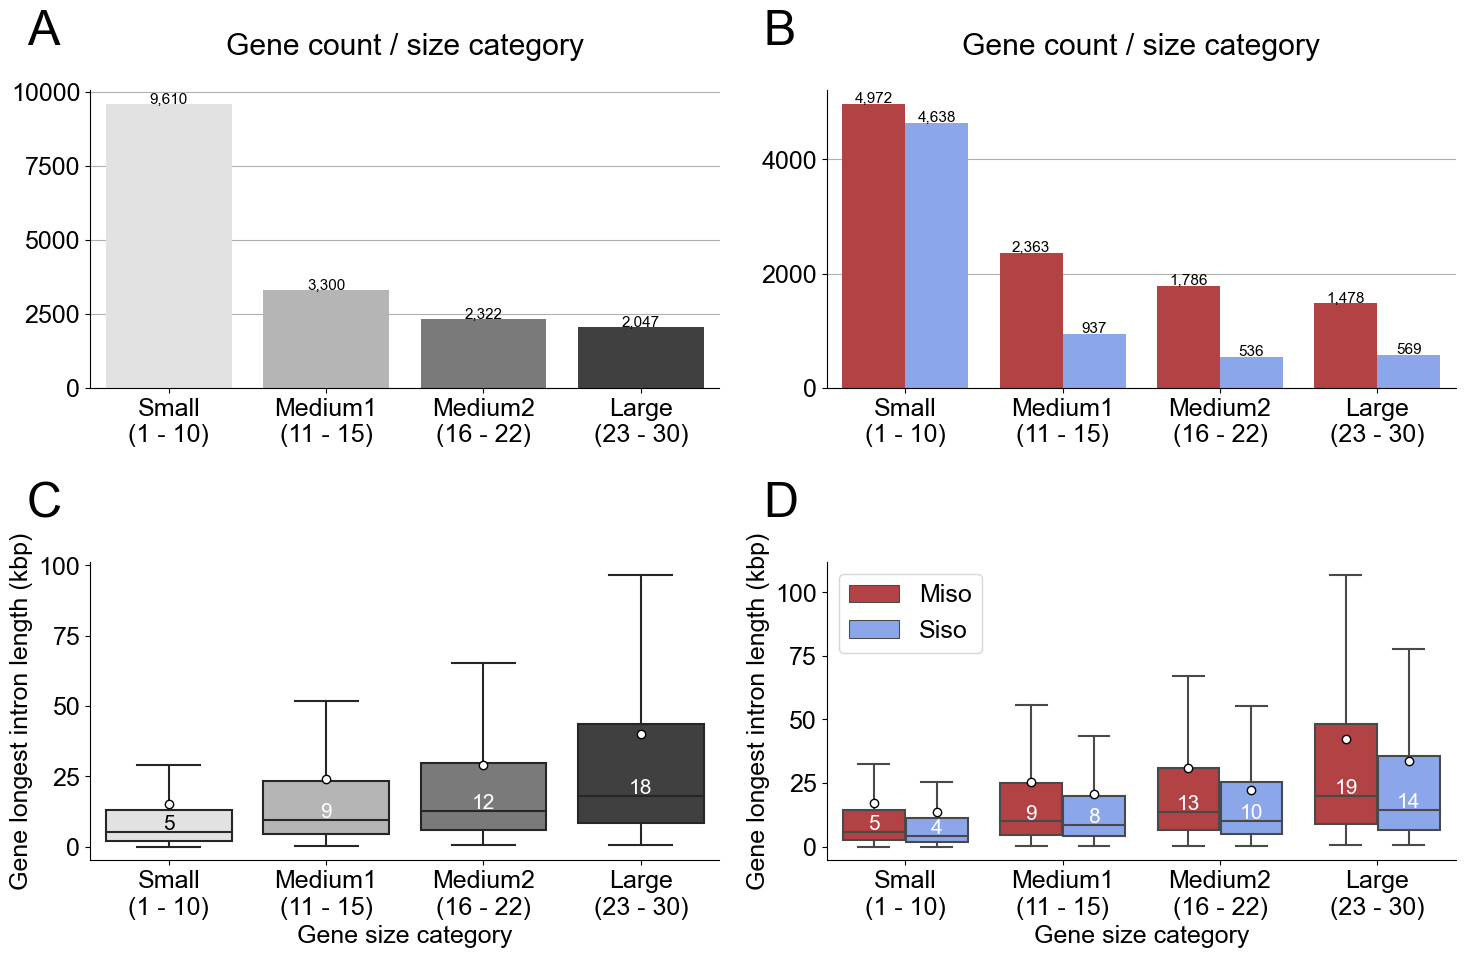

In [1832]:
# t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
bins = [0,10,15,22,max(t['CDS_count'])]
bins_modified = bins[:-1] + [30]
t['Gene_size_type'] = pd.cut(t['CDS_count'], bins, labels=[e + '\n({})'.format(str("{} - {}").format(bins_modified[j]+1, bins_modified[j+1])) for e,(j,n) in zip(['Small', 'Medium1', 'Medium2', 'Large'], enumerate(bins))])

t = t.sort_values(by=['Miso_siso', 'Gene_size_type'])
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))


sns.barplot(data=t.Gene_size_type.value_counts().reset_index(), x='index', y='Gene_size_type', ax=ax[0][0], palette='Greys')
ax[0][0].set_title('Gene count / size category', pad=25)
ax[0][0].spines['right'].set_linewidth(0)
ax[0][0].spines['top'].set_linewidth(0)
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('')
# [0]ax[0].set_ylim(0,3000)
# [0]ax[0].set_title('Genes count where intron ordinal x is the largest')
ax[0][0].set_axisbelow(True)
ax[0][0].grid(axis='y')

show_values_on_bars(ax[0][0], fontsize=11)



sns.barplot(data=t.groupby('Miso_siso').Gene_size_type.value_counts().rename('Count').reset_index(), x='Gene_size_type', y='Count', hue='Miso_siso', ax=ax[0][1], palette=palette)
ax[0][1].set_title('Gene count / size category', pad=25)
ax[0][1].spines['right'].set_linewidth(0)
ax[0][1].spines['top'].set_linewidth(0)
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('')
# [0]ax[0].set_ylim(0,3000)
# [0]ax[0].set_title('Genes count where intron ordinal x is the largest')
ax[0][1].set_axisbelow(True)
ax[0][1].grid(axis='y')
ax[0][1].legend().remove()

show_values_on_bars(ax[0][1], fontsize=11)

sns.boxplot(data=t, x='Gene_size_type', y='Intron_length_max', showfliers=False, ax=ax[1][0], palette='Greys', showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
ax[1][0].spines['right'].set_linewidth(0)
ax[1][0].spines['top'].set_linewidth(0)
ax[1][0].set_xlabel('Gene size category')
ax[1][0].set_ylabel('Gene longest intron length (kbp)')
# sns.lineplot(data=t, x='Gene_size_type', y='Intron_length_max', ax=ax[0], color='red')

# add_stat_annotation(ax[1][0], data=t, x='Gene_size_type', y='Intron_length_max', box_pairs=[("Small", "Medium"), ("Medium", "Large"), ("Small", "Large")],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)

medians = t.groupby(['Gene_size_type'])['Intron_length_max'].median()
vertical_offset = t['Intron_length_max'].median() * 0.1 # offset from median for display

for xtick in ax[1][0].get_xticks():
    if medians[xtick] < 8:
        color = 'black'
    else:
        color = 'white'
    ax[1][0].text(xtick,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',size='small',color=color,weight='semibold')
    
    
sns.boxplot(data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', showfliers=False, ax=ax[1][1], palette=palette, showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
ax[1][1].set_xlabel('Gene size category')
ax[1][1].set_ylabel('Gene longest intron length (kbp)')
ax[1][1].legend(title='')
ax[1][1].spines['right'].set_linewidth(0)
ax[1][1].spines['top'].set_linewidth(0)
medians = t.groupby(['Gene_size_type', 'Miso_siso'])['Intron_length_max'].median()
vertical_offset = t['Intron_length_max'].median() * 0.1 # offset from median for display
x_cat = t.Gene_size_type.unique().tolist()
print(medians)
for xtick in ax[1][1].get_xticks():
    for cat, x_shift in zip(t.Miso_siso.unique(), [-0.2,+0.2]):

        ax[1][1].text(xtick + x_shift, medians[x_cat[xtick]][cat] + vertical_offset, int(medians[x_cat[xtick]][cat]), 
                horizontalalignment='center',size='small',color='w',weight='semibold')

# add_stat_annotation(ax[1][1], data=t, x='Gene_size_type', y='Intron_length_max', hue='Miso_siso', box_pairs=[[("Small", "Siso"), ("Medium", "Siso")], [("Medium", "Siso"), ("Large", "Siso")], [("Small", "Miso"), ("Medium", "Miso")],  [("Medium", "Miso"), ("Large", "Miso")], ],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)  




i = 0
for n, a in enumerate(ax):
    for sub_a in a:
        sub_a.text(-0.1, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=35, weight='bold')
        i += 1 
plt.tight_layout()

In [764]:
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t

# t_plot = t.loc[t['Intron_nb'] <= 10]
# t_plot = t_plot.sort_values(by='Miso_siso')
# t_plot

# f, ax = plt.subplots(figsize=(10,5))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

# sns.barplot(data=t_plot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, ax=ax)
# # sns.lineplot(data=t_plot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, ax=ax)
# # plt.ylim()
# ax.spines['right'].set_linewidth(0)
# ax.spines['top'].set_linewidth(0)
# ax.set_xlabel('Intron ordinal')
# ax.set_ylabel('Intron length (kbp)')
# ax.set_axisbelow(True)
# ax.grid(axis='y')
# ax.legend(title='')

Gene  Length                                       Exons_ranges  \
0       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
1       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
2       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
3       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
4       SAMD11  18.843  [861322-861393, 865535-865716, 866419-866469, ...   
...        ...     ...                                                ...   
180238    DAZ4  73.220  [26980274-26980276, 26986878-26987024, 2698729...   
180239   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180240   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180241   BPY2C  21.203  [27190093-27190170, 27187916-27188033, 2718495...   
180242    CDY1   2.785             [27768590-27770212, 27770602-27770674]   

        Strand Miso_siso                                     Introns_ranges  \
0            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
1            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
2            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
3            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
4            1      Siso  [861394-865534, 865717-866418, 866470-871151, ...   
...        ...       ...                                                ...   
180238       1      Miso  [26980277-26986877, 26987025-26987298, 2698739...   
180239       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180240       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180241       0      Siso  [27184264-27184955, 27185062-27187915, 2718803...   
180242       1      Miso                                [27770213-27770601]   

        Introns_lengths  Intron_nb  mRNA_gene_nb  CDS_count Gene_size_type  
0                 4.140          1             1         13          Small  
1                 0.701          2             1         13          Small  
2                 4.681          3             1         13          Small  
3                 3.142          4             1         13          Small  
4                 0.144          5             1         13          Small  
...                 ...        ...           ...        ...            ...  
180238            4.571         21             2         22          Large  
180239            0.691          1             1          4          Small  
180240            2.853          2             1          4          Small  
180241            2.058          3             1          4          Small  
180242            0.388          1             2          3          Small  

[180243 rows x 11 columns]

In [858]:
# plt.style.use('default')
def show_values_on_bars(axs, i=0, fontsize=13, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height() / 4) *3 
            if i == 0:
                value = "{:.0f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

t_plot = t.loc[t['Intron_nb'] <= 10]
t_plot = t_plot.sort_values(by='Miso_siso')
t_plot

f, ax = plt.subplots(figsize=(12,5))
palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

sns.barplot(data=t_plot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, ax=ax)
# sns.lineplot(data=t_plot, x='Intron_nb', y='Introns_lengths', hue='Miso_siso', palette=palette, ax=ax)
# plt.ylim()
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Intron ordinal')
ax.set_ylabel('Intron length (kbp)')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.legend(title='')
show_values_on_bars(ax, i=2, fontsize=12)


KeyError: 'Intron_nb'

In [11]:
utrs = pd.read_parquet(yaml["1_GENOMICS"]["Final"]["refseq_miso_utrs"])
utrs['mRNA_count'] = utrs.CDS_ranges.apply(len)
utrs['Ratio_modif'] = 100 * ((utrs['mRNA_count'] - utrs['Nb_combi']) / utrs['mRNA_count'])
t = pd.merge(genes[['Gene', 'Length']], utrs, on='Gene')
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')
# t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

t


Gene  Length                                         CDS_ranges  \
0       PLEKHN1   9.383  [901912-901994,902084-902183,905657-905803,905...   
1         PERM1   6.895  [911552-911649,911879-912004,914261-916409, 91...   
2          HES4   1.133  [934439-934812,934906-934993,935072-935353, 93...   
3          AGRN  35.996  [955553-955753,957581-957842,970657-970704,976...   
4      C1orf159  34.266  [1018273-1018367,1019295-1019763,1019861-10198...   
...         ...     ...                                                ...   
10944    RBMY1F  14.400  [24315193-24315265,24315682-24315765,24315852-...   
10945      DAZ2  71.899  [25365888-25365890,25372491-25372637,25372912-...   
10946     CDY1B   2.785  [26192213-26193835, 26191751-26191823,26192244...   
10947      DAZ4  73.220  [26980274-26980276,26986878-26987024,26987299-...   
10948      CDY1   2.785  [27768590-27770181,27770602-27770674, 27768590...   

       5_prime_modif  3_prime_modif  Nb_combi  mRNA_count  Ratio_modif  \
0                  0              0         3           3          0.0   
1                  2              2         3           4         25.0   
2                  0              0         2           2          0.0   
3                  0              0         3           3          0.0   
4                  0              0         3           3          0.0   
...              ...            ...       ...         ...          ...   
10944              0              0         2           2          0.0   
10945              0              0         3           3          0.0   
10946              0              0         2           2          0.0   
10947              0              0         2           2          0.0   
10948              0              0         2           2          0.0   

       mRNA_gene_nb  CDS_count Gene_size_type  
0                 3         17        Medium2  
1                 4          6          Small  
2                 2          6          Small  
3                 3         40          Large  
4                 3         10          Small  
...             ...        ...            ...  
10944             2         13        Medium1  
10945             3         23          Large  
10946             2          3          Small  
10947             2         22        Medium2  
10948             2          3          Small  

[10949 rows x 11 columns]

In [1909]:
t.loc[t['Nb_combi'] < t['mRNA_gene_nb']].Gene.nunique()

4091

In [1910]:
tmp = t[['Gene_size_type', '5_prime_modif', '3_prime_modif']].melt(id_vars='Gene_size_type')
tmp.loc[tmp['value'] > 0, 'value_bool'] = True
tmp.loc[tmp['value'] == 0, 'value_bool'] = False
tmp.groupby(['Gene_size_type', 'variable'])['value_bool'].value_counts()

Gene_size_type  variable       value_bool
Small           3_prime_modif  False         3768
                               True          1544
                5_prime_modif  False         3331
                               True          1981
Medium1         3_prime_modif  False         1872
                               True           493
                5_prime_modif  False         1837
                               True           528
Medium2         3_prime_modif  False         1443
                               True           347
                5_prime_modif  False         1406
                               True           384
Large           3_prime_modif  False         1242
                               True           240
                5_prime_modif  False         1230
                               True           252
Name: value_bool, dtype: int64

                 count       mean        std        min        25%        50%  \
Gene_size_type                                                                  
Small           2348.0  49.906649  17.578523  10.000000  33.333333  50.000000   
Medium1          776.0  39.843257  17.041759   7.142857  25.000000  34.523810   
Medium2          577.0  35.898403  16.910675   3.571429  22.222222  33.333333   
Large            392.0  32.584892  16.815842   2.040816  20.000000  30.000000   

                      75%        max  
Gene_size_type                        
Small           66.666667  96.153846  
Medium1         50.000000  94.871795  
Medium2         50.000000  91.176471  
Large           46.904762  86.666667  
0 Small (0.02, 0.31) 49.90664929544157
1 Medium1 (0.36, 0.645) 39.84325730016619
2 Medium2 (0.69, 0.98) 35.898403478578494
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.

ValueError: box_pairs contains an invalid box pair.

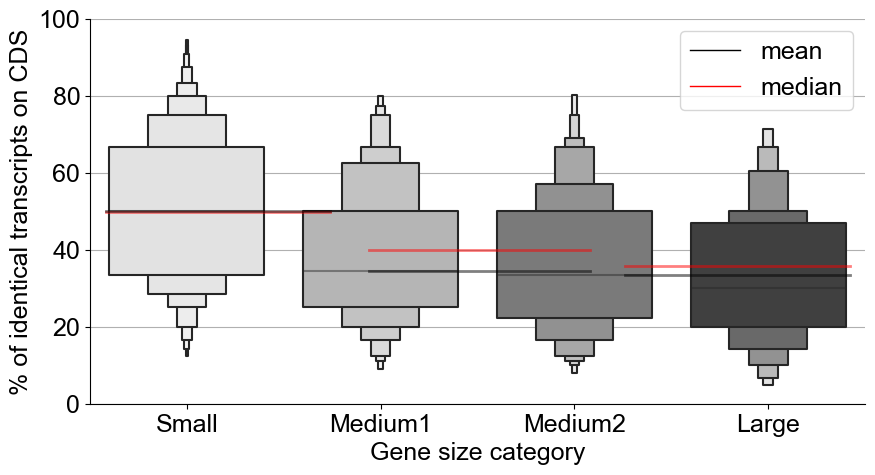

In [1898]:
t_plot = t.loc[(t['5_prime_modif'] >0) | (t['3_prime_modif'] >0)]

f, ax= plt.subplots(figsize=(10,5))

sns.boxenplot(data=t_plot, x='Gene_size_type', y='Ratio_modif', showfliers=False, palette="Greys")

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Gene size category')
ax.set_ylabel('% of identical transcripts on CDS')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.legend(title='', handles=[Line2D([0], [0], color='black', lw=1), Line2D([0], [0], color='red', lw=1)], labels=['mean', 'median'], loc='upper right')
ax.set_ylim(0,100)

print(t_plot.groupby('Gene_size_type')['Ratio_modif'].describe())
mean_data = t_plot.groupby('Gene_size_type')['Ratio_modif'].describe()['mean']
median_data = t_plot.groupby('Gene_size_type')['Ratio_modif'].describe()['50%']
list_x_ticks = mean_data.index.tolist()
pairs_hline = [(0.02,0.31),(0.36,0.645),(0.69,0.98)]

for (j, x), pair in zip(enumerate(list_x_ticks), pairs_hline):
    print(j,x,pair, mean_data[x])
    plt.axhline( mean_data[x], pair[0], pair[1], color='red', lw=2, alpha=0.5)
    plt.axhline( median_data[x], pair[0], pair[1], color='black', lw=2, alpha=0.5)

add_stat_annotation(ax, data=t_plot, x='Gene_size_type', y='Ratio_modif', box_pairs=[("Small", "Medium"), ("Medium", "Large"), ("Small", "Large")],
                    test='Mann-Whitney', text_format='star',
                    loc='outside', verbose=2)

In [739]:
def show_values_on_bars(axs, i=0, fontsize=15, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 0.2
            if i == 0:
                value = "{:.2f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


In [885]:
t_plot

Gene_size_type  Nb_combi
0          Small      1186
1         Medium        70
2          Large        41

Rectangle(xy=(-0.4, 0), width=0.8, height=1087, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=116, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=59, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=35, angle=0)


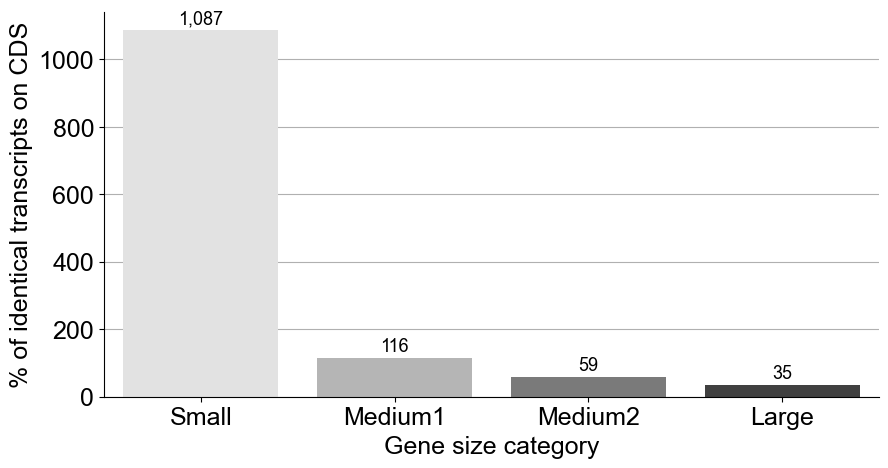

In [1883]:
t_plot = t.loc[(t['Nb_combi'] ==1)]
t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index()
t_plot


t['Gene_size_type'].value_counts().reset_index()

f, ax= plt.subplots(figsize=(10,5))

sns.barplot(data=t_plot, x='Gene_size_type', y='Nb_combi',  palette="Greys")

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Gene size category')
ax.set_ylabel('% of identical transcripts on CDS')
ax.set_axisbelow(True)
ax.grid(axis='y')
show_values_on_bars(ax)
# ax.legend(title='', loc='upper left')
# ax.set_ylim(0,20)

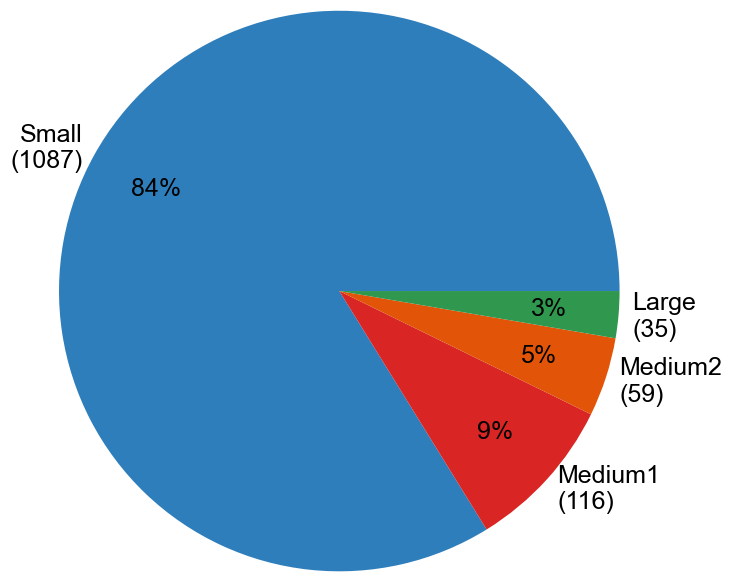

In [1888]:
t_plot = t.loc[(t['Nb_combi'] ==1)]
t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index()

# Make data: I have 3 groups and 7 subgroups
group_size = [e[0] for e in t_plot.groupby('Gene_size_type').sum().values.tolist()]
group_names=["{}\n({})".format(e,v) for e, v in zip(t_plot.Gene_size_type.unique().tolist(), group_size)]

# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, ]
 
f, ax = plt.subplots(figsize=(7,7))
# First Ring (outside)
ax.axis('equal')
mypie = ax.pie(group_size, radius=1.3, labels=group_names,   autopct='%1.0f%%', pctdistance=0.75, labeldistance=1.05, colors=[a(0.7), b(0.7), c(0.7), d(0.7)])
# plt.setp( mypie, width=1, edgecolor='white', )
# group_size 
# mypie
# f
# plt.text(-1.75, 1.2, 'B', fontsize=30)


Rectangle(xy=(-0.4, 0), width=0.8, height=20.4631, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=4.90486, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=3.29609, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=2.36167, angle=0)


[Text(0, 0, 'Small\n(5312)'),
 Text(0, 0, 'Medium1\n(2365)'),
 Text(0, 0, 'Medium2\n(1790)'),
 Text(0, 0, 'Large\n(1482)')]

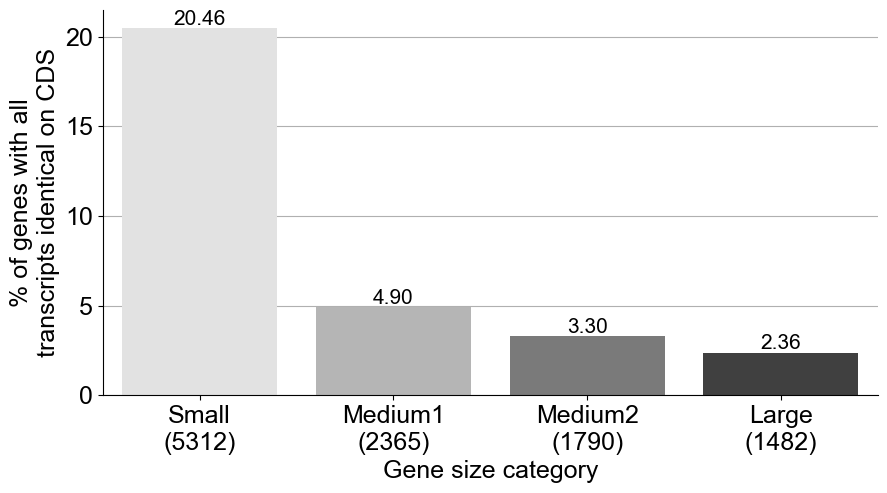

In [1890]:

def show_values_on_bars(axs, i=0, fontsize=15, rotation=0):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            print(p)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + (p.get_height()) + 0.2
            if i == 0:
                value = "{:.2f}".format(p.get_height())
            if i == 2:
                value = "{:.2f}".format(p.get_height())

            if i == 3:
                value = "{:.3f}".format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=fontsize, rotation=rotation, color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


t_plot = t.loc[(t['Nb_combi'] ==1)]
t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index().rename({'Nb_combi' : 'count'}, axis=1).set_index('Gene_size_type')

t_plot_raw = t['Gene_size_type'].value_counts().reset_index().rename({'index' : 'Gene_size_type', 'Gene_size_type' : 'count'}, axis=1).set_index('Gene_size_type')

t_plot = 100 * (t_plot / t_plot_raw)
t_plot = t_plot.reset_index()



t['Gene_size_type'].value_counts().reset_index()

f, ax= plt.subplots(figsize=(10,5))

sns.barplot(data=t_plot, x='Gene_size_type', y='count',  palette="Greys")

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Gene size category')
ax.set_ylabel('% of genes with all\ntranscripts identical on CDS')

ax.set_axisbelow(True)
ax.grid(axis='y')
show_values_on_bars(ax)

ax.set_xticklabels(["{}\n({})".format(e,c[0]) for e,c in zip(t_plot_raw.index.tolist(), t_plot_raw.values.tolist())])

# ax.legend(title='', loc='upper left')
# ax.set_ylim(0,20)

Rectangle(xy=(-0.4, 0), width=0.8, height=5312, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=2365, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=1790, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=1482, angle=0)


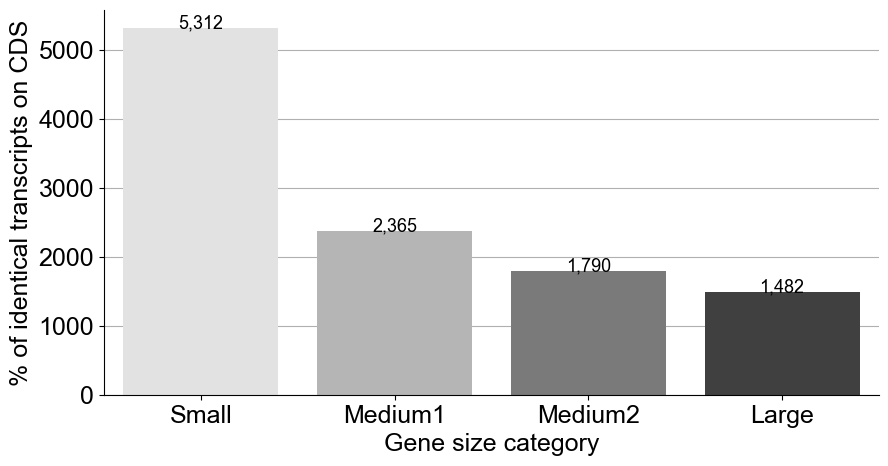

In [1439]:
# t_plot = t.loc[(t['Nb_combi'] ==1)]
t_plot = t['Gene_size_type'].value_counts().reset_index()
t_plot

f, ax= plt.subplots(figsize=(10,5))

sns.barplot(data=t_plot, x='index', y='Gene_size_type',  palette="Greys")

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Gene size category')
ax.set_ylabel('% of identical transcripts on CDS')
ax.set_axisbelow(True)
ax.grid(axis='y')
show_values_on_bars(ax)
# ax.legend(title='', loc='upper left')
# ax.set_ylim(0,20)

(0.0, 20.0)

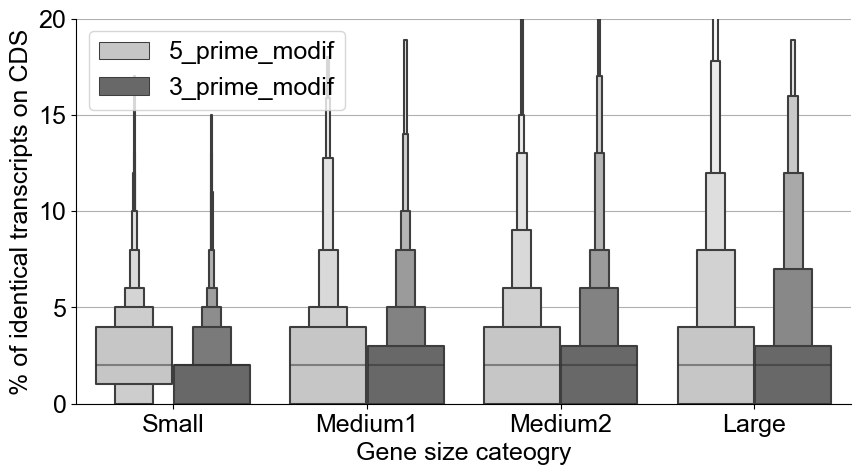

In [1944]:
t_plot = t.loc[(t['5_prime_modif'] >0) | (t['3_prime_modif'] >0)]
t_plot = t_plot[['Gene_size_type', '5_prime_modif', '3_prime_modif']].melt(id_vars=['Gene_size_type'])

f, ax= plt.subplots(figsize=(10,5))

sns.boxenplot(data=t_plot, x='Gene_size_type', y='value', hue='variable', showfliers=False, palette="Greys")

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.set_xlabel('Gene size cateogry')
ax.set_ylabel('% of identical transcripts on CDS')
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.legend(title='', loc='upper left')
ax.set_ylim(0,20)

# print(t_plot.groupby('Gene_size_type')['Ratio_modif'].describe())
# mean_data = t_plot.groupby('Gene_size_type')['Ratio_modif'].describe()['mean']
# median_data = t_plot.groupby('Gene_size_type')['Ratio_modif'].describe()['50%']
# list_x_ticks = mean_data.index.tolist()
# pairs_hline = [(0.02,0.31),(0.36,0.645),(0.69,0.98)]

# for (j, x), pair in zip(enumerate(list_x_ticks), pairs_hline):
#     print(j,x,pair, mean_data[x])
#     plt.axhline( mean_data[x], pair[0], pair[1], color='red', lw=2, alpha=0.5)
#     plt.axhline( median_data[x], pair[0], pair[1], color='black', lw=2, alpha=0.5)

# add_stat_annotation(ax, data=t_plot, x='Gene_size_type', y='Ratio_modif', box_pairs=[("Small", "Medium"), ("Medium", "Large"), ("Small", "Large")],
#                     test='Mann-Whitney', text_format='star',
#                     loc='outside', verbose=2)

In [1891]:
tmp = t_plot[["Gene", 'Gene_size_type', '5_prime_modif', '3_prime_modif']].melt(id_vars=['Gene', 'Gene_size_type'])
tmp['value'] = tmp['value'].astype(int)
tmp.loc[tmp['value'] > 0, 'value_bool'] = True
tmp.loc[tmp['value'] == 0, 'value_bool'] = False
tmp = tmp.sort_values(by=['Gene_size_type', 'Gene', 'variable'],ascending=[True, True, False])
# tmp
tmp = tmp.groupby(['Gene_size_type', 'Gene'])['value_bool'].apply(list).dropna().reset_index()
tmp = tmp.loc[tmp['value_bool'].str.len() <3 ]
tmp['value_bool'] = tmp['value_bool'].apply(lambda r: "-".join([str(e) for e in r]))
tmp_gb = tmp.groupby('Gene_size_type')['value_bool'].value_counts().rename('value_count').reset_index()
# tmp_gb[["5'", "3'"]] = tmp_gb['value_bool'].str.split('-', expand=True)
tmp_gb['value_bool'] = tmp_gb['value_bool'].replace({'True-True' : "5' & 3'", "True-False" : "5' only", "False-True" : "3' only"})
t_plot

KeyError: "['3_prime_modif', 'Gene', '5_prime_modif'] not in index"

In [32]:
tmp_gb.groupby('Gene_size_type').sum()

value_count  % category  % total
Gene_size_type                                  
Small                  5308        99.9     48.7
Medium1                2361       100.0     21.6
Medium2                1782        99.9     16.3
Large                  1474        99.9     13.5

['Small', 'Medium1', 'Medium2', 'Large']
[5308, 2361, 1782, 1474]
['No UTR modif', "5' & 3'", "5' only", "3' only", 'No UTR modif', "5' only", "3' only", "5' & 3'", 'No UTR modif', "5' only", "3' only", "5' & 3'", 'No UTR modif', "5' only", "3' only", "5' & 3'"]
[2962, 1175, 804, 367, 1587, 283, 248, 243, 1207, 230, 193, 152, 1084, 152, 140, 98]


ValueError: too many values to unpack (expected 2)

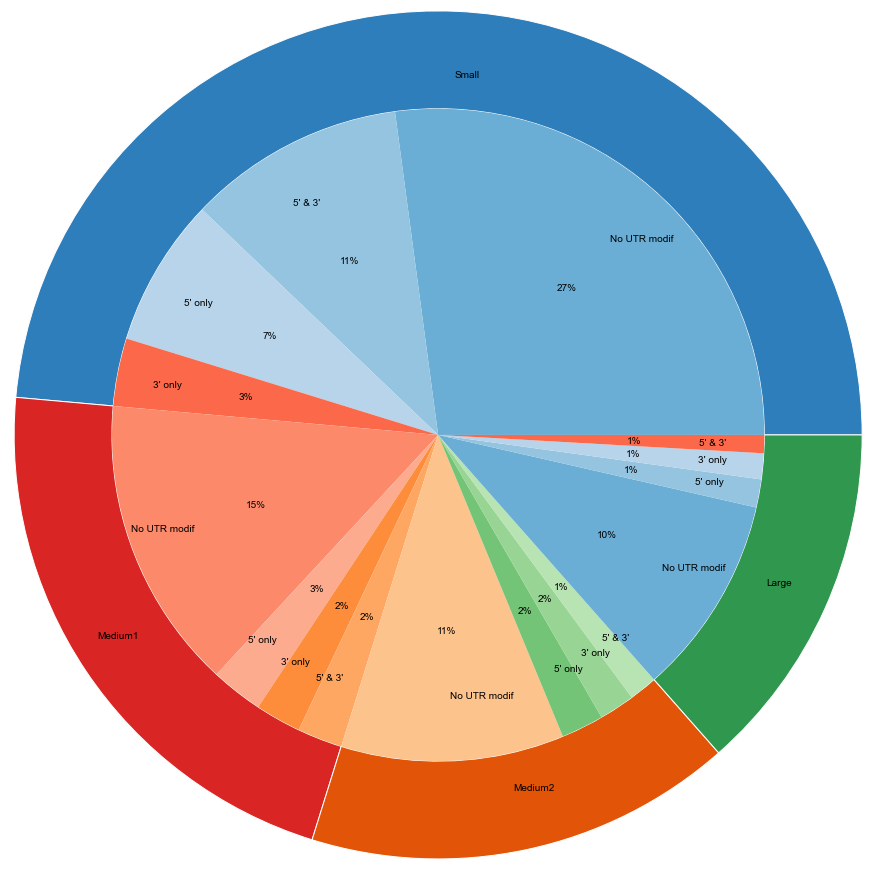

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15,15))
# Libraries
tmp = t[["Gene", 'Gene_size_type', '5_prime_modif', '3_prime_modif']].melt(id_vars=['Gene', 'Gene_size_type'])
tmp['value'] = tmp['value'].astype(int)
tmp.loc[tmp['value'] > 0, 'value_bool'] = True
tmp.loc[tmp['value'] == 0, 'value_bool'] = False
tmp = tmp.sort_values(by=['Gene_size_type', 'Gene', 'variable'],ascending=[True, True, False])
# tmp
tmp = tmp.groupby(['Gene_size_type', 'Gene'])['value_bool'].apply(list).dropna().reset_index()
tmp = tmp.loc[tmp['value_bool'].str.len() <3 ]
tmp['value_bool'] = tmp['value_bool'].apply(lambda r: "-".join([str(e) for e in r]))
tmp_gb = tmp.groupby('Gene_size_type')['value_bool'].value_counts().rename('value_count').reset_index()
# tmp_gb[["5'", "3'"]] = tmp_gb['value_bool'].str.split('-', expand=True)
tmp_gb['value_bool'] = tmp_gb['value_bool'].replace({'True-True' : "5' & 3'", "True-False" : "5' only", "False-True" : "3' only", "False-False" : "No UTR modif"})
tmp_gb['sublabels'] = tmp_gb['value_bool']
def temporary_apply(df):
    df['% category'] = 100 * (df['value_count'] / df['value_count'].sum())
    df['% category'] = df['% category'].round(1)
    return df
tmp_gb  = tmp_gb.groupby('Gene_size_type').apply(temporary_apply)
tmp_gb['% total'] = 100 * (tmp_gb['value_count'] / tmp_gb['value_count'].sum())
tmp_gb['% total'] = tmp_gb['% total'].round(1)
tmp_gb = tmp_gb.drop(['value_bool'], axis=1)
# tmp_gb = tmp_gb.rename({'Gene_size_type' : 'Gene size category' , 'value_count' : 'Count', "sublabels" ; 'Modification class'},axis=1)
# tmp_gb = tmp_gb[['Gene size category', 'Modification class', 'Count' , '% category', '% total']]
# tmp_gb.to_excel('/gstock/EXOTIC/data/GENOMICS/utr_modif_stats.xlsx')


# Make data: I have 3 groups and 7 subgroups
group_names=tmp_gb.Gene_size_type.unique().tolist()
group_size=tmp_gb.groupby('Gene_size_type')['value_count'].sum().values.tolist()
print(group_names)
print(group_size)
subgroup_names=tmp_gb['sublabels'].values.tolist()
subgroup_size=tmp_gb['value_count'].values.tolist()
print(subgroup_names)
print(subgroup_size)
 
# Create colors
a, b, c, d, w =[plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, labeldistance=0.85, colors=[a(0.7), b(0.7), c(0.7), d(0.7)])
plt.setp( mypie, width=0.3, edgecolor='white', )
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names,  autopct='%1.0f%%', pctdistance=0.6, labeldistance=0.8, colors=[a(0.5), a(0.4), a(0.3), w(0.1), b(0.5), b(0.4), b(0.3), w(0.1), c(0.5), c(0.4), c(0.3), w(0.1), d(0.5), d(0.4), d(0.3), w(0.1),])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [907]:
utrs = pd.read_parquet(yaml["1_GENOMICS"]["Final"]["refseq_miso_utrs"])

In [8]:
utrs.loc[(utrs['5_prime_modif'] > 1) | (utrs['3_prime_modif'] > 1)]

Gene                                         CDS_ranges  \
0        A1CF  [52566489-52566640,52569654-52569802,52570800-...   
1         A2M  [9220419-9220435,9220779-9220820,9221336-92214...   
3      A4GALT             [43088896-43089957, 43088896-43089957]   
6       AADAT  [170982079-170982120,170983043-170983144,17098...   
7       AAGAB  [67495159-67495236,67495886-67495935,67496382-...   
...       ...                                                ...   
10928  ZSWIM7  [15881361-15881477,15884354-15884458,15890580-...   
10930    ZUP1  [116956995-116957042,116966877-116967097,11696...   
10931  ZWILCH  [66811239-66811416,66812928-66812998,66813388-...   
10932   ZWINT  [58118179-58118220,58118317-58118448,58118670-...   
10935     ZYX  [143078665-143078872,143079341-143079540,14307...   

       5_prime_modif  3_prime_modif  Nb_combi  
0                  0              8         4  
1                  0              3         3  
3                  2              2         1  
6                  0              4         2  
7                  0              2         2  
...              ...            ...       ...  
10928              3              0         1  
10930              0              2         3  
10931              4              2         2  
10932              3              2         2  
10935              2              0         2  

[3775 rows x 5 columns]

In [9]:
utrs.loc[(utrs['Nb_combi'] == 1)]

Gene                                         CDS_ranges  \
3       A4GALT             [43088896-43089957, 43088896-43089957]   
12        AAR2  [34827791-34828547,34832619-34832848,34843500-...   
15        ABAT  [8829597-8829666,8839858-8839955,8841965-88419...   
18       ABCA5  [67243678-67243785,67244403-67244458,67246046-...   
37       ABCE1  [146025565-146025667,146026757-146026842,14602...   
...        ...                                                ...   
10896   ZNF879  [178452006-178452038,178454474-178454600,17845...   
10901    ZNRD1  [30029302-30029446,30029694-30029794,30030001-...   
10913  ZSCAN12  [28358231-28359519,28360679-28360823,28365781-...   
10921  ZSCAN29  [43653271-43654139,43656113-43656580,43658308-...   
10928   ZSWIM7  [15881361-15881477,15884354-15884458,15890580-...   

       5_prime_modif  3_prime_modif  Nb_combi  
3                  2              2         1  
12                 2              2         1  
15                 3              2         1  
18                 2              3         1  
37                 2              0         1  
...              ...            ...       ...  
10896              5              0         1  
10901              5              0         1  
10913              0              2         1  
10921              2              3         1  
10928              3              0         1  

[1296 rows x 5 columns]

In [1934]:
[list(sns.color_palette('Paired'))[0] + list(sns.color_palette('Paired'))[5]]

[(0.6509803921568628,
  0.807843137254902,
  0.8901960784313725,
  0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745)]

36
5' modif : 36%, 3' modif : 23%, 5' & 3' modif : 41%, 


Text(-1.75, 1.2, 'B')

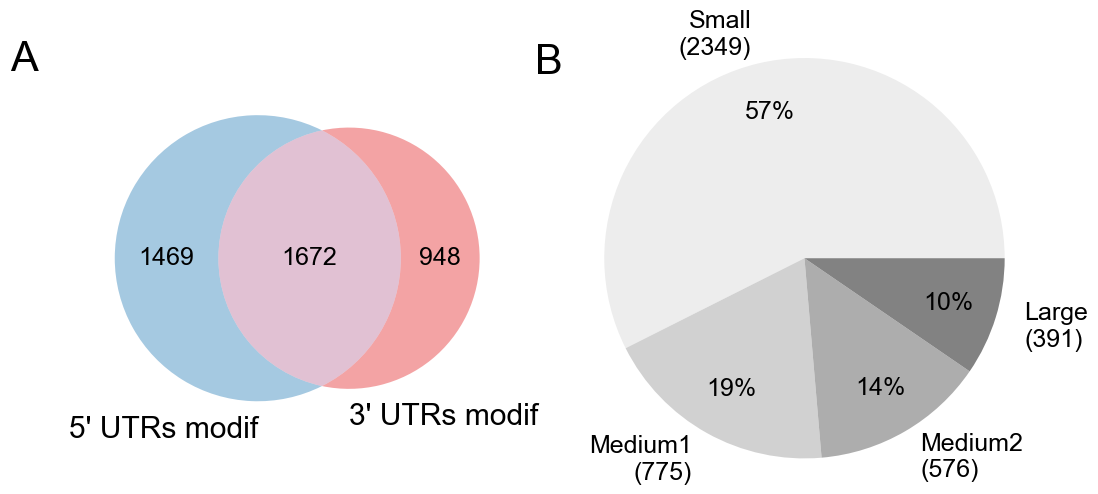

In [1942]:
output_path = yaml['1_GENOMICS']['Figures_data']['venn_utrs']


from matplotlib_venn import venn2
f, ax = plt.subplots(ncols=2, figsize=(12,5))
five_modif = set(utrs.loc[(utrs['5_prime_modif'] >= 1), 'Gene'].unique().tolist())
three_modif = set(utrs.loc[(utrs['3_prime_modif'] >= 1), 'Gene'].unique().tolist())
print(int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)))
print("5' modif : {}%, 3' modif : {}%, 5' & 3' modif : {}%, ".format(
    int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(three_modif.difference(five_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(five_modif.intersection(three_modif))/len(five_modif.union(three_modif))), 0)),
                                                                    
)
     
     )
venn2([five_modif, three_modif], ["5' UTRs modif", "3' UTRs modif"], set_colors=[list(sns.color_palette('Paired'))[1]] + [list(sns.color_palette('Paired'))[5]], ax=ax[0])
ax[0].text(-1, 0.65, 'A', fontsize=30)
# output_figure(f, output_path.replace('.xlsx', ''))

utrs['mRNA_count'] = utrs.CDS_ranges.apply(len)
utrs['Ratio_modif'] = 100 * ((utrs['mRNA_count'] - utrs['Nb_combi']) / utrs['mRNA_count'])
t = pd.merge(genes[['Gene', 'Length']], utrs, on='Gene')
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')
# t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

t_plot = t.loc[(t['Nb_combi'] < t['mRNA_gene_nb'])].drop_duplicates(subset=['Gene'])

t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index()

# Make data: I have 3 groups and 7 subgroups
group_size = [e[0] for e in t_plot.groupby('Gene_size_type').sum().values.tolist()]
group_names=["{}\n({})".format(e,v) for e, v in zip(t_plot.Gene_size_type.unique().tolist(), group_size)]

# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens]
 
# First Ring (outside)
ax[1].axis('equal')
mypie = ax[1].pie(group_size, radius=1.3, labels=group_names,   autopct='%1.0f%%', pctdistance=0.75, labeldistance=1.15, colors=list(sns.color_palette("Greys")))
# plt.setp( mypie, width=1, edgecolor='white', )
# group_size 
# mypie
# f
ax[1].text(-1.75, 1.2, 'B', fontsize=30)


36
5' modif : 36%, 3' modif : 17%, 5' & 3' modif : 47%, 


Text(-1.75, 1.2, 'B')

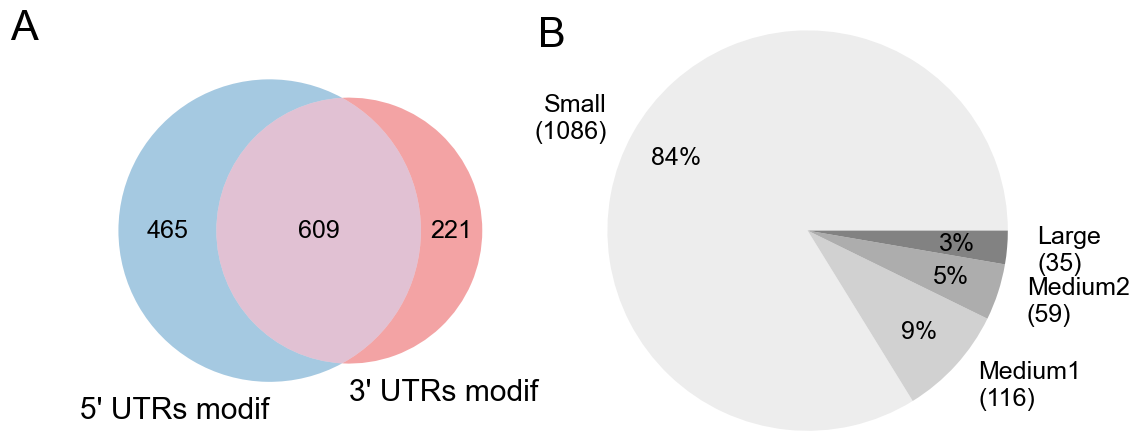

In [1941]:
output_path = yaml['1_GENOMICS']['Figures_data']['venn_utrs']


from matplotlib_venn import venn2
f, ax = plt.subplots(ncols=2, figsize=(12,5))
five_modif = set(utrs.loc[(utrs['5_prime_modif'] >= 1) & (utrs['Nb_combi'] == 1), 'Gene'].unique().tolist())
three_modif = set(utrs.loc[(utrs['3_prime_modif'] >= 1) & (utrs['Nb_combi'] == 1), 'Gene'].unique().tolist())
print(int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)))
print("5' modif : {}%, 3' modif : {}%, 5' & 3' modif : {}%, ".format(
    int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(three_modif.difference(five_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(five_modif.intersection(three_modif))/len(five_modif.union(three_modif))), 0)),
                                                                    
)
     
     )
venn2([five_modif, three_modif], ["5' UTRs modif", "3' UTRs modif"], set_colors=[list(sns.color_palette('Paired'))[1]] + [list(sns.color_palette('Paired'))[5]], ax=ax[0])
ax[0].text(-1, 0.65, 'A', fontsize=30)
# output_figure(f, output_path.replace('.xlsx', ''))

utrs['mRNA_count'] = utrs.CDS_ranges.apply(len)
utrs['Ratio_modif'] = 100 * ((utrs['mRNA_count'] - utrs['Nb_combi']) / utrs['mRNA_count'])
t = pd.merge(genes[['Gene', 'Length']], utrs, on='Gene')
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')
# t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

t_plot = t.loc[(t['Nb_combi'] < t['mRNA_gene_nb']) & (t['Nb_combi'] == 1)].drop_duplicates(subset=['Gene'])

t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index()

# Make data: I have 3 groups and 7 subgroups
group_size = [e[0] for e in t_plot.groupby('Gene_size_type').sum().values.tolist()]
group_names=["{}\n({})".format(e,v) for e, v in zip(t_plot.Gene_size_type.unique().tolist(), group_size)]

# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens]
 
# First Ring (outside)
ax[1].axis('equal')
mypie = ax[1].pie(group_size, radius=1.3, labels=group_names,   autopct='%1.0f%%', pctdistance=0.75, labeldistance=1.15, colors=list(sns.color_palette("Greys")))
# plt.setp( mypie, width=1, edgecolor='white', )
# group_size 
# mypie
# f
ax[1].text(-1.75, 1.2, 'B', fontsize=30)


39
5' modif : 39%, 3' modif : 27%, 5' & 3' modif : 35%, 


Text(-1.75, 1.2, 'B')

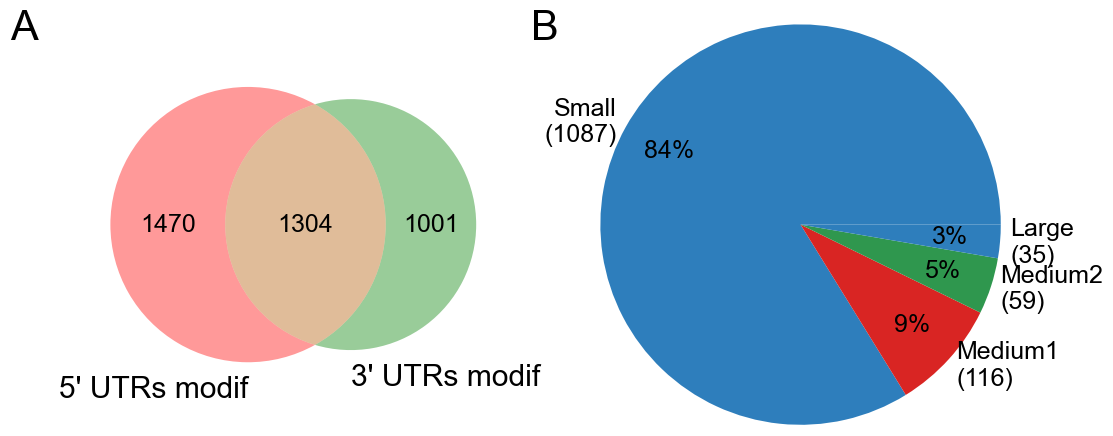

In [1911]:
output_path = yaml['1_GENOMICS']['Figures_data']['venn_utrs']


from matplotlib_venn import venn2
f, ax = plt.subplots(ncols=2, figsize=(12,5))
five_modif = set(utrs.loc[(utrs['5_prime_modif'] > 1), 'Gene'].unique().tolist())
three_modif = set(utrs.loc[(utrs['3_prime_modif'] > 1), 'Gene'].unique().tolist())
print(int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)))
print("5' modif : {}%, 3' modif : {}%, 5' & 3' modif : {}%, ".format(
    int(round(100 * (len(five_modif.difference(three_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(three_modif.difference(five_modif))/len(five_modif.union(three_modif))), 0)),                                                                     
    int(round(100 * (len(five_modif.intersection(three_modif))/len(five_modif.union(three_modif))), 0)),
                                                                    
)
     
     )
venn2([five_modif, three_modif], ["5' UTRs modif", "3' UTRs modif"], ax=ax[0])
ax[0].text(-1, 0.65, 'A', fontsize=30)
# output_figure(f, output_path.replace('.xlsx', ''))

utrs['mRNA_count'] = utrs.CDS_ranges.apply(len)
utrs['Ratio_modif'] = 100 * ((utrs['mRNA_count'] - utrs['Nb_combi']) / utrs['mRNA_count'])
t = pd.merge(genes[['Gene', 'Length']], utrs, on='Gene')
t = pd.merge(t, refseq_wt_variable_drop_duplicates[['Gene', 'mRNA_gene_nb', 'CDS_count']].reset_index(drop=True).drop_duplicates(), on='Gene')
# t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,14,21,max(t['CDS_count'])], labels=['Small', 'Medium', 'Large'])
t['Gene_size_type'] = pd.cut(t['CDS_count'], [0,10,15,22,max(t['CDS_count'])], labels=['Small', 'Medium1', 'Medium2', 'Large'])

t_plot = t.loc[(t['Nb_combi'] ==1)]

t_plot = t_plot.groupby('Gene_size_type')['Nb_combi'].count().reset_index()

# Make data: I have 3 groups and 7 subgroups
group_size = [e[0] for e in t_plot.groupby('Gene_size_type').sum().values.tolist()]
group_names=["{}\n({})".format(e,v) for e, v in zip(t_plot.Gene_size_type.unique().tolist(), group_size)]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
ax[1].axis('equal')
mypie = ax[1].pie(group_size, radius=1.3, labels=group_names,   autopct='%1.0f%%', pctdistance=0.75, labeldistance=1.05, colors=[a(0.7), b(0.7), c(0.7)])
# plt.setp( mypie, width=1, edgecolor='white', )
# group_size 
# mypie
# f
ax[1].text(-1.75, 1.2, 'B', fontsize=30)
